<b> Capstone Project - Credit Card Fraud Detection </b>

<b>Author:</b> Anushree chourasia

[def]: C:\Users\Ashutosh\OneDrive\Desktop\3-Credit-Card-Fraud-Detection.png
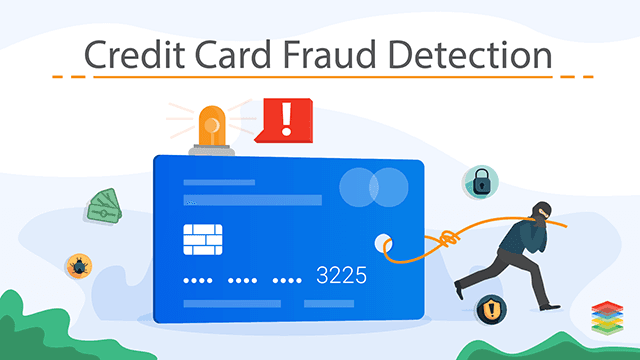

<div class="alert alert-block alert-success">

### The steps are broadly:
1. Reading and understanding the data
    - shape(99999 rows and 226 columns), info, describe, duplicate values check, concat both the data files into 1 `fraud_data`
2. Cleaning the data
    - check the null values 
    - Dropping Unnecessary Columns which are not needed for Analysis
    - Converting columns to appropriate formats
    - bifurcation of columns for better understanding
    - binning on `job` and `state` column as having analogous entries

3. Visualization of data
    - correlation
    - 3.1) Univariate Analysis
            - Numerical
            - Categorical
    - 3.2) Multivariate Analysis
            - Visualising Numerical - Numerical Variables
            - Visualising Categorical- Categorical Variables
            - Visualising Numerical - Categorical Variables
           
4. Data preparation
    - 4.1) Derive new features
            -`age`, `trans_Year`, `trans_Month`, `month_of_year`,`trans_Hour`, `trans_Day`,`trans_weekday`,`dist`
            - `amt_by_moving_average`,`distance_over_time`,`distance_between_merchants`
    - 4.2) Conducting appropriate exploratory analysis to extract useful INSIGHTS (whether directly useful for business or for eventual modelling/feature engineering).
            1.Fraud transactions in 2019 ans 2020
            2. Fraud transaction based on gender
            3. Fraud transcations in months
            4. Fraud transactions in weekdays
            5. Fraud transaction on daywise
            6. Hourly based Fraud Transactions
            7.Fraud Transaction in age_bins
            8. Fraud Transactions in categories
            9. Fraud Transactions in job
            10. Fraud Transactions in State
            11. Fraud Transactions in State_bin
            12. Fraud Transactions in city (top 20)
            13. Fraud Transactions in street(top 20)
            14. Fraud Transactions in merchant(top 20)
            15. Mean of Fraud and non Fraud Transactions
            16. Overall Amount Distribution
            17. Fraud Transactions in AMT
            18. Fraud Transactions in city population
            19. Fraud Transactions in dist
            20. Fraud Transactions in time_since_prev_transaction
            21. Fraud Transactions in distance_between_merchants
            22. Fraud Transactions in 30 Day Transactions by Customers
            23. Fraud Transactions in 30 Day Orders Amt Avg by Customers
            24. Fraud Transactions in 24 hours Orders Amt Avg by Customers
            25. Fraud Transactions based on category and amt
            26. Fraud Transactions based on state vs amt and trans_day vs amt
            27. Fraud Transactions based on age_bin vs amt , trans_year vs amt
            28. Fraud Transactions based on job , merchant with amt
            29. Fraud Transactions based on trans_hour , gender with amt
            30. Fraud Transactions based on trans_month, trans_weekday with amt
            31. Amount by percentage of transactions
            32. Year Month vs Number of Transactions
            33. Year Month vs Number of Customers Done the Transactions
            34. num_of_fraud_transactions
            35. fraud_customers based on Transaction on month wise
            36. Fraudulent transactions on amount
            37. KDE plot to visualize the distribution of Amount for both the classes
            38. Time Distribution plot for transactions
    - 4.3) Cost Benefit Analysis(part 1)
            - Average number of transactions per month
            - Average number of fraudulent transaction per month
            - Average amount per fraud transaction

5. preparation of data for modelling
    - Check Correlation
    - Drop features which are not seems to be useful for model as correlation is high 
        - 5.1) Creating Dummy for few variables and using Label encoding for few variables 
        - 5.2) Splitting the Data into X & y
        - 5.3) Test-Train Split
        - 5.4) Checking for Class imbalance in Train & Test and treating it
              - SMOTE
              - ADASYN
6. Modelling
    - Model 1: Decision Tree
        - Decision Tree  (Default Hyperparameters for both SMOTE and ADASYN)
        - Decision Tree  (Hyperparameter Tuning for SMOTE)
    - Model 2: Random Forest
        - Random Forest (Default Hyperparameters for both SMOTE and ADASYN)
        - Random Forest (Hyperparameters Tuning for SMOTE)
    - Model 3: XGBoost 
        - XGBoost (Default Hyperparameters for both SMOTE and ADASYN)
        - XGBoost (Hyperparameters Tuning for SMOTE)
7. Final analysis
    - Cost Benefit Analsys (part 2)
8. Recommendation of strategies to manage customer churn based on our observations.
 
</div>

<div class="alert alert-block alert-info">

# Assignment Summary:
    
## Problem Statement:-
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

 
**Buisness Objective:-** Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.
 

**Our Objective:-** In this project, we will analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.
    
  
    
</div>

#### Data Dictionary for Credit Card Transactions
    index - Unique Identifier for each row
    transdatetrans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class

### Step 1: Reading and understanding the Data

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

: 

In [1]:
# Lets import the required libraries and packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Lets import and read the dataset
fraud_train = pd.read_csv('/Users/prakharvijaywat/Downloads/credit card fruad detection capstone prakhar Vijaywat/Data set/fraudTrain.csv')

In [5]:
# Lets see the head of our dataset
fraud_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [6]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<div class="alert alert-block alert-info">   

#### Inference:- There are 1296675 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [7]:
# Lets check the summary of the dataset
fraud_train.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   1.296675e+06               1296675  1.296675e+06            1296675   
unique           NaN               1274791           NaN                693   
top              NaN   2020-06-02 12:47:07           NaN  fraud_Kilback LLC   
freq             NaN                     4           NaN               4403   
mean    6.483370e+05                   NaN  4.171920e+17                NaN   
std     3.743180e+05                   NaN  1.308806e+18                NaN   
min     0.000000e+00                   NaN  6.041621e+10                NaN   
25%     3.241685e+05                   NaN  1.800429e+14                NaN   
50%     6.483370e+05                   NaN  3.521417e+15                NaN   
75%     9.725055e+05                   NaN  4.642255e+15                NaN   
max     1.296674e+06                   NaN  4.992346e+18                NaN   

             category           amt        first     last   gender  \
count         1296675  1.296675e+06      1296675  1296675  1296675   
unique             14           NaN          352      481        2   
top     gas_transport           NaN  Christopher    Smith        F   
freq           131659           NaN        26669    28794   709863   
mean              NaN  7.035104e+01          NaN      NaN      NaN   
std               NaN  1.603160e+02          NaN      NaN      NaN   
min               NaN  1.000000e+00          NaN      NaN      NaN   
25%               NaN  9.650000e+00          NaN      NaN      NaN   
50%               NaN  4.752000e+01          NaN      NaN      NaN   
75%               NaN  8.314000e+01          NaN      NaN      NaN   
max               NaN  2.894890e+04          NaN      NaN      NaN   

                            street        city    state           zip  \
count                      1296675     1296675  1296675  1.296675e+06   
unique                         983         894       51           NaN   
top     0069 Robin Brooks Apt. 695  Birmingham       TX           NaN   
freq                          3123        5617    94876           NaN   
mean                           NaN         NaN      NaN  4.880067e+04   
std                            NaN         NaN      NaN  2.689322e+04   
min                            NaN         NaN      NaN  1.257000e+03   
25%                            NaN         NaN      NaN  2.623700e+04   
50%                            NaN         NaN      NaN  4.817400e+04   
75%                            NaN         NaN      NaN  7.204200e+04   
max                            NaN         NaN      NaN  9.978300e+04   

                 lat          long      city_pop                job  \
count   1.296675e+06  1.296675e+06  1.296675e+06            1296675   
unique           NaN           NaN           NaN                494   
top              NaN           NaN           NaN  Film/video editor   
freq             NaN           NaN           NaN               9779   
mean    3.853762e+01 -9.022634e+01  8.882444e+04                NaN   
std     5.075808e+00  1.375908e+01  3.019564e+05                NaN   
min     2.002710e+01 -1.656723e+02  2.300000e+01                NaN   
25%     3.462050e+01 -9.679800e+01  7.430000e+02                NaN   
50%     3.935430e+01 -8.747690e+01  2.456000e+03                NaN   
75%     4.194040e+01 -8.015800e+01  2.032800e+04                NaN   
max     6.669330e+01 -6.795030e+01  2.906700e+06                NaN   

               dob                         trans_num     unix_time  \
count      1296675                           1296675  1.296675e+06   
unique         968                           1296675           NaN   
top     1977-03-23  2c94f45ebd2e79e7f187af1804600795           NaN   
freq          5636                                 1           NaN   
mean           NaN                               NaN  1.349244e+09   
std            NaN                               NaN  1.284128e+07   


#### Now lets check if the dataset has any duplicates.

In [8]:
# checking duplicates
sum(fraud_train.duplicated(subset = 'cc_num')) == 0

False

In [9]:
# Lets check the dimensions of the dataset
fraud_train.shape

(1296675, 23)

In [10]:
fraud_train.drop_duplicates()
fraud_train.shape

(1296675, 23)

<div class="alert alert-block alert-info">   

#### Inference:- No duplicate values
</div>

In [13]:
# Lets import and read the dataset
fraud_test = pd.read_csv('/Users/prakharvijaywat/Downloads/credit card fruad detection capstone prakhar Vijaywat/Data set/fraudTest.csv')
fraud_test

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street          city state  \
0        Elliott      M            351 Darlene Green      Columbia    SC   
1       Williams      F             3638 Marsh Union       Altonah    UT   
2          Lopez      F         9333 Valentine Point      Bellmore    NY   
3       Williams      M  32941 Krystal Mill Apt. 552    Titusville    FL   
4         Massey      M     5783 Evan Roads Apt. 465      Falmouth    MI   
...          ...    ...                          ...           ...   ...   
555714     Olson      M          558 Michael Estates         Luray    MO   
555715   Vasquez      M          572 Davis Mountains  Lake Jackson    TX   
555716    Lawson      F   144 Evans Islands Apt. 683       Burbank    WA   
555717   Preston      M   7020 Doyle Stream Apt. 951          Mesa    ID   
555718      Frey      M     830 Myers Plaza Apt. 384        Edmond    OK   

          zip      lat      long  city_pop                     job  \
0       29209  33.9659  -80.9355    333497     Mechanical engineer   
1       84002  40.3207 -110.4360       302  Sales professional, IT   
2       11710  40.6729  -73.5365     34496       Librarian, public   
3       32780  28.5697  -80.8191     54767            Set designer   
4       49632  44.2529  -85.0170      1126      Furniture designer   
...       ...      ...       ...       ...                     ...   
555714  63453  40.4931  -91.8912       519            Town planner   
555715  77566  29.0393  -95.4401     28739          Futures trader   
555716  99323  46.1966 -118.9017      3684                Musician   
555717  83643  44.6255 -116.4493       129            Cartographer   
555718  73034  35.6665  -97.4798    116001             Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391   
1       1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498   
2       1970-10-21  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810   
3       1987-07-25  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398   
4       1955-07-06  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148   
...            ...                               ...         .

In [14]:
# Lets see the head of our dataset
fraud_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [15]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

<div class="alert alert-block alert-info">   

#### Inference:- There are 555719 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [16]:
# Lets check the summary of the dataset
fraud_test.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                544760           NaN                693   
top               NaN   2020-12-17 20:36:39           NaN  fraud_Kilback LLC   
freq              NaN                     4           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800429e+14                NaN   
50%     277859.000000                   NaN  3.521417e+15                NaN   
75%     416788.500000                   NaN  4.635331e+15                NaN   
max     555718.000000                   NaN  4.992346e+18                NaN   

             category            amt        first    last  gender  \
count          555719  555719.000000       555719  555719  555719   
unique             14            NaN          341     471       2   
top     gas_transport            NaN  Christopher   Smith       F   
freq            56370            NaN        11443   12146  304886   
mean              NaN      69.392810          NaN     NaN     NaN   
std               NaN     156.745941          NaN     NaN     NaN   
min               NaN       1.000000          NaN     NaN     NaN   
25%               NaN       9.630000          NaN     NaN     NaN   
50%               NaN      47.290000          NaN     NaN     NaN   
75%               NaN      83.010000          NaN     NaN     NaN   
max               NaN   22768.110000          NaN     NaN     NaN   

                 street        city   state            zip            lat  \
count            555719      555719  555719  555719.000000  555719.000000   
unique              924         849      50            NaN            NaN   
top     444 Robert Mews  Birmingham      TX            NaN            NaN   
freq               1474        2423   40393            NaN            NaN   
mean                NaN         NaN     NaN   48842.628015      38.543253   
std                 NaN         NaN     NaN   26855.283328       5.061336   
min                 NaN         NaN     NaN    1257.000000      20.027100   
25%                 NaN         NaN     NaN   26292.000000      34.668900   
50%                 NaN         NaN     NaN   48174.000000      39.371600   
75%                 NaN         NaN     NaN   72011.000000      41.894800   
max                 NaN         NaN     NaN   99921.000000      65.689900   

                 long      city_pop                job         dob  \
count   555719.000000  5.557190e+05             555719      555719   
unique            NaN           NaN                478         910   
top               NaN           NaN  Film/video editor  1977-03-23   
freq              NaN           NaN               4119        2408   
mean       -90.231325  8.822189e+04                NaN         NaN   
std         13.721780  3.003909e+05                NaN         NaN   
min       -165.672300  2.300000e+01                NaN         NaN   
25%        -96.798000  7.410000e+02                NaN         NaN   
50%        -87.476900  2.408000e+03                NaN         NaN   
75%        -80.175200  1.968500e+04                NaN         NaN   
max        -67.950300  2.906700e+06                NaN         NaN   

                               trans_num     unix_time      merch_lat  \
count                             555719  5.557190e+05  555719.000000   
unique                            555719           NaN            NaN   
top     1cc9674314a9ff09064d1aa82aad3bd1           NaN            NaN   
freq                                   1           NaN            NaN   
mean                                 NaN  1.380679e+09      38.542798   
std              

#### Now lets check if the dataset has any duplicates.

In [17]:
# checking duplicates
sum(fraud_test.duplicated(subset = 'cc_num')) == 0

False

In [18]:
# Lets check the dimensions of the dataset
fraud_test.shape

(555719, 23)

In [19]:
# Deleting duplicates if they are present
fraud_test.drop_duplicates()
fraud_test.shape

(555719, 23)

<div class="alert alert-block alert-info">   

#### Inference:- No duplicate values
</div>

#### Concatenating both the train and test data for further analysis

In [20]:
# Lets concatenate both train and test data
fraud_data = pd.concat([fraud_train, fraud_test])
fraud_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street            city state  \
0         Banks      F                561 Perry Cove  Moravian Falls    NC   
1          Gill      F  43039 Riley Greens Suite 393          Orient    WA   
2       Sanchez      M      594 White Dale Suite 530      Malad City    ID   
3         White      M   9443 Cynthia Court Apt. 038         Boulder    MT   
4        Garcia      M              408 Bradley Rest        Doe Hill    VA   
...         ...    ...                           ...             ...   ...   
555714    Olson      M           558 Michael Estates           Luray    MO   
555715  Vasquez      M           572 Davis Mountains    Lake Jackson    TX   
555716   Lawson      F    144 Evans Islands Apt. 683         Burbank    WA   
555717  Preston      M    7020 Doyle Stream Apt. 951            Mesa    ID   
555718     Frey      M      830 Myers Plaza Apt. 384          Edmond    OK   

          zip      lat      long  city_pop                                job  \
0       28654  36.0788  -81.1781      3495          Psychologist, counselling   
1       99160  48.8878 -118.2105       149  Special educational needs teacher   
2       83252  42.1808 -112.2620      4154        Nature conservation officer   
3       59632  46.2306 -112.1138      1939                    Patent attorney   
4       24433  38.4207  -79.4629        99     Dance movement psychotherapist   
...       ...      ...       ...       ...                                ...   
555714  63453  40.4931  -91.8912       519                       Town planner   
555715  77566  29.0393  -95.4401     28739                     Futures trader   
555716  99323  46.1966 -118.9017      3684                           Musician   
555717  83643  44.6255 -116.4493       129                       Cartographer   
555718  73034  35.6665  -97.4798    116001                        Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076

In [21]:
# Lets check the dimensions of the dataset
fraud_data.shape

(1852394, 23)

In [22]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

<div class="alert alert-block alert-info">   

#### Inference:- There are 1852394 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [23]:
# Lets check the summary of the dataset
fraud_data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

### Step 2: Cleaning the data

In [24]:
# Lets check the null values present in the dataset
print(round(100*(fraud_data.isnull().sum()/len(fraud_data.index)), 2).sort_values(ascending = False))

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64


<div class="alert alert-block alert-info">   

#### Inference:- There are no null values in the dataset
</div>

In [25]:
# Identifying if any column exists with only null values
fraud_data.isnull().all(axis=0).any()

False

In [26]:
# Lets again check the dimensions of the dataset
fraud_data.shape

(1852394, 23)

#### Dropping Unnecessary Columns which are not needed for Analysis

In [25]:
# Lets delete unwanted column
fraud_data= fraud_data.drop(['Unnamed: 0'],axis=1)
fraud_data= fraud_data.drop(['first'],axis=1)
fraud_data= fraud_data.drop(['last'],axis=1)
# Lets again check the dimensions of the dataset
fraud_data.shape

(1852394, 20)

In [26]:
# Identifying columns which has only one unique value
print(fraud_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


In [27]:
# 1852394 rows

#### Converting columns to appropriate formats

In [28]:
# Lets convert the columns to appropriate formats
fraud_data['trans_date_trans_time']= pd.to_datetime(fraud_data['trans_date_trans_time'], format='%Y-%m-%d')
fraud_data['dob']= pd.to_datetime(fraud_data['dob'], format='%Y-%m-%d')

<div class="alert alert-block alert-info">  
    
#### Inference: All the above columns can be converted to date type

#### Creating two new columns ['trans_Date', 'trans_Time'] from trans_date_trans_time for better understanding

In [29]:
fraud_data['trans_Date']=fraud_data.trans_date_trans_time.dt.date
fraud_data['trans_Time']=fraud_data.trans_date_trans_time.dt.time
fraud_data.trans_Date = pd.to_datetime(fraud_data['trans_Date'],format='%Y-%m-%d')

In [30]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop                                job        dob  \
0       -81.1781      3495          Psychologist, counselling 1988-03-09   
1      -118.2105       149  Special educational needs teacher 1978-06-21   
2      -112.2620      4154        Nature conservation officer 1962-01-19   
3      -112.1138      1939                    Patent attorney 1967-01-12   
4       -79.4629        99     Dance movement psychotherapist 1986-03-28   
...          ...       ...                                ...        ...   
555714  -91.8912       519                       Town planner 1966-02-13   
555715  -95.4401     28739                     Futures trader 1999-12-27   
555716 -118.9017      3684                           Musician 1981-11-29   
555717 -116.4493       129                       Cartographer 1965-12-15   
555718  -97.4798    116001                        Media buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   

In [31]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

In [32]:
grp_by_cc=fraud_data.groupby(['cc_num'])
fraudDf=pd.DataFrame(grp_by_cc['is_fraud'].nunique())
fraudDf.shape

(999, 1)

<div class="alert alert-block alert-info">  
    
#### Inference: There are 999 unique credit card holders in the dataset

In [33]:
fraudDf['is_fraud'].value_counts(normalize=True)

2    0.885886
1    0.114114
Name: is_fraud, dtype: float64

<div class="alert alert-block alert-info">  
    
#### Inference: 88.58% of card holders have been defrauded atleast once.

In [34]:
# lets find out churn/non churn percentage
fraud_data['is_fraud'].value_counts()/len(fraud_data)*100

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

<div class="alert alert-block alert-info">   

#### Inference: 99.5% of the transactions are not fraud and only 0.5% of the transactions are fraud, this is a case of class imbalance, we will treat it later.

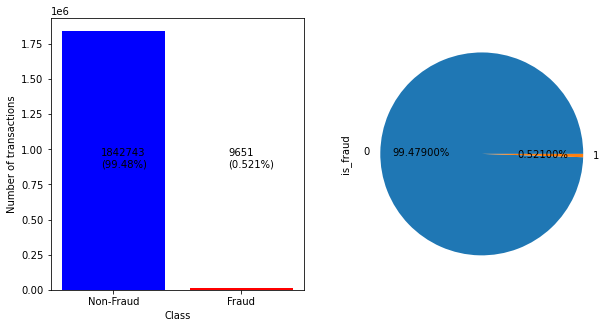

In [35]:
fig= plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(['Non-Fraud','Fraud'], fraud_data['is_fraud'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[0], 
                                fraud_data['is_fraud'].value_counts()[0]/fraud_data['is_fraud'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[1], 
                                fraud_data['is_fraud'].value_counts()[1]/fraud_data['is_fraud'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')

plt.subplot(1,2,2)
fraud_data["is_fraud"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

<div class="alert alert-block alert-info"> 
    
#### It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions.<br>
    
####  The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. <br>
- Now, since the data set is highly imbalanced, it needs to be handled before model building.

- The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

In [36]:
# Again checking the format of the data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

In [37]:
df=fraud_data[['job', 'category', 'state', 'city']]

for c in df.columns:
    print ("-----------------------------------------------------" )
    print ("---- %s ---" % c)
    print( df[c].value_counts(normalize=True))

-----------------------------------------------------
---- job ---
Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Materials engineer                                             0.006322
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                            0.0055

### Binning on `job` column as having 497 entries 

In [38]:
fraud_data['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

In [39]:
fraud_data['job'][fraud_data['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
Teacher, adult education                   737
English as a foreign language teacher      737
Professor Emeritus                         734
Associate Professor                        734
Name: job, dtype: int64

In [40]:
fraud_data['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

In [41]:
fraud_data['job'][fraud_data['job'].str.contains('(Engineering|engineering|Engineer|engineer)',
                                                        regex=True)].value_counts()

Materials engineer                       11711
Mining engineer                           8762
Water engineer                            8740
Mechanical engineer                       8062
Engineer, automotive                      8050
Petroleum engineer                        8046
Energy engineer                           8038
Chemical engineer                         7334
Engineer, biomedical                      7330
Drilling engineer                         7321
Electrical engineer                       7301
Engineer, production                      6584
Engineer, control and instrumentation     6579
Engineering geologist                     5857
Structural engineer                       5116
Engineer, mining                          5112
Engineer, electronics                     5107
Geologist, engineering                    4392
Site engineer                             4391
Engineer, land                            4381
Electronics engineer                      4380
Manufacturing

In [42]:
fraud_data['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [43]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                                       0.107049
Teacher                                                        0.038724
Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                            0

In [44]:
fraud_data['job'][fraud_data['job'].str.contains('(Scientist|scientist)',
                                                                        regex=True)].value_counts()

Scientist, audiological                                        10234
Audiological scientist                                          8801
Scientist, research (maths)                                     8768
Geoscientist                                                    8041
Research scientist (physical sciences)                          7319
Scientist, marine                                               7306
Scientist, biomedical                                           5862
Biomedical scientist                                            4384
Product/process development scientist                           4374
Soil scientist                                                  3669
Scientist, physiological                                        2926
Research scientist (life sciences)                              2923
Scientist, research (physical sciences)                         2914
Physiological scientist                                         2194
Research scientist (maths)        

In [45]:
fraud_data['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [46]:
fraud_data['job'][fraud_data['job'].str.contains('(Officer|officer)',regex=True)].value_counts()

Chief Executive Officer                                  10199
Historic buildings inspector/conservation officer         8787
Prison officer                                            8054
Trading standards officer                                 6611
Race relations officer                                    6583
Chief Strategy Officer                                    6577
Probation officer                                         5856
Exhibitions officer, museum/gallery                       5841
Research officer, trade union                             5134
Research officer, political party                         5123
Fisheries officer                                         5121
Education officer, museum                                 4404
Chief Operating Officer                                   4388
Careers information officer                               4387
Regulatory affairs officer                                4386
Human resources officer                                

In [47]:
fraud_data['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer", 
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',     
            'Research officer, trade union ','Research officer, political party',   
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [48]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                            0.107049
Officer                                             0.082633
Scientist                                           0.047388
Teacher                                             0.038724
Film/video editor                                   0.007503
Exhibition designer                                 0.007108
Surveyor, land/geomatics                            0.006713
Naval architect                                     0.006712
Designer, ceramics/pottery                          0.006310
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller             

In [49]:
fraud_data['job'][fraud_data['job'].str.contains('(Surveyor|surveyor)',regex=True)].value_counts()

Surveyor, land/geomatics             12436
Building surveyor                     8786
Quantity surveyor                     8080
Land/geomatics surveyor               8052
Surveyor, minerals                    6589
Insurance risk surveyor               5133
Commercial/residential surveyor       4382
Building control surveyor             3670
Surveyor, rural practice              3643
Planning and development surveyor     2192
Surveyor, mining                      2191
Rural practice surveyor               2190
Hydrographic surveyor                 1469
Minerals surveyor                      740
Surveyor, hydrographic                 735
Name: job, dtype: int64

In [50]:
fraud_data['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [51]:
fraud_data['job'][fraud_data['job'].str.contains('(Designer|designer)',regex=True)].value_counts()

Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Designer, television/film set      740
Interior and spatial designer      740
Textile designer                   735
Name: job, dtype: int64

In [52]:
fraud_data['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [53]:
fraud_data['job'][fraud_data['job'].str.contains('(manager|Manager)',regex=True)].value_counts()

Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Public house manager                    2916
Pension scheme manager                  2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail man

In [54]:
fraud_data['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [55]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                            0.107049
Officer                                             0.082633
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Film/video editor                                   0.007503
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller             

In [56]:
fraud_data['job'][fraud_data['job'].str.contains('(psychologist|Psychologist)',regex=True)].value_counts()

Psychologist, forensic              8044
Counselling psychologist            6590
Educational psychologist            6588
Occupational psychologist           5848
Forensic psychologist               5127
Psychologist, counselling           5121
Sport and exercise psychologist     2941
Psychologist, sport and exercise    2936
Psychologist, clinical              2200
Clinical psychologist               1461
Name: job, dtype: int64

In [57]:
fraud_data['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [58]:
fraud_data['job'][fraud_data['job'].str.contains('(editor|Editor)',regex=True)].value_counts()

Film/video editor            13898
Magazine features editor      9506
Editor, commissioning         5117
Video editor                  4386
Editor, film/video            2928
Editor, magazine features     2921
Commissioning editor          2202
Name: job, dtype: int64

In [59]:
fraud_data['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [60]:
fraud_data['job'][fraud_data['job'].str.contains('(Producer|producer)',regex=True)].value_counts()

Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: job, dtype: int64

In [61]:
fraud_data['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [62]:
fraud_data['job'][fraud_data['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()

Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: job, dtype: int64

In [63]:
fraud_data['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [64]:
fraud_data['job'][fraud_data['job'].str.contains('(nurse|Nurse)',regex=True)].value_counts()

Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: job, dtype: int64

In [65]:
fraud_data['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [66]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                            0.107049
Officer                                             0.082633
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Therapist                                           0.035920
Psychologist                                        0.025295
Editor                                              0.022111
Nurse                                               0.010685
Producer                                            0.009490
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer              

In [67]:
fraud_data['job'][fraud_data['job'].str.contains('(assistant|Assistant)',regex=True)].value_counts()

Television production assistant     7297
Radio broadcast assistant           6582
Politician's assistant              2944
Production assistant, radio         1466
Production assistant, television     738
Name: job, dtype: int64

In [68]:
fraud_data['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [69]:
fraud_data['job'][fraud_data['job'].str.contains('(executive|Executive)',regex=True)].value_counts()

Public relations account executive               5841
Advertising account executive                    2213
Sales executive                                  2206
Chartered legal executive (England and Wales)    1464
Marketing executive                               736
Sales promotion account executive                  14
Name: job, dtype: int64

In [70]:
fraud_data['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [71]:
fraud_data['job'][fraud_data['job'].str.contains('(librarian|Librarian)',regex=True)].value_counts()

Librarian, public      8773
Librarian, academic    7307
Public librarian       2196
Academic librarian     1467
Name: job, dtype: int64

In [72]:
fraud_data['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [73]:
fraud_data['job'][fraud_data['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()

Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: job, dtype: int64

In [74]:
fraud_data['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [75]:
fraud_data['job'][fraud_data['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()

Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: job, dtype: int64

In [76]:
fraud_data['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [77]:
fraud_data['job'][fraud_data['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()

Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: job, dtype: int64

In [78]:
fraud_data['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [79]:
fraud_data['job'][fraud_data['job'].str.contains('(banker|Banker)',regex=True)].value_counts()

Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: job, dtype: int64

In [80]:
fraud_data['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"], 
                'Banker', inplace=True)

In [81]:
fraud_data['job'][fraud_data['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()

Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: job, dtype: int64

In [82]:
fraud_data['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [83]:
fraud_data['job'][fraud_data['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()

Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: job, dtype: int64

In [84]:
fraud_data['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [85]:
fraud_data['job'][fraud_data['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()

Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Sports administrator                                1467
Education administrator                             1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: job, dtype: int64

In [86]:
fraud_data['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"], 
                          'Administrator', inplace=True)

In [87]:
fraud_data['job'][fraud_data['job'].str.contains('(Writer|writer)',regex=True)].value_counts()

Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: job, dtype: int64

In [88]:
fraud_data['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [89]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490
Chartered Accountant                     0.009088
Executive                                0.006734


In [90]:
fraud_data['job'][fraud_data['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()

Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
Neurosurgeon                2934
General practice doctor     2934
Veterinary surgeon             8
Name: job, dtype: int64

In [91]:
fraud_data['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"], 
                          'Doctor', inplace=True)

In [92]:
fraud_data['job'][fraud_data['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()

Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: job, dtype: int64

In [93]:
fraud_data['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"], 
                                                                                  'Buyer', inplace=True)

In [94]:
fraud_data['job'][fraud_data['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()

Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: job, dtype: int64

In [95]:
fraud_data['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [96]:
fraud_data['job'][fraud_data['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()

Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: job, dtype: int64

In [97]:
fraud_data['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [98]:
fraud_data['job'][fraud_data['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()

Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: job, dtype: int64

In [99]:
fraud_data['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [100]:
fraud_data['job'][fraud_data['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()

Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: job, dtype: int64

In [101]:
fraud_data['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"], 
                                                                          'Analyst', inplace=True)

In [102]:
fraud_data['job'][fraud_data['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()

Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: job, dtype: int64

In [103]:
fraud_data['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [104]:
fraud_data['job'][fraud_data['job'].str.contains('(technician|Technician)',regex=True)].value_counts()

Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: job, dtype: int64

In [105]:
fraud_data['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [106]:
fraud_data['job'][fraud_data['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()

Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: job, dtype: int64

In [107]:
fraud_data['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'], 
                                                                      'Horticulturist', inplace=True)

fraud_data['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'], 
                                                                      'Merchandiser', inplace=True)

fraud_data['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [108]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490


<div class="alert alert-block alert-info">   

#### Inference:- As there is analogous data in the job column , so i have replacing the repetative data into unique category data.
</div>

In [109]:
job_freqs = fraud_data.job.value_counts(normalize=True)

In [110]:
job_freqs.cumsum()

Engineer                                 0.107049
Officer                                  0.189682
Manager                                  0.237495
Scientist                                0.284883
Designer                                 0.326764
Teacher                                  0.365488
Surveyor                                 0.403432
Therapist                                0.439352
Psychologist                             0.464647
Editor                                   0.486758
Consultant                               0.506110
Doctor                                   0.521525
Administrator                            0.536167
Writer                                   0.550787
Researcher                               0.563014
Technologist                             0.574074
Nurse                                    0.584760
Librarian                                0.595418
Assistant                                0.605689
Producer                                 0.615180


In [111]:
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Producer', 'Chartered Accountant',
       'Analyst', 'Physicist', 'Buyer', 'Executive', 'Horticulturist',
       'Naval architect', 'Technician', 'Financial adviser',
       'Systems developer', 'IT trainer', 'Chemist', 'Geneticist',
       'Podiatrist', 'Comptroller', 'Banker', 'Paramedic', 'Sub', 'Musician',
       'Barrister', 'Immunologist', 'Pharmacist', 'Financial trader',
       'Sales professional, IT', 'Counsellor', 'Claims inspector/assessor',
       'Make', 'Firefighter', 'Merchandiser', 'Medical sales representative',
       'Trade mark attorney', 'Chartered loss adjuster', 'Dealer',
       'Multimedia programmer', 'Technical brewer', 'Fine artist',
       'Toxicologist', 'Conservator', 'Senior tax professional/t

In [112]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490


In [113]:
fraud_data['job'].describe()

count      1852394
unique         176
top       Engineer
freq        198297
Name: job, dtype: object

In [114]:
fraud_data.shape

(1852394, 22)

In [115]:
fraud_data['job'] = np.where(fraud_data.job.isin(top_jobs), fraud_data.job, 'OTHERS')

In [116]:
fraud_data['job'].describe()

count      1852394
unique          92
top       Engineer
freq        198297
Name: job, dtype: object

In [117]:
fraud_data['job'].value_counts(normalize=True)

Engineer                                 0.107049
OTHERS                                   0.098896
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272


<div class="alert alert-block alert-info">   

#### Inference:- Now still the unique data is too high with litle % of occurence , so less % data combined into 1 category named as `others`
    job variables reduced to 92
</div>

In [118]:
fraud_data.shape

(1852394, 22)

### Binning on `State` column as having 51 entries

In [119]:
fraud_data['state'].describe()

count     1852394
unique         51
top            TX
freq       135269
Name: state, dtype: object

In [120]:
fraud_data['state'].value_counts(normalize=True)

TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: state, dtype: float64

The United States is often divided up into geographical regions. Using these regions can help to describe a larger area and also helps to group together states that are similar in features such as geography, culture, history, and climate. 
While there are some official government regions, such as those used by the U.S. Census Bureau and the Standard Federal Regions, most people use five major regions when dividing up the states. `They are the Northeast, South, Midwest and West`.


In [121]:
def label_states (row):
    if row['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if row['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if row['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [122]:
fraud_data['state_bin'] = fraud_data.apply(lambda row: label_states(row), axis=1)
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

<div class="alert alert-block alert-info">   

#### Inference:- Binnig of `State` is appyied and converted into 4 regions as north,east,west and south for better understanding of fraud 
</div>

In [123]:
fraud_data['state_bin'].describe()

count     1852394
unique          4
top         South
freq       570799
Name: state_bin, dtype: object

In [124]:
fraud_data['state_bin'].value_counts(normalize=True)

South        0.308141
Midwest      0.281367
West         0.221557
Northeast    0.188934
Name: state_bin, dtype: float64

In [125]:
fraud_data.shape

(1852394, 23)

<div class="alert alert-block alert-info">   

#### Inference:- After cleaning the data and get the datatypes changes of columns done and later on binning applied on state and job column as they have analogous data , hence left with `1852394` rows and `23` columns 
</div>

### Step 3: Visualization of data (EDA)

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where i will also identify if some predictors directly have a strong association with the outcome variable

#### Checking the coorelations between the variables

In [126]:
# lets check the correlation amongst the features
cor = fraud_data.corr()
cor

cc_num       amt       zip       lat      long  city_pop  \
cc_num      1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   
amt         0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921   
zip         0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   
lat        -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   
long       -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359   
city_pop   -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000   
unix_time   0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   
merch_lat  -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   
merch_long -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329   
is_fraud   -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325   

            unix_time  merch_lat  merch_long  is_fraud  
cc_num       0.000284  -0.058415   -0.048421 -0.001125  
amt         -0.002411  -0.000613   -0.000711  0.209308  
zip          0.001017  -0.113934   -0.908981 -0.002190  
lat          0.000741   0.993582   -0.014709  0.002904  
long        -0.000574  -0.014585    0.999118  0.001022  
city_pop    -0.001636  -0.153863   -0.052329  0.000325  
unix_time    1.000000   0.000696   -0.000571 -0.013329  
merch_lat    0.000696   1.000000   -0.014554  0.002778  
merch_long  -0.000571  -0.014554    1.000000  0.000999  
is_fraud    -0.013329   0.002778    0.000999  1.000000

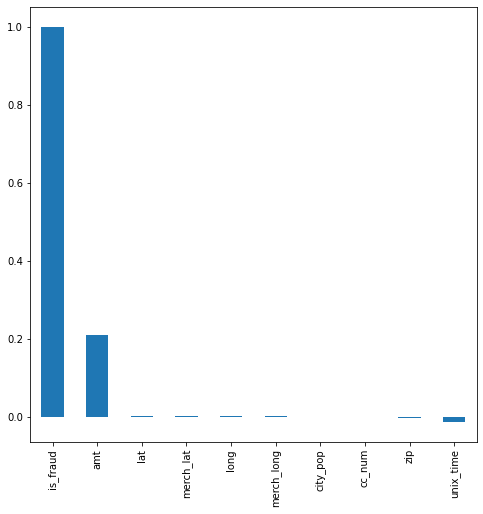

In [127]:
# lets check correlation of 'is_fraud' with other columns
plt.figure(figsize=(8,8))
fraud_data.corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference:
 1.  'amt', 'unix_time' are positively correlated with 'is_fraud'. 

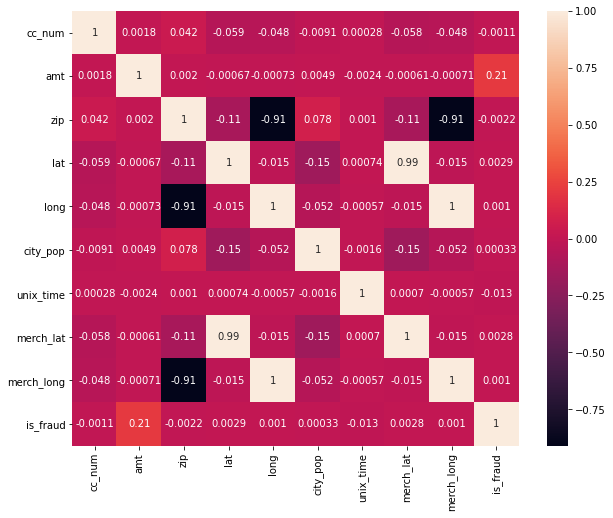

In [128]:
# Checking the coorelations between the variables
plt.figure(figsize=(10,8))
sns.heatmap(fraud_data.corr(), annot= True)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: 
- zip, merch_long & zip, long & merch_lat and lat are highly correlated variables
- zip and long = -0.91
- merch_long and zip= -0.91 
- merch_lat and lat= 0.99 

### 3.1) Univariate Analysis

In [129]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

### 3.1.a) Univariate Analysis of Numerical Variables

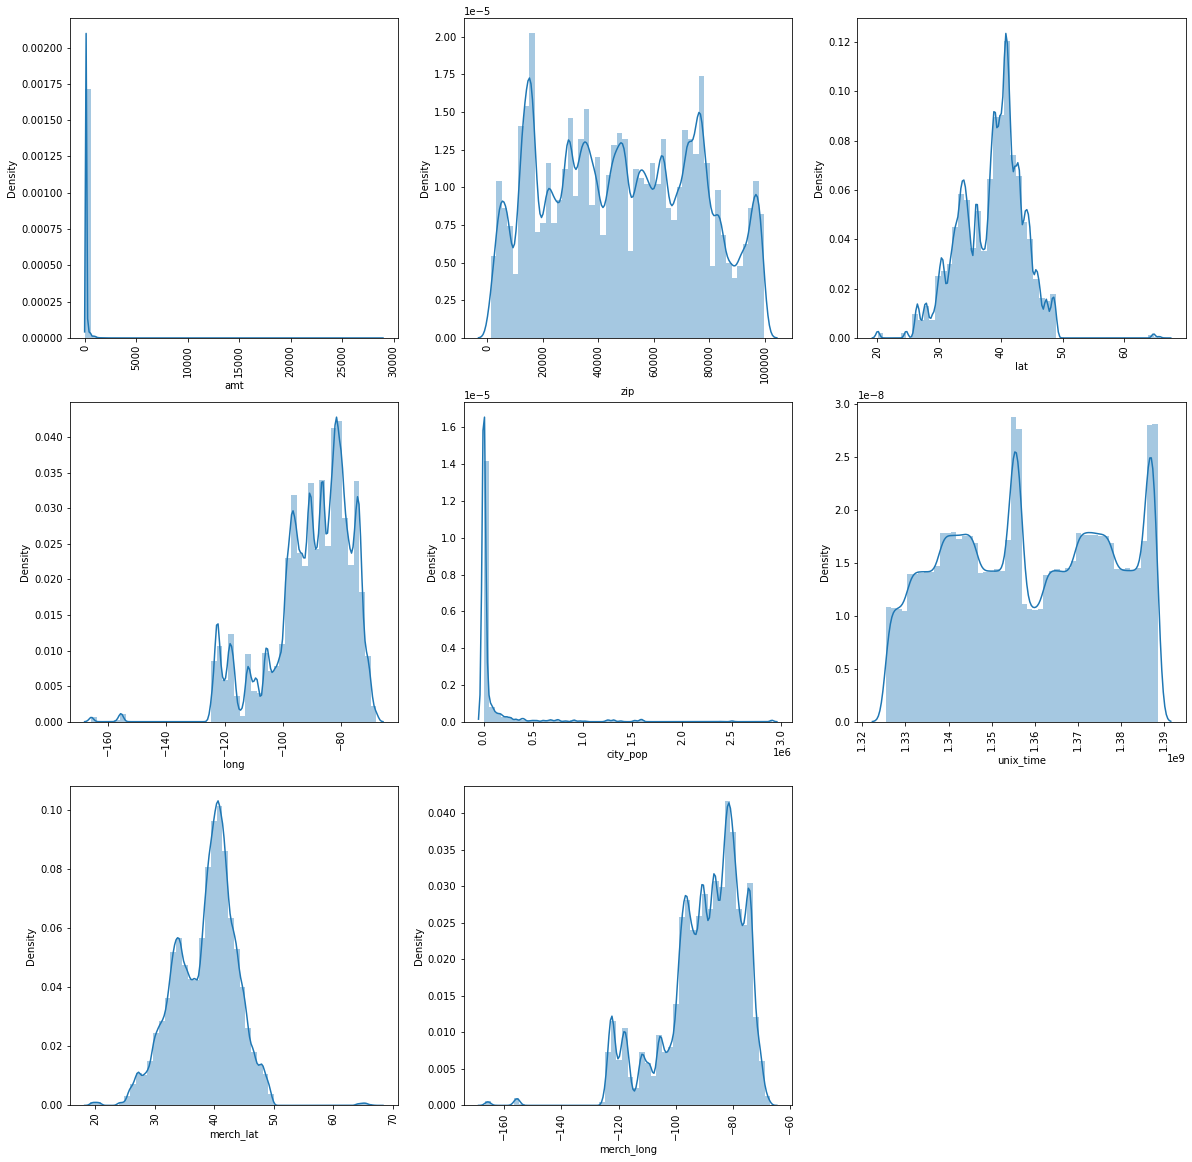

In [130]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(fraud_data['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(fraud_data['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(fraud_data['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(fraud_data['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(fraud_data['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(fraud_data['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(fraud_data['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(fraud_data['merch_long'])
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the distribution of 'amt, zip', 'lat', 'long', 'city_pop', unix_time',  'merch_lat' and 'merch_long'

- The 'amt' and 'city_pop' are highly skewed variables.

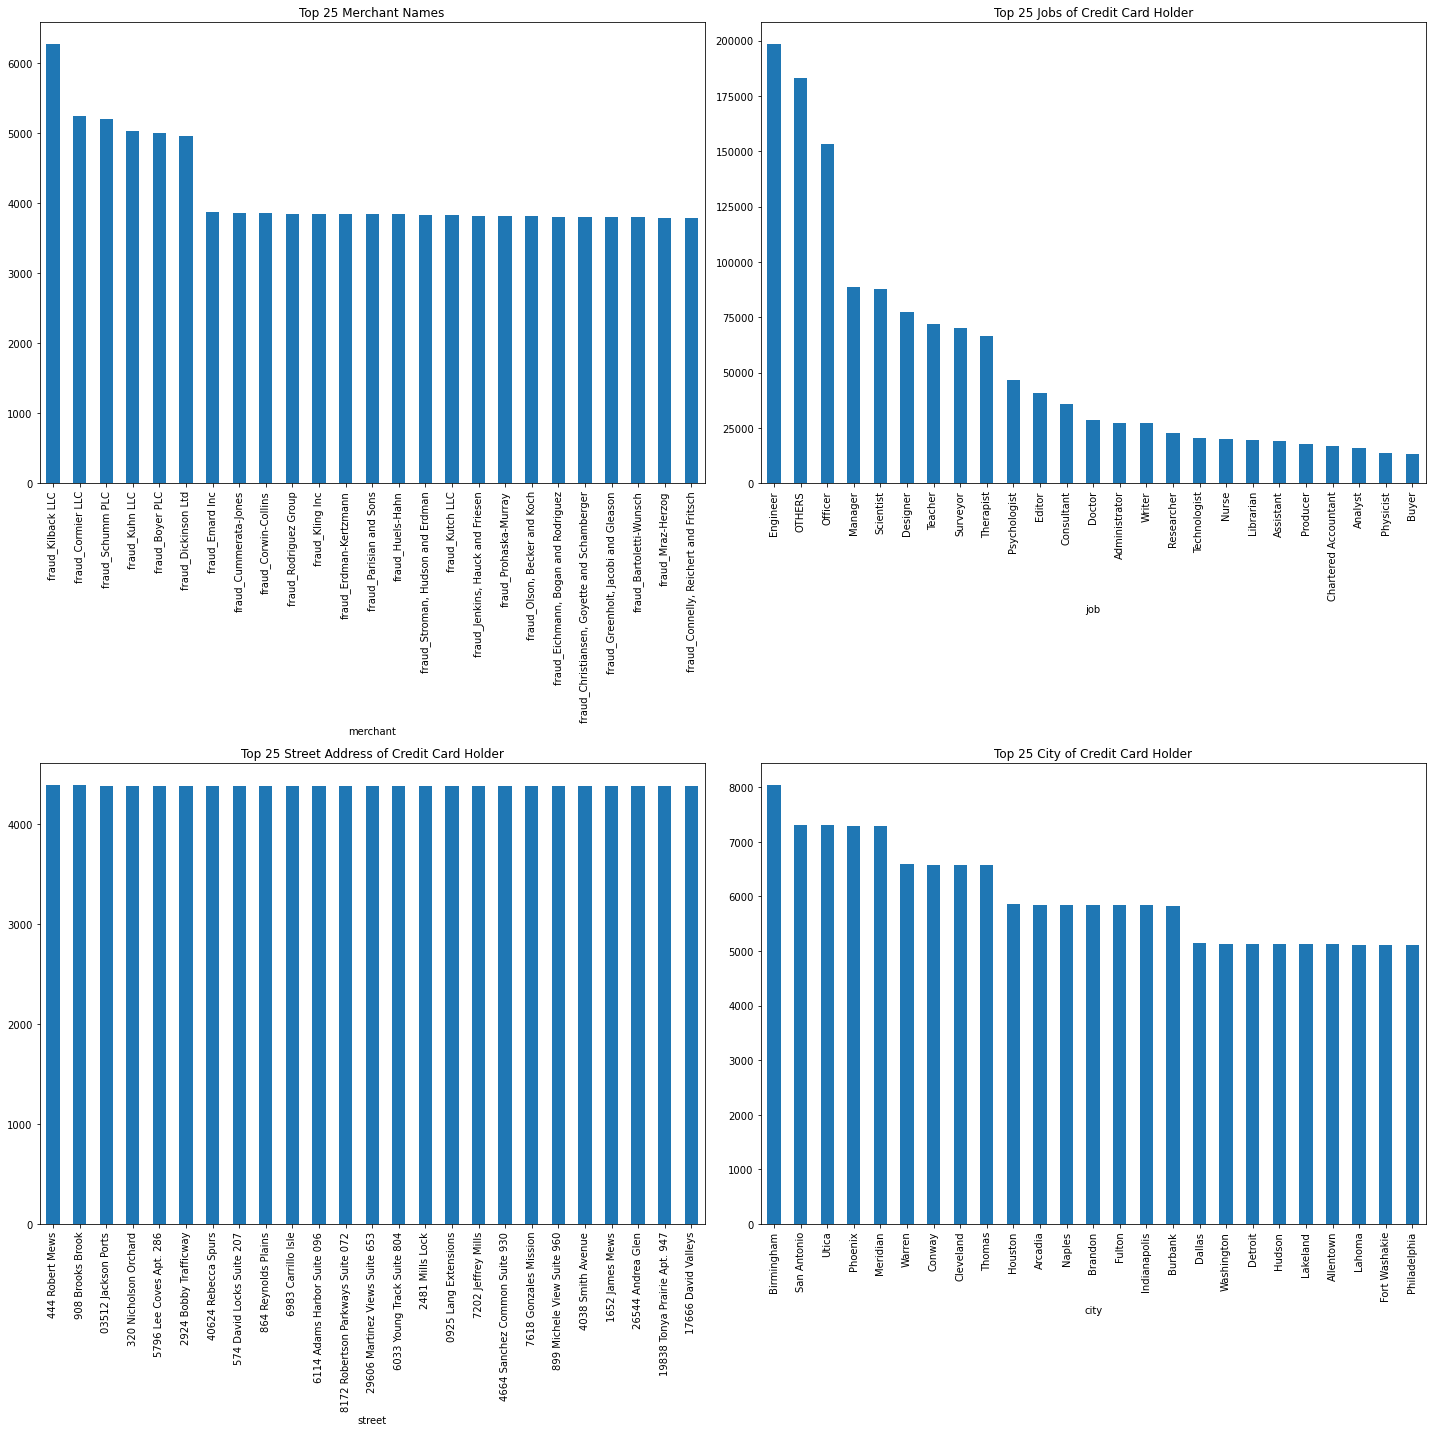

In [131]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
fraud_data['merchant'].value_counts().head(25).plot.bar()
plt.xlabel('merchant')
plt.title('Top 25 Merchant Names')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
fraud_data['job'].value_counts().head(25).plot.bar()
plt.xlabel('job')
plt.title('Top 25 Jobs of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(2,2,3)
fraud_data['street'].value_counts().head(25).plot.bar()
plt.xlabel('street')
plt.title('Top 25 Street Address of Credit Card Holder')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
fraud_data['city'].value_counts().head(25).plot.bar()
plt.xlabel('city')
plt.title('Top 25 City of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: Above graph shows Top 25 Merchant Names, Jobs of Credit Card Holder, Street Address of Credit Card Holder, City of Credit Card Holder.

### 3.1.b) Univariate Analysis of Categorical Variables

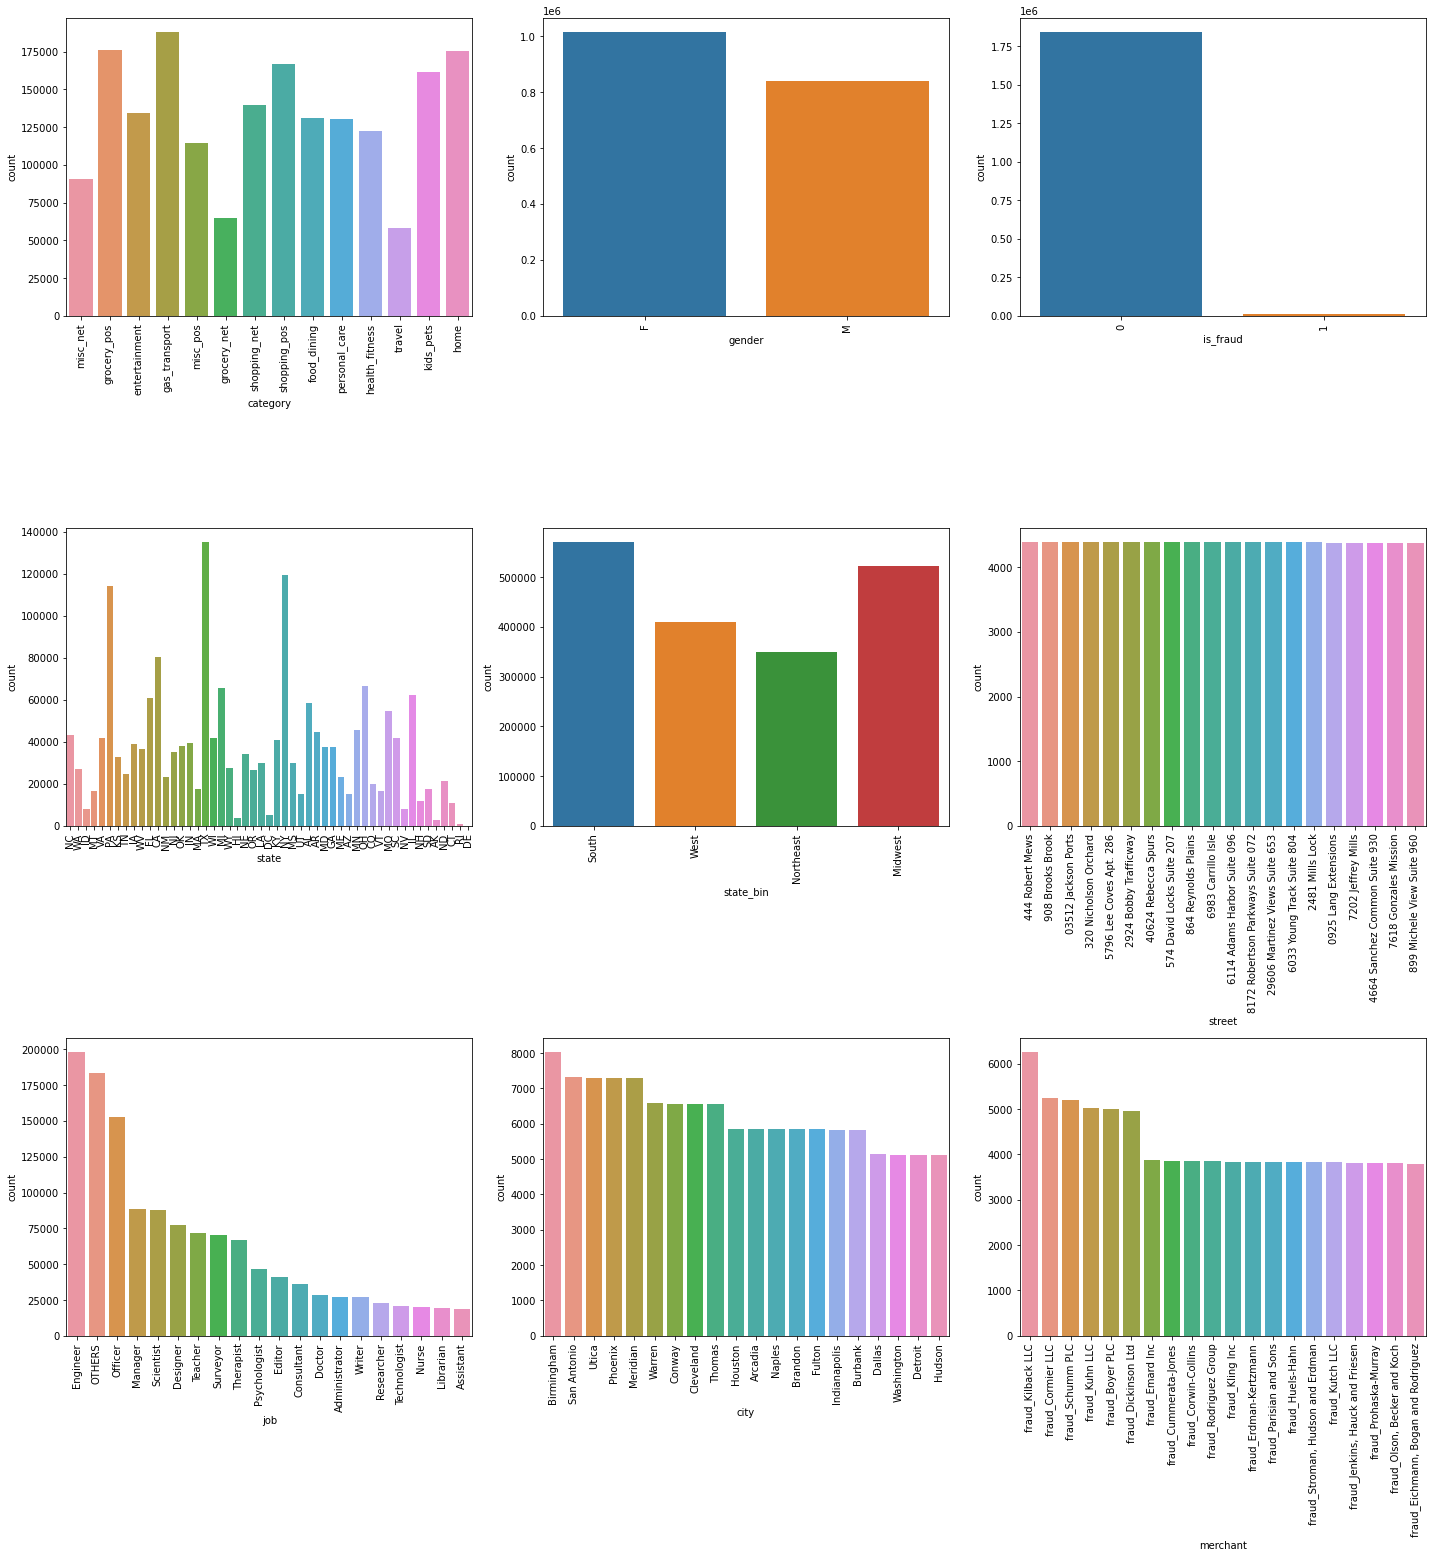

In [132]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(fraud_data['category'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(fraud_data["gender"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(fraud_data["is_fraud"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.countplot(fraud_data["state"])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.countplot(fraud_data["state_bin"])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.countplot(fraud_data["street"], order=fraud_data.street.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.countplot(fraud_data["job"], order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,8)
sns.countplot(fraud_data["city"], order=fraud_data.city.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,9)
sns.countplot(fraud_data["merchant"], order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows:

- The count of transaction based on categorical varibales i.e category, is_fraud,gender, state, state_bin.
- The count of transaction in top 25 of street, job, city, merchant.

### 3.2)  Multivariate Analysis

### 3.2.a) Visualising Numerical - Numerical Variables

#### Let's make a pairplot of all the numeric variables

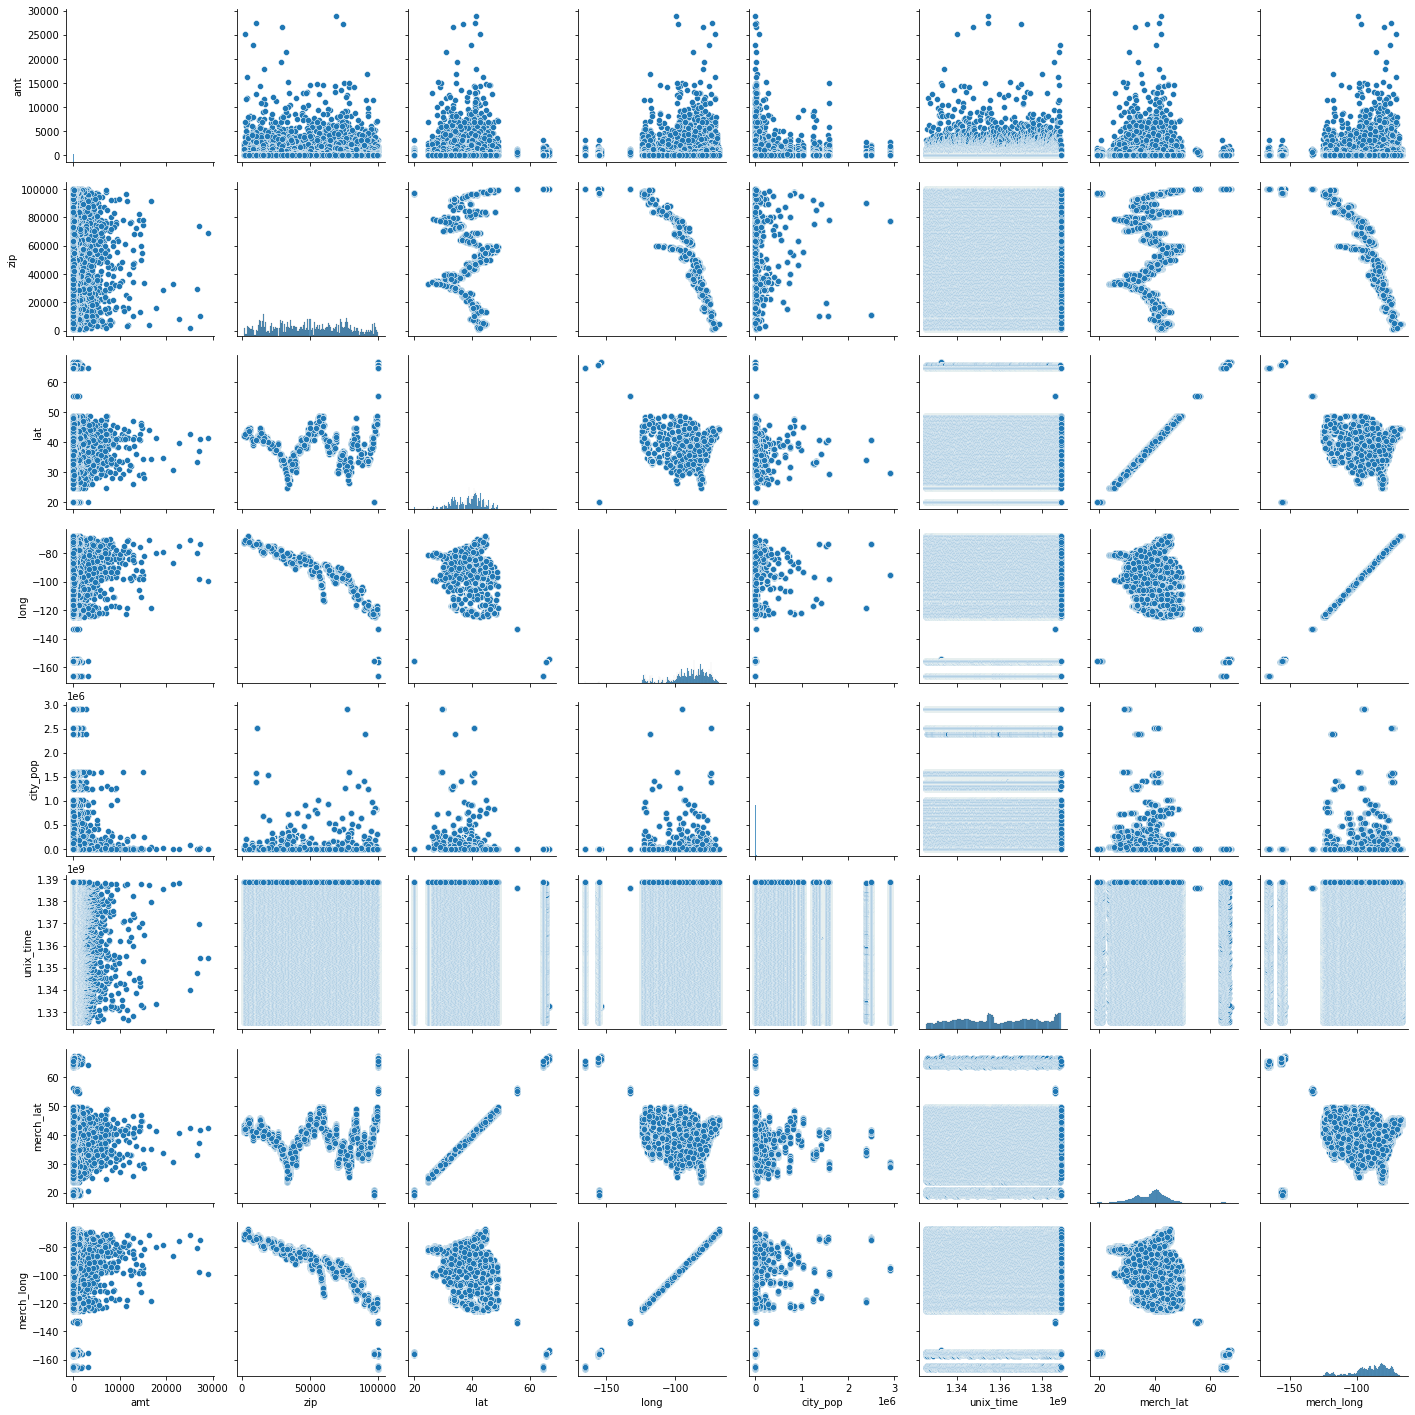

In [133]:
# Let's make a pairplot of all the numeric variables
num_var=fraud_data[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
sns.pairplot(num_var)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above pairplot of numeric variables shows relation between each other  

### 3.2.b) Visualising Categorical- Categorical Variables

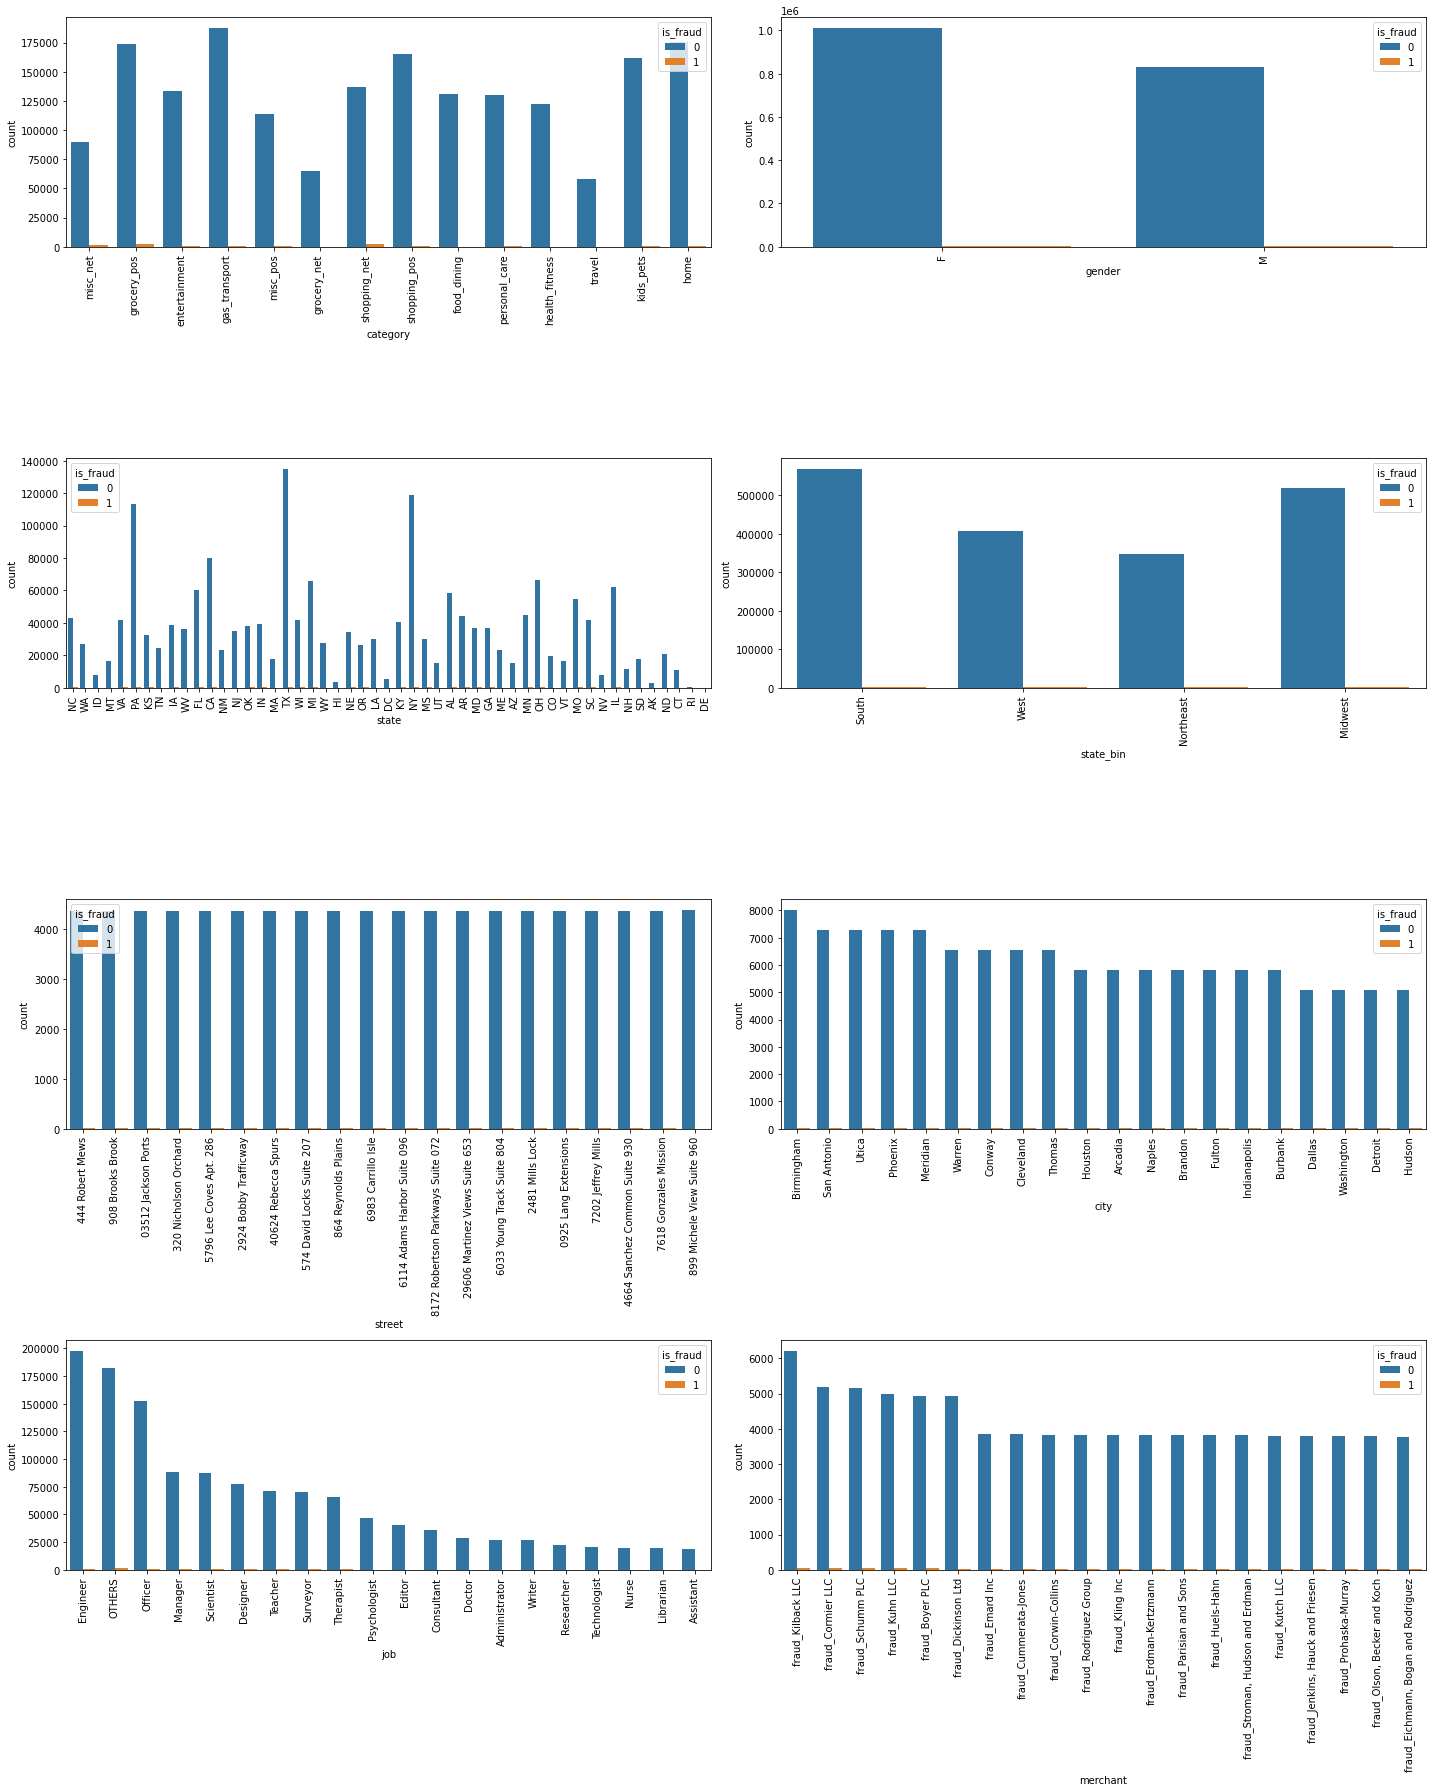

In [134]:
fig= plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x = "category", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = "gender", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,3)
sns.countplot(x = "state", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)


plt.subplot(4,2,4)
sns.countplot(x = "state_bin", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,5)
sns.countplot(x = "street", hue = "is_fraud", data = fraud_data, 
                                              order=fraud_data.street.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(4,2,6)
sns.countplot(x = "city", hue = "is_fraud", data = fraud_data, 
                                                order=fraud_data.city.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,7)
sns.countplot(x = "job", hue = "is_fraud", data = fraud_data, 
                                                order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(4,2,8)
sns.countplot(x = "merchant", hue = "is_fraud", data = fraud_data, 
                                            order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
### Inference: The above plot shows comparison between the target varibale `is_fraud` and the categorical variables i.e category, gender, state, state_bin, street, city , job and merchant 

</div>

### 3.2.c) Visualising Numerical - Categorical Variables

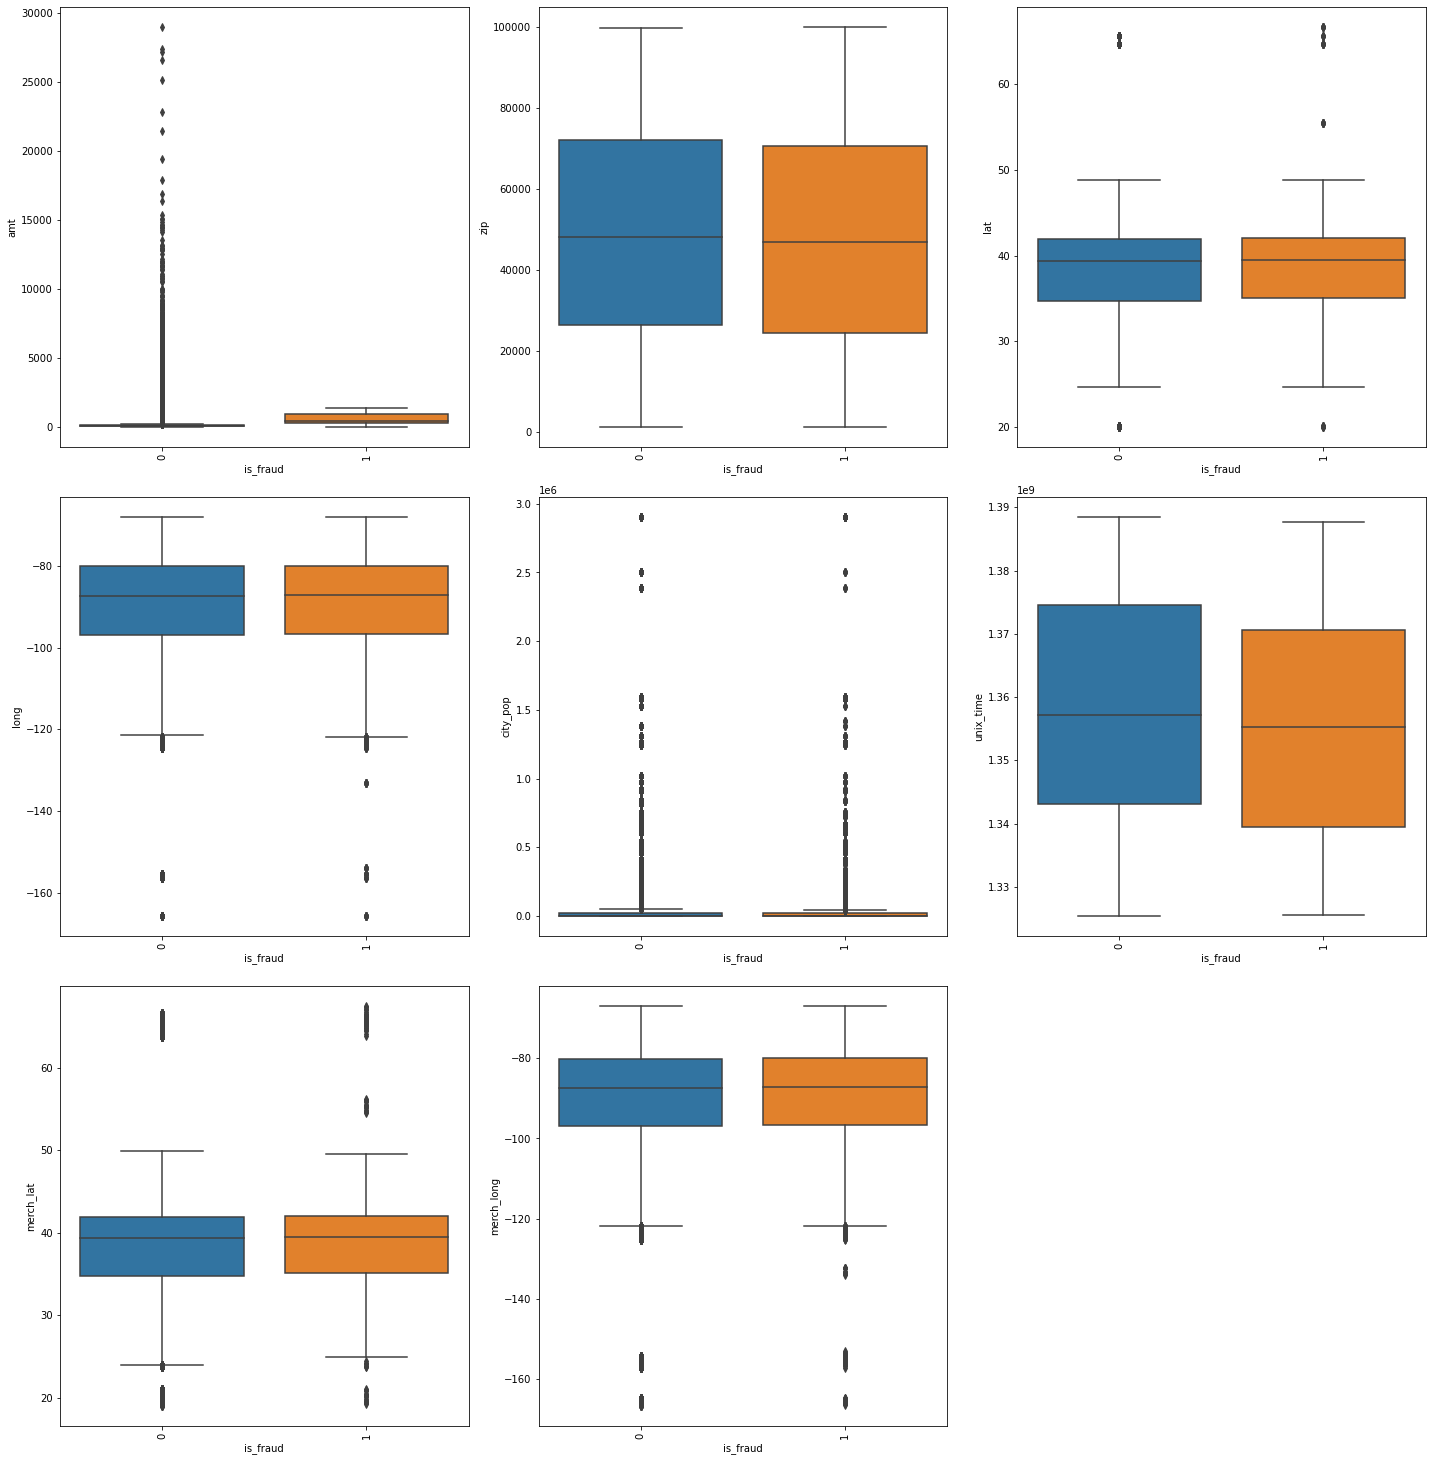

In [135]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.boxplot(y = "lat", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.boxplot(y = "long", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.boxplot(y = "city_pop", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.boxplot(y = "unix_time", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.boxplot(y = "merch_long", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the boxplots between the target varibale `is_fraud` and the numerical variables i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat, merchant_long, 
    

### Step 4: Data Preparation

<div class="alert alert-block alert-info">


### 4.1) Feature Engineering (Derive some new feautres from the existing columns)

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Using our business understanding to derive features which we think could be important indicators of frauds.

<div class="alert alert-block alert-success">
    
We can derive following columns

    1. `age` on transaction day from "dob" variable and binning of age variable
    2. `trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction from trans_date_trans_time variable
    3. `dis` i.e distance between credit card lat, long to merchant lat and long
    4. Historical variables such as `moving_average`, `amt_by_moving_average`
    5. `prev_merch_lat`, `prev_merch_long` i.e Previous longitude/latitude of merchant and `time_since_prev_transaction` i.e time since previous transaction in hours
    6. distance_between_merchants by calculating distance between current and previous purchase location

#### 1) Deriving `age` on transaction day from "dob" variable and binning of age variable

In [136]:
fraud_data["age"] = fraud_data["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [137]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

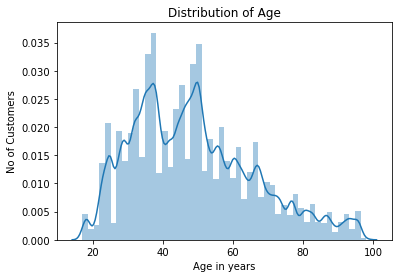

In [138]:
ax = sns.distplot(fraud_data['age'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Age in years')
ax.set_title('Distribution of Age')
plt.show()

<div class="alert alert-block alert-info">   
    
#### Inference: Above graph shows the age of the credit card holders and majority of it falls under the age of 30 to 50 years.

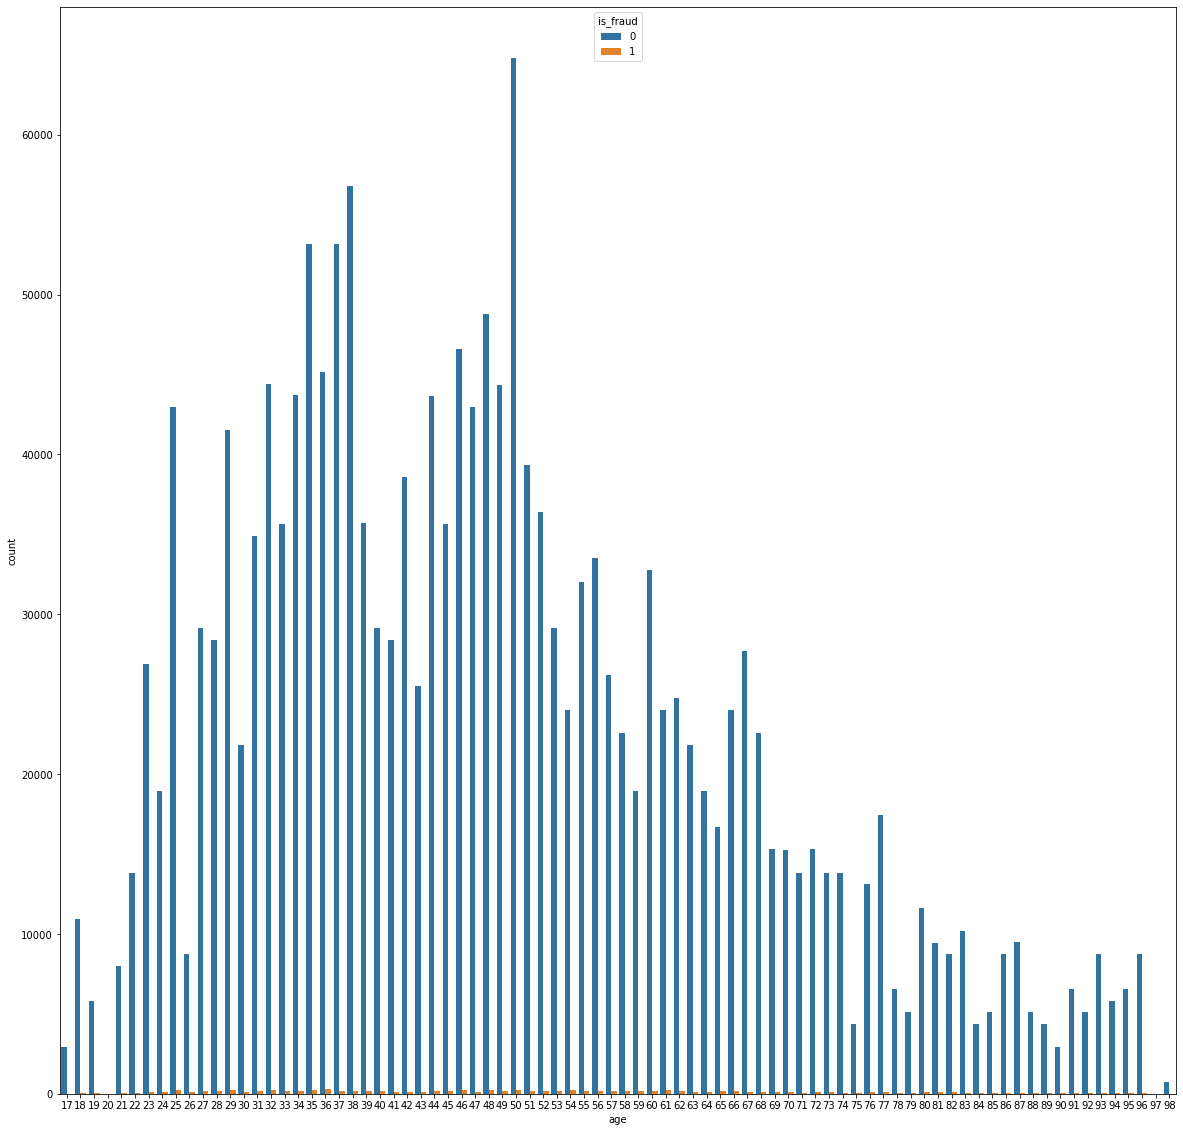

In [139]:
plt.figure(figsize=(20,20))
sns.countplot(x = 'age', hue = 'is_fraud',data =fraud_data)
plt.show()

#### Binning of age variable for better insights

In [140]:
bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labs = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
fraud_data['age_bin'] = pd.cut(fraud_data.age, bins=bin_manual, labels=labs)

In [141]:
fraud_data[['age_bin','age']].head()

age_bin  age
0   30-40   34
1   40-50   44
2   50-60   60
3   50-60   55
4   30-40   36

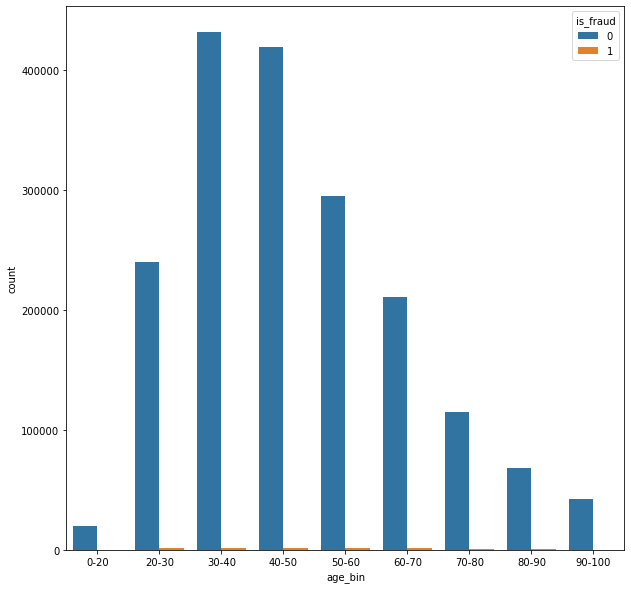

In [142]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'age_bin', hue = 'is_fraud',data =fraud_data)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
- From the above graph we can infer that majority of the credit card holders belongs to the age of 30 to 50 years.¶
- The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 20 to 70 years.¶

In [143]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

#### 2. Deriving `trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction from trans_date_trans_time variable

In [144]:
fraud_data['trans_Year']=fraud_data.trans_Date.dt.year
fraud_data['trans_year_month'] = fraud_data.trans_Date.dt.to_period('M')
fraud_data['trans_Month']=fraud_data.trans_Date.dt.month
fraud_data['trans_Hour']=fraud_data.trans_date_trans_time.dt.hour
fraud_data['trans_Day']=fraud_data.trans_Date.dt.day
fraud_data['trans_weekday'] = fraud_data.trans_Date.dt.day_name()

fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

In [145]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

#### 3) Deriving `dis` i.e. distance between credit card lat, long to merchant lat and long

In [146]:
from math import radians, cos, sin, asin, sqrt 

def haversine_distance(lat, long, merch_lat, merch_long): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    long = np.radians(long) 
    merch_long = np.radians(merch_long) 
    lat = np.radians(lat) 
    merch_lat = np.radians(merch_lat) 
       
    # Haversine formula  
    dlon = merch_long - long  
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) 
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    
    # Radius of earth in kilometers.  
    r = 6371
    d=  c * r
    # calculate the result 
    return round(d,2)

In [147]:
fraud_data['dist']=fraud_data[['lat', 'long', 'merch_lat', 'merch_long']].apply(
                                        lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [148]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

#### 4) Deriving `prev_merch_lat`, `prev_merch_long` i.e Previous longitude/latitude of merchant and `time_since_prev_transaction` i.e time since previous transaction in hours

In [149]:
# Get previous longitude/latitude and time elapsed of a transaction
fraud_data['prev_merch_lat']=grp_by_cc['merch_lat'].transform(lambda x:x.shift(1)).fillna(
                                                                        fraud_data['merch_lat'])
fraud_data['prev_merch_long']=grp_by_cc['merch_long'].transform(lambda x:x.shift(1)).fillna(
                                                                        fraud_data['merch_long'])
# Time since previous transaction in hours
fraud_data['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x:round(
                                                                     (x-x.shift(1)),1)).fillna(0)

In [150]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

#### 5) Deriving `distance_between_merchants` by calculating distance between current and previous purchase location

In [151]:
fraud_data['distance_between_merchants']=fraud_data.apply(lambda x:haversine_distance(
                                            x.prev_merch_lat,x.prev_merch_long,x.merch_lat,x.merch_long), axis=1)

In [152]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.

#### 6) Deriving Historical variables such as `24 Hours Orders by Customers`, `30 Day Transactions by Customers,`30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `

- calculating the rolling moving avearge of previous 10 data and then calculatig the avearge of the amt, amt_by_moving_avearge will help in deciding the bar , where after that fraud alarm will be sent to the customers

In [153]:
df2 = fraud_data.copy()

In [154]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        OTHERS 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18     South   34   30-40        2019   
1         0 2019-01-01   00:00:44      West   44   40-50        2019   
2         0 2019-01-01   00:00:51      West   60   50-60        2019   
3         0 2019-01-01   00:01:16      West   55   50-60        2019   
4         0 2019-01-01   00:03:06     South   36   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [155]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender                        street  \
time_index                                                         
2019-01-01 00:00:18    4.97      F                561 Perry Cove   
2019-01-01 00:00:44  107.23      F  43039 Riley Greens Suite 393   
2019-01-01 00:00:51  220.11      M      594 White Dale Suite 530   
2019-01-01 00:01:16   45.00      M   9443 Cynthia Court Apt. 038   
2019-01-01 00:03:06   41.96      M              408 Bradley Rest   

                               city state    zip      lat      long  city_pop  \
time_index                                                                      
2019-01-01 00:00:18  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
2019-01-01 00:00:44          Orient    WA  99160  48.8878 -118.2105       149   
2019-01-01 00:00:51      Malad City    ID  83252  42.1808 -112.2620      4154   
2019-01-01 00:01:16         Boulder    MT  59632  46.2306 -112.1138      1939   
2019-01-01 00:03:06        Doe Hill    VA  24433  38.4207  -79.4629        99   

                              job        dob  \
time_index                                     
2019-01-01 00:00:18  Psychologist 1988-03-09   
2019-01-01 00:00:44       Teacher 1978-06-21   
2019-01-01 00:00:51       Officer 1962-01-19   
2019-01-01 00:01:16        OTHERS 1967-01-12   
2019-01-01 00:03:06     Therapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
time_index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud trans_Date trans_Time state_bin  \
time_index                                                                  
2019-01-01 00:00:18  -82.048315         0 2019-01-01   00:00:18     South   
2019-01-01 00:00:44 -118.186462         0 2019-01-01   00:00:44      West   
2019-01-01 00:00:51 -112.154481         0 2019-01-01   00:00:51      West   
2019-01-01 00:01:16 -112.561071         0 2019-01-01   00:01:16      West   
2019-01-01 00:03:06  -78.632459         0 2019-01-01   00:03:06     South   

                     age age_bin  trans_Year trans_year_month  trans_Month  \
time_index                                                                   
2019-01-01 00:00:18   34   30-40        2019          2019-01            1   
2019-01-01 00:00:44   44   40-50        2019          2019-01            1   
2019-01-01 00:00:51   60   50-60        2019          2019-01            1   
2019-01-01 00:01:16   55   50-60        2019          2019-01            1   
2019-01-01 00:03:06   36   30-40        2019          2019-01            1   

                     trans_Ho

#### Orders in last 2 Months

In [156]:
df2['val_for_agg'] = 1

#### 30 Day Transactions by Customers

In [157]:
df_hist_trans_30d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [158]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [159]:
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [160]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### 24 Hours Orders by Customers

In [161]:
df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [162]:
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [163]:
df_hist_orders_24h

cc_num trans_date_trans_time  hist_trans_24h
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10             7.0
1852346  4992346398065154184   2020-12-31 05:13:35             7.0
1852347  4992346398065154184   2020-12-31 11:15:44             7.0
1852348  4992346398065154184   2020-12-31 11:17:25             8.0
1852349  4992346398065154184   2020-12-31 13:24:36             9.0

[1852350 rows x 3 columns]

In [164]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### 30 Day Orders Amt Avg by Customers

In [165]:
df_hist_trans_amt_avg_30d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [166]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_30d'].min().reset_index()

In [167]:
df_hist_trans_amt_avg_30d

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               73.768533
1852346  4992346398065154184   2020-12-31 05:13:35               73.727135
1852347  4992346398065154184   2020-12-31 11:15:44               73.734757
1852348  4992346398065154184   2020-12-31 11:17:25               73.884890
1852349  4992346398065154184   2020-12-31 13:24:36               74.297978

[1852350 rows x 3 columns]

In [168]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### 24 Hours Orders Amt Avg by Customers

In [169]:
df_hist_trans_amt_avg_24h = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [170]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_24h'].min().reset_index()

In [171]:
df_hist_trans_amt_avg_24h

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               95.651429
1852346  4992346398065154184   2020-12-31 05:13:35               91.812857
1852347  4992346398065154184   2020-12-31 11:15:44               84.262857
1852348  4992346398065154184   2020-12-31 11:17:25               85.725000
1852349  4992346398065154184   2020-12-31 13:24:36               92.808889

[1852350 rows x 3 columns]

In [172]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [173]:
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [174]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [175]:
fraud_data=pd.merge(fraud_data, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip      lat  \
0                      561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2            594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                               ...             ...   ...    ...      ...   
1852389           558 Michael Estates           Luray    MO  63453  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

             long  city_pop             job        dob  \
0        -81.1781      3495    Psychologist 1988-03-09   
1       -118.2105       149         Teacher 1978-06-21   
2       -112.2620      4154         Officer 1962-01-19   
3       -112.1138      1939          OTHERS 1967-01-12   
4        -79.4629        99       Therapist 1986-03-28   
...           ...       ...             ...        ...   
1852389  -91.8912       519    Town planner 1966-02-13   
1852390  -95.4401     28739  Futures trader 1999-12-27   
1852391 -118.9017      3684        Musician 1981-11-29   
1852392 -116.4493       129          OTHERS 1965-12-15   
1852393  -97.4798    116001           Buyer 1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
1852392  143

In [176]:
fraud_data.shape

(1852394, 37)

In [177]:
df_hist_trans_30d[df_hist_trans_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_30d
443618  38859492057661   2019-01-01 00:00:51             8.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             2.0
443621  38859492057661   2019-01-05 03:25:17             3.0
443622  38859492057661   2019-01-05 05:05:19             4.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43            47.0
444349  38859492057661   2020-12-29 06:50:33            48.0
444350  38859492057661   2020-12-29 17:22:06            49.0
444351  38859492057661   2020-12-31 10:11:14            50.0
444352  38859492057661   2020-12-31 12:04:41            46.0

[735 rows x 3 columns]

In [178]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652         0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315         0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972         0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563         0 2019-01-05   05:05:19   
...             ...        ...         ...       ...        ...        ...   
1839040  1388266483  42.419812 -112.678783         0 2020-12-28   21:34:43   
1841195 

In [179]:
fraud_data.shape

(1852394, 37)

In [180]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [181]:
fraud_data=pd.merge(fraud_data, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip      lat  \
0                      561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2            594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                               ...             ...   ...    ...      ...   
1852389           558 Michael Estates           Luray    MO  63453  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

             long  city_pop             job        dob  \
0        -81.1781      3495    Psychologist 1988-03-09   
1       -118.2105       149         Teacher 1978-06-21   
2       -112.2620      4154         Officer 1962-01-19   
3       -112.1138      1939          OTHERS 1967-01-12   
4        -79.4629        99       Therapist 1986-03-28   
...           ...       ...             ...        ...   
1852389  -91.8912       519    Town planner 1966-02-13   
1852390  -95.4401     28739  Futures trader 1999-12-27   
1852391 -118.9017      3684        Musician 1981-11-29   
1852392 -116.4493       129          OTHERS 1965-12-15   
1852393  -97.4798    116001           Buyer 1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
1852392  143

In [182]:
fraud_data.shape

(1852394, 38)

In [183]:
df_hist_orders_24h[df_hist_orders_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_24h
443618  38859492057661   2019-01-01 00:00:51             5.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             1.0
443621  38859492057661   2019-01-05 03:25:17             2.0
443622  38859492057661   2019-01-05 05:05:19             3.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43             3.0
444349  38859492057661   2020-12-29 06:50:33             1.0
444350  38859492057661   2020-12-29 17:22:06             2.0
444351  38859492057661   2020-12-31 10:11:14             3.0
444352  38859492057661   2020-12-31 12:04:41             1.0

[735 rows x 3 columns]

In [184]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652         0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315         0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972         0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563         0 2019-01-05   05:05:19   
...             ...        ...         ...       ...        ...        ...   
1839040  1388266483  42.419812 -112.678783         0 2020-12-28   21:34:43   
1841195 

In [185]:
fraud_data.shape

(1852394, 38)

df_hist_trans_30d,    df_hist_orders_24h, df_hist_trans_amt_avg_30d, df_hist_trans_amt_avg_24h

In [186]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [187]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip      lat  \
0                      561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2            594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                               ...             ...   ...    ...      ...   
1852389           558 Michael Estates           Luray    MO  63453  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

             long  city_pop             job        dob  \
0        -81.1781      3495    Psychologist 1988-03-09   
1       -118.2105       149         Teacher 1978-06-21   
2       -112.2620      4154         Officer 1962-01-19   
3       -112.1138      1939          OTHERS 1967-01-12   
4        -79.4629        99       Therapist 1986-03-28   
...           ...       ...             ...        ...   
1852389  -91.8912       519    Town planner 1966-02-13   
1852390  -95.4401     28739  Futures trader 1999-12-27   
1852391 -118.9017      3684        Musician 1981-11-29   
1852392 -116.4493       129          OTHERS 1965-12-15   
1852393  -97.4798    116001           Buyer 1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
1852392  143

In [188]:
fraud_data.shape

(1852394, 39)

In [189]:
df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
443618  38859492057661   2019-01-01 00:00:51              377.925000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51              142.185000
443621  38859492057661   2019-01-05 03:25:17               98.176667
443622  38859492057661   2019-01-05 05:05:19               94.095000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               72.140851
444349  38859492057661   2020-12-29 06:50:33               72.130208
444350  38859492057661   2020-12-29 17:22:06               72.731837
444351  38859492057661   2020-12-31 10:11:14               75.038400
444352  38859492057661   2020-12-31 12:04:41               81.195435

[735 rows x 3 columns]

In [190]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652         0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315         0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972         0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563         0 2019-01-05   05:05:19   
...             ...        ...         ...       ...        ...        ...   
1839040  1388266483  42.419812 -112.678783         0 2020-12-28   21:34:43   
1841195 

In [191]:
fraud_data.shape

(1852394, 39)

In [192]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [193]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip      lat  \
0                      561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2            594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                               ...             ...   ...    ...      ...   
1852389           558 Michael Estates           Luray    MO  63453  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

             long  city_pop             job        dob  \
0        -81.1781      3495    Psychologist 1988-03-09   
1       -118.2105       149         Teacher 1978-06-21   
2       -112.2620      4154         Officer 1962-01-19   
3       -112.1138      1939          OTHERS 1967-01-12   
4        -79.4629        99       Therapist 1986-03-28   
...           ...       ...             ...        ...   
1852389  -91.8912       519    Town planner 1966-02-13   
1852390  -95.4401     28739  Futures trader 1999-12-27   
1852391 -118.9017      3684        Musician 1981-11-29   
1852392 -116.4493       129          OTHERS 1965-12-15   
1852393  -97.4798    116001           Buyer 1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
1852392  143

In [194]:
fraud_data.shape

(1852394, 40)

In [195]:
df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
443618  38859492057661   2019-01-01 00:00:51              445.778000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51               64.260000
443621  38859492057661   2019-01-05 03:25:17               37.210000
443622  38859492057661   2019-01-05 05:05:19               52.090000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               30.326667
444349  38859492057661   2020-12-29 06:50:33               71.630000
444350  38859492057661   2020-12-29 17:22:06               86.620000
444351  38859492057661   2020-12-31 10:11:14              120.433333
444352  38859492057661   2020-12-31 12:04:41               18.400000

[735 rows x 3 columns]

In [196]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652         0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315         0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972         0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563         0 2019-01-05   05:05:19   
...             ...        ...         ...       ...        ...        ...   
1839040  1388266483  42.419812 -112.678783         0 2020-12-28   21:34:43   
1841195 

In [197]:
fraud_data.shape

(1852394, 40)

## 4.2) Insights useful for business or for eventual modelling/feature engineering).

In [198]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = fraud_data[fraud_data.is_fraud == 0]
df_fraud = fraud_data[fraud_data.is_fraud == 1]

### 1. Fraud transactions in 2019 ans 2020

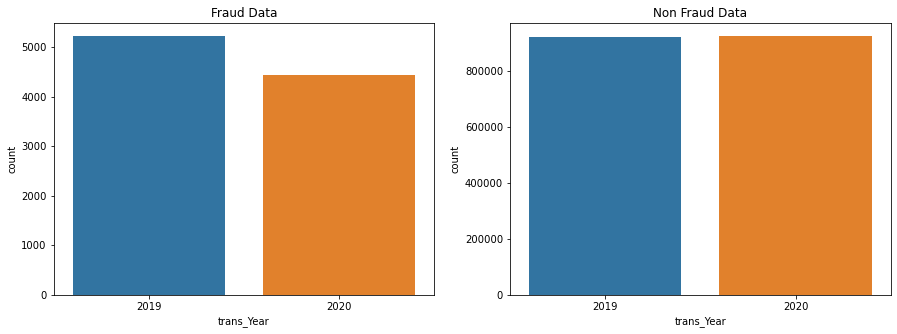

In [199]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Year'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Year'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are decreased over the year, more frauds transactions in 2019.

In [200]:
df_nonfraud.gender.value_counts()

F    1009850
M     832893
Name: gender, dtype: int64

### 2. Fraud transaction based on gender 

In [201]:
df_gender = fraud_data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F       1014749  54.780408
1      M        837645  45.219592

In [202]:
df_fraud_gender = fraud_data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud    count  gender_count  percent_grp
0      F         0  1009850       1014749    99.517221
1      F         1     4899       1014749     0.482779
2      M         0   832893        837645    99.432695
3      M         1     4752        837645     0.567305

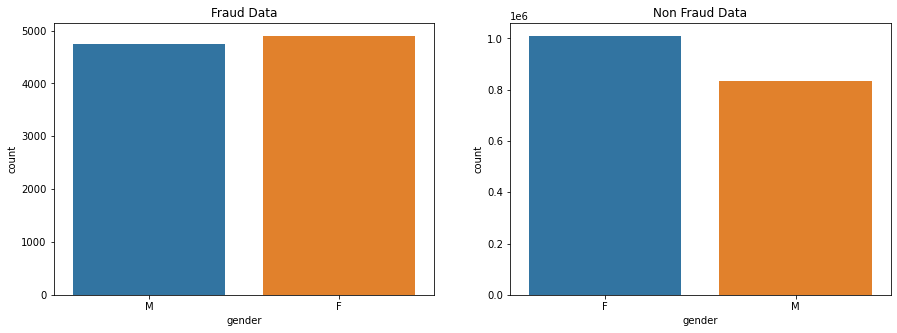

In [203]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['gender'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['gender'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are done on both male and female but fraud transcations is slightly more on Female's credit card holders

### 3. Fraud transcations in months 

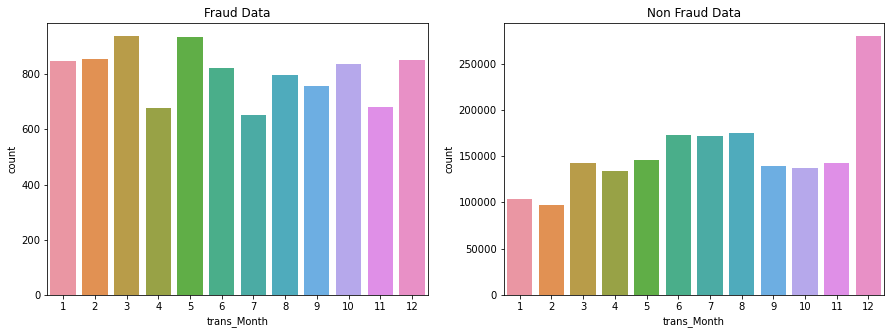

In [204]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Month'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Month'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
   
#### Inference:- 
    - Count of frauds transcations are more in 1st, 2nd, 3rd and 5th month where count of normal transcation is less.
    - Count of frauds transcations is more in 12th month where count of normal transcation is also more

### 4. Fraud transactions in weekdays

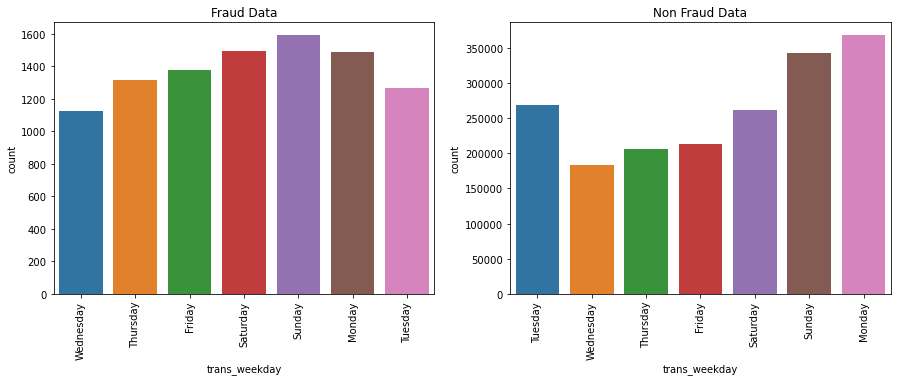

In [205]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_weekday'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_weekday'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Count of frauds transactions are more on Sunday, Saturday and Monday where count of normal transcation is less in Saturday and more in Sunday and Monday

### 5. Fraud transaction on daywise 

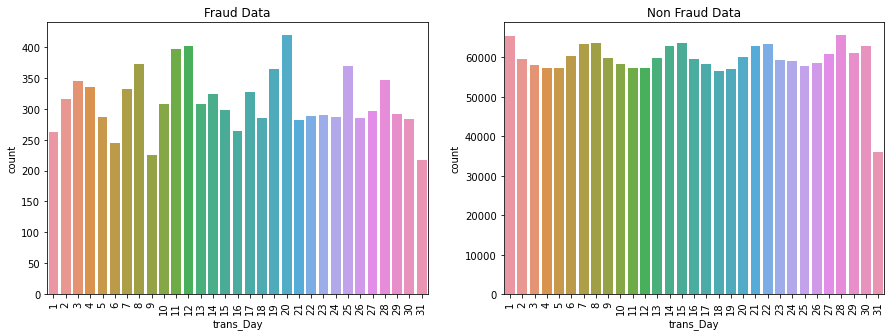

In [206]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Day'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Day'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more on 20th, 12th and 11th days of month.

### 6. Hourly based Fraud Transactions

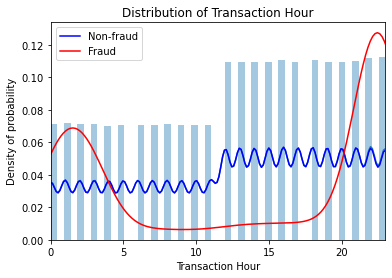

In [207]:
# Time Distribution plot for transactions 
# plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Hour')
sns.distplot(fraud_data['trans_Hour'])

target_0 = fraud_data.loc[fraud_data['is_fraud'] == 0]
target_1 = fraud_data.loc[fraud_data['is_fraud'] == 1]
ax1=sns.distplot(target_0[['trans_Hour']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['trans_Hour']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['trans_Hour']))
ax2.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['trans_Hour']))
plt.legend()
plt.xlabel('Transaction Hour')
plt.ylabel('Density of probability')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are done on the odd hours of the day 22-3 hr (i.e 1am-2am and then increased after 8pm till 23pm )

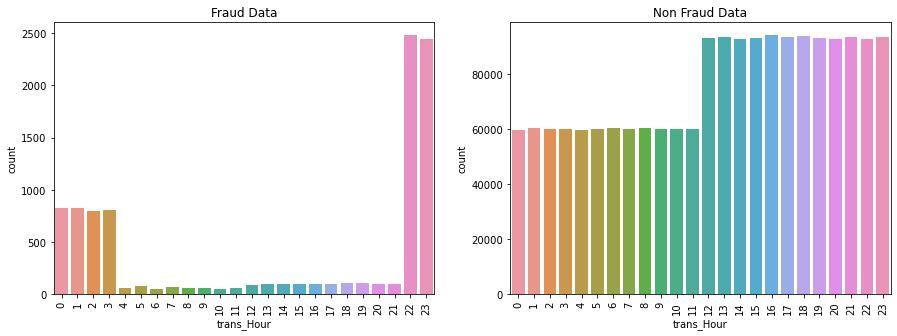

In [208]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Hour'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Hour'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done at odd hours of the day (22 - 3)Hr

### 7.Fraud Transaction in age_bins

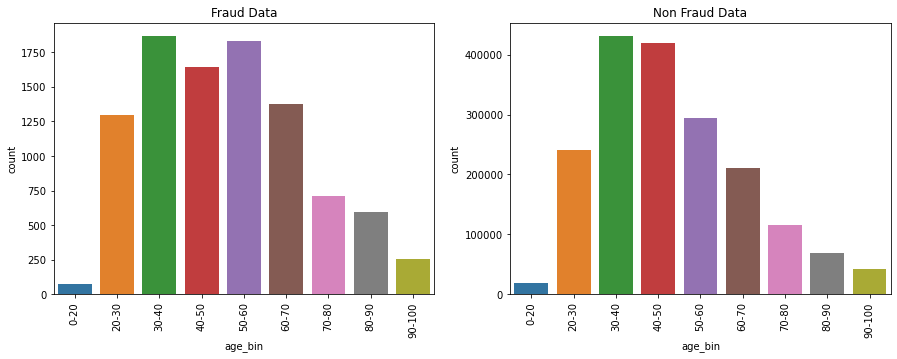

In [209]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['age_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['age_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Count of Frauds transactions are more on credit card holder's age group of 20 to 60
    - Count of Frauds transactions are more on credit card holder's age group of 50 to 60 where as count of normal transactions is less in them.

### 8. Fraud Transactions in categories

In [210]:
df_category = fraud_data[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count    percent
2    gas_transport          188029  10.150594
4      grocery_pos          176191   9.511529
6             home          175460   9.472067
12    shopping_pos          166463   8.986371
7        kids_pets          161727   8.730702
11    shopping_net          139322   7.521186
0    entertainment          134118   7.240252
1      food_dining          130729   7.057300
10   personal_care          130085   7.022534
5   health_fitness          122553   6.615925
9         misc_pos          114229   6.166561
8         misc_net           90654   4.893883
3      grocery_net           64878   3.502387
13          travel           57956   3.128708

In [211]:
df_fraud_category = fraud_data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  187257          188029  10.150594    99.589425
5    gas_transport         1     772          188029  10.150594     0.410575
8      grocery_pos         0  173963          176191   9.511529    98.735463
9      grocery_pos         1    2228          176191   9.511529     1.264537
13            home         1     265          175460   9.472067     0.151032
12            home         0  175195          175460   9.472067    99.848968
25    shopping_pos         1    1056          166463   8.986371     0.634375
24    shopping_pos         0  165407          166463   8.986371    99.365625
14       kids_pets         0  161423          161727   8.730702    99.812029
15       kids_pets         1     304          161727   8.730702     0.187971
23    shopping_net         1    2219          139322   7.521186     1.592713
22    shopping_net         0  137103          139322   7.521186    98.407287
1    entertainment         1     292          134118   7.240252     0.217719
0    entertainment         0  133826          134118   7.240252    99.782281
3      food_dining         1     205          130729   7.057300     0.156813
2      food_dining         0  130524          130729   7.057300    99.843187
20   personal_care         0  129795          130085   7.022534    99.777069
21   personal_care         1     290          130085   7.022534     0.222931
11  health_fitness         1     185          122553   6.615925     0.150955
10  health_fitness         0  122368          122553   6.615925    99.849045
18        misc_pos         0  113907          114229   6.166561    99.718110
19        misc_pos         1     322          114229   6.166561     0.281890
16        misc_net         0   89472           90654   4.893883    98.696141
17        misc_net         1    1182           90654   4.893883     1.303859
7      grocery_net         1     175           64878   3.502387     0.269737
6      grocery_net         0   64703           64878   3.502387    99.730263
26          travel         0   57800           57956   3.128708    99.730830
27          travel         1     156           57956   3.128708     0.269170

In [212]:
df_fraud_cate=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending= False)
df_fraud_cate

Category  is_fraud  count  category_count    percent  percent_grp
23    shopping_net         1   2219          139322   7.521186     1.592713
17        misc_net         1   1182           90654   4.893883     1.303859
9      grocery_pos         1   2228          176191   9.511529     1.264537
25    shopping_pos         1   1056          166463   8.986371     0.634375
5    gas_transport         1    772          188029  10.150594     0.410575
19        misc_pos         1    322          114229   6.166561     0.281890
7      grocery_net         1    175           64878   3.502387     0.269737
27          travel         1    156           57956   3.128708     0.269170
21   personal_care         1    290          130085   7.022534     0.222931
1    entertainment         1    292          134118   7.240252     0.217719
15       kids_pets         1    304          161727   8.730702     0.187971
3      food_dining         1    205          130729   7.057300     0.156813
13            home         1    265          175460   9.472067     0.151032
11  health_fitness         1    185          122553   6.615925     0.150955

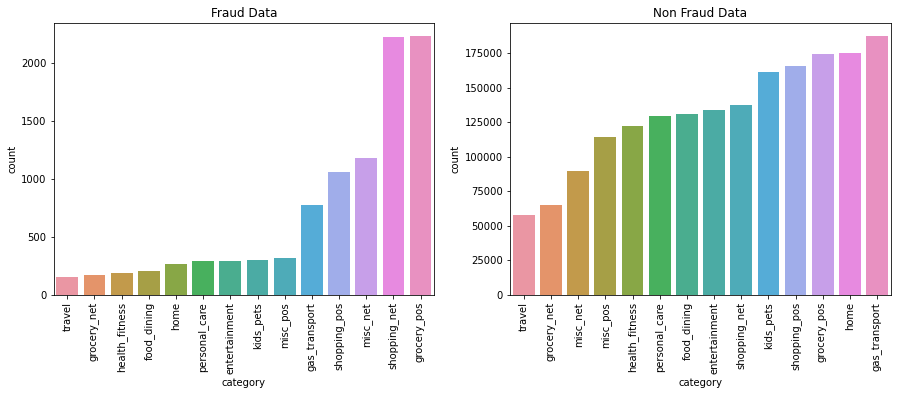

In [213]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['category'],order=df_fraud['category'].value_counts().sort_values().index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['category'],order=df_nonfraud['category'].value_counts().sort_values().index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done more at:
    - grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories
    - shopping_net where count of normal transaction is less.
    - Frauds transactions is slightly less in gas_transport, shopping_pos where count of normal transaction is more.

### 9. Fraud Transactions in job

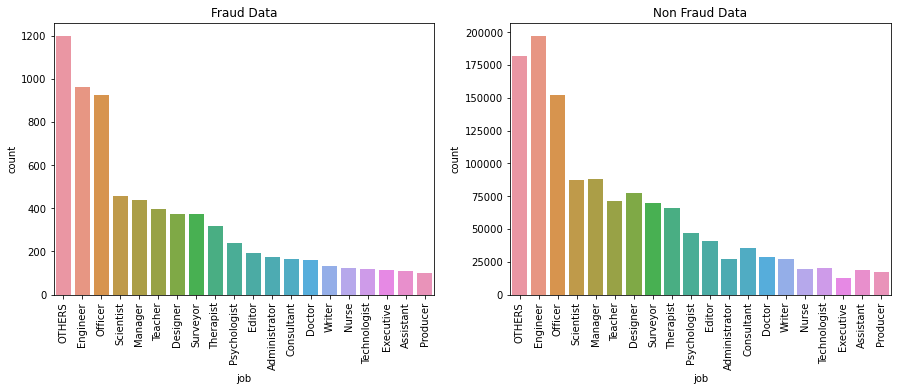

In [214]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['job'],order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['job'],order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done more at:

- Engineer, officer, others, scientist Categories

### 10. Fraud Transactions in State

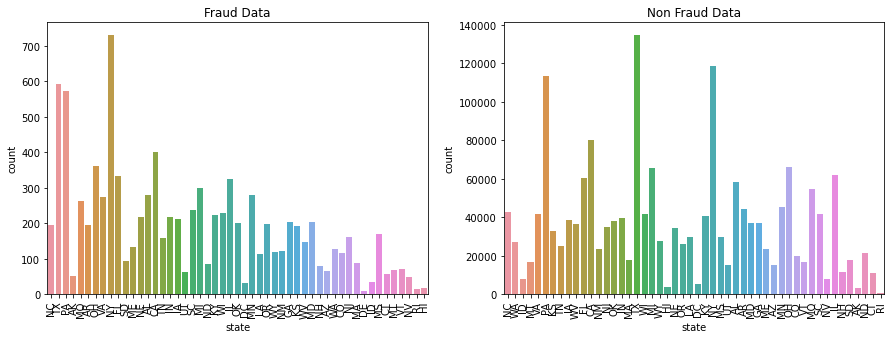

In [215]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in NY, TX and PA States.

### 11. Fraud Transactions in State_bin

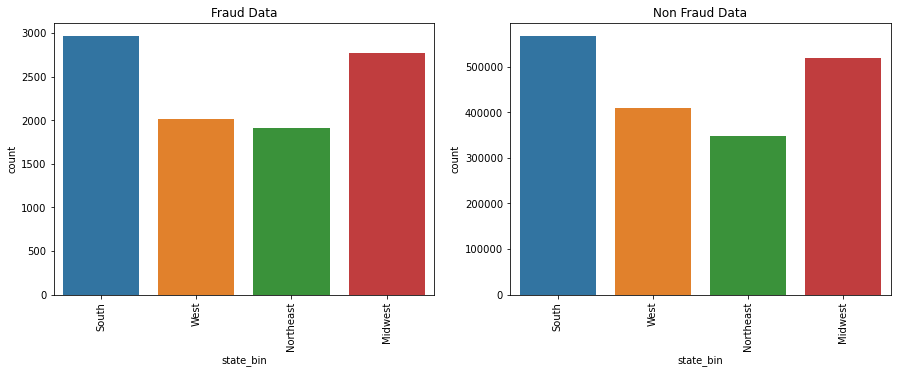

In [216]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in South , MIdwest and lower in West and Northeast States.

### 12. Fraud Transactions in city (top 20)

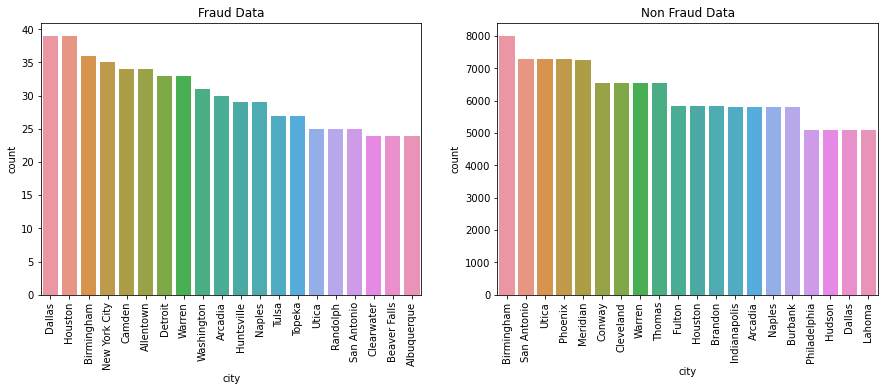

In [217]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['city'],order=df_fraud.city.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['city'],order=df_nonfraud.city.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in Dallas , Houston City and Birmingham City..

### 13. Fraud Transactions in street(top 20)

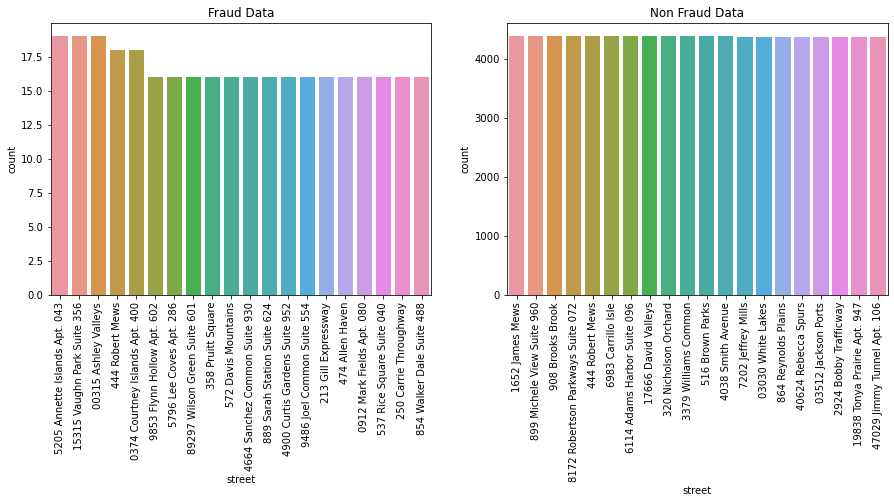

In [218]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['street'],order=df_fraud.street.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['street'],order=df_nonfraud.street.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in 00315 Ashley Valleys, 15315 Vaughn Park Suite 356 and 5205 Annette Islands Apt. 043 street.

### 14. Fraud Transactions in merchant(top 20)

In [219]:
df_merchant = fraud_data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                      fraud_Kilback LLC            6262  0.338049
105                      fraud_Cormier LLC            5246  0.283201
571                       fraud_Schumm PLC            5195  0.280448
349                         fraud_Kuhn LLC            5031  0.271594
70                         fraud_Boyer PLC            4999  0.269867
..                                     ...             ...       ...
143    fraud_Douglas, DuBuque and McKenzie            1101  0.059437
633                     fraud_Treutel-King            1098  0.059275
544                 fraud_Satterfield-Lowe            1095  0.059113
221     fraud_Hahn, Douglas and Schowalter            1091  0.058897
516  fraud_Ritchie, Bradtke and Stiedemann            1090  0.058843

[693 rows x 3 columns]

In [220]:
df_fraud_merchant = fraud_data[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.sort_values(by = ['merchant_count'], ascending=False)

Merchant  is_fraud  count  merchant_count  \
631                       fraud_Kilback LLC         1     62            6262   
630                       fraud_Kilback LLC         0   6200            6262   
211                       fraud_Cormier LLC         1     53            5246   
210                       fraud_Cormier LLC         0   5193            5246   
1135                       fraud_Schumm PLC         0   5154            5195   
...                                     ...       ...    ...             ...   
1082                 fraud_Satterfield-Lowe         0   1091            1095   
1083                 fraud_Satterfield-Lowe         1      4            1095   
442      fraud_Hahn, Douglas and Schowalter         1      5            1091   
441      fraud_Hahn, Douglas and Schowalter         0   1086            1091   
1027  fraud_Ritchie, Bradtke and Stiedemann         0   1090            1090   

       percent  percent_grp  
631   0.338049     0.990099  
630   0.338049    99.009901  
211   0.283201     1.010294  
210   0.283201    98.989706  
1135  0.280448    99.210780  
...        ...          ...  
1082  0.059113    99.634703  
1083  0.059113     0.365297  
442   0.058897     0.458295  
441   0.058897    99.541705  
1027  0.058843   100.000000  

[1378 rows x 6 columns]

In [221]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
673                     fraud_Kozey-Boehm         1     60            2758   
490     fraud_Herman, Treutel and Dickens         1     38            1870   
1226                     fraud_Terry-Huel         1     56            2864   
607                 fraud_Kerluke-Abshire         1     50            2635   
884   fraud_Mosciski, Ziemann and Farrell         1     53            2821   
...                                   ...       ...    ...             ...   
775        fraud_Lesch, D'Amore and Brown         1      1            2659   
1089        fraud_Schaefer, Fay and Hilll         1      1            2664   
950       fraud_Parker, Nolan and Trantow         1      1            2795   
1335                    fraud_Windler LLC         1      1            3170   
977   fraud_Prosacco, Kreiger and Kovacek         1      1            3454   

       percent  percent_grp  
673   0.148888     2.175489  
490   0.100950     2.032086  
1226  0.154611     1.955307  
607   0.142248     1.897533  
884   0.152289     1.878766  
...        ...          ...  
775   0.143544     0.037608  
1089  0.143814     0.037538  
950   0.150886     0.035778  
1335  0.171130     0.031546  
977   0.186461     0.028952  

[685 rows x 6 columns]

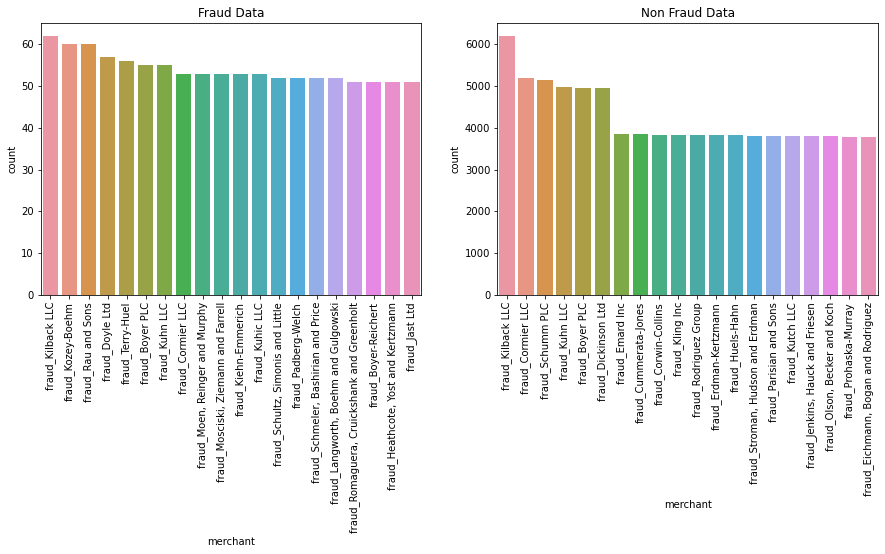

In [222]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['merchant'],order=df_fraud.merchant.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['merchant'],order=df_nonfraud.merchant.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    Frauds transactions are more for fraud_Kilback LLC, fraud_Rau and sons, fraud_Kozey.Boehm merchants. As shown in figure 
    fraud_Kilback LLC did 6000 cost transaction there is fraud of 60 and so on
    
    

### 15. Mean of Fraud and non Fraud Transactions

In [223]:
pd.concat(
[fraud_data['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.852394e+06                1.842743e+06   
1     mean              7.006357e+01                6.765128e+01   
2      std              1.592540e+02                1.535481e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.745000e+01                4.724000e+01   
5      95%              1.953400e+02                1.895900e+02   
6    99.9%              1.517241e+03                1.519623e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

<div class="alert alert-block alert-info">  
    
#### Inference:-
    Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount

    Mean of Non Fraud Transactions: 67.6
    Mean of Fraud Transactions: 531.3


### 16. Overall Amount Distribution 

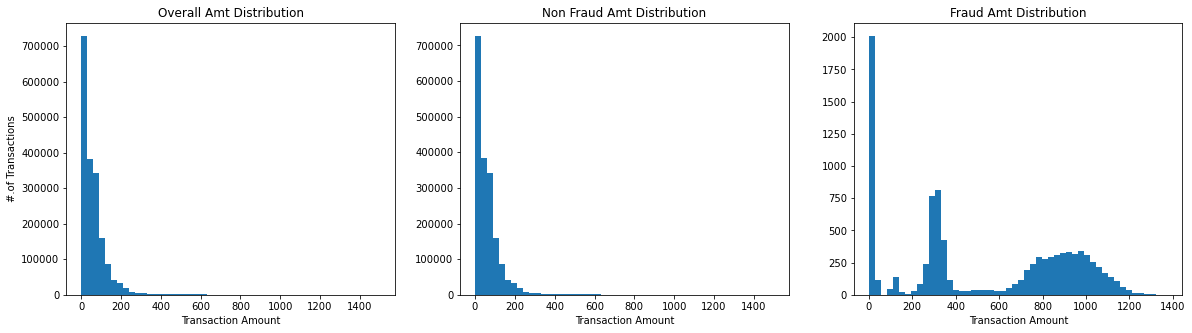

In [224]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(fraud_data[fraud_data['amt']<=1500]['amt'], bins=50)
ax[1].hist(fraud_data[(fraud_data['is_fraud']==0) & (fraud_data['amt']<=1500)]['amt'], bins=50)
ax[2].hist(fraud_data[(fraud_data['is_fraud']==1) & (fraud_data['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    overall amount distribution where fraud amount <=1500(whole data i.e fraud and non fraud data)
    non fraud amount distribution where fraud amount <=1500 and non_fraud data transactions have transaction approx to 600 
    fraud amount distibution where fraud amount <=1500 and fraud data transactions have transaction approximetly reaches to 1300 AS shown in the
                                                      figure.

### 17. Fraud Transactions in AMT

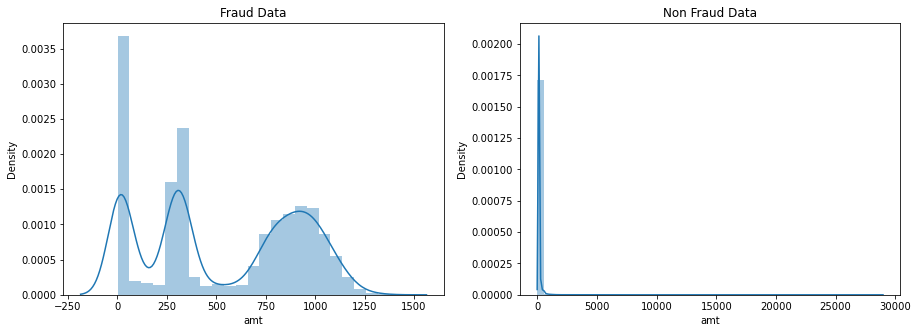

In [225]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['amt'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['amt'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- The amount of fraud_data deducted from account varies alot as shown in graph .

### 18. Fraud Transactions in city population

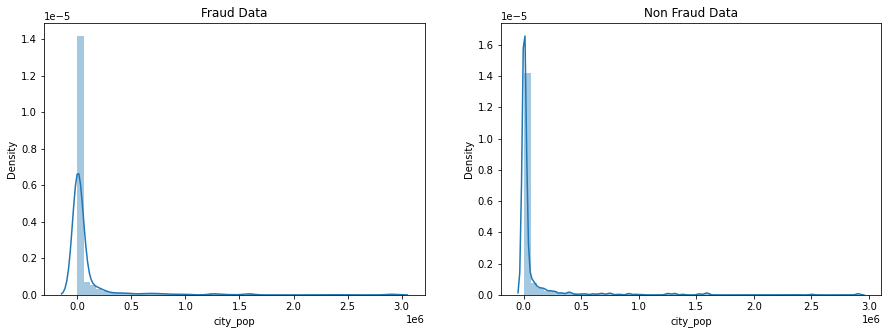

In [226]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['city_pop'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['city_pop'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- city_pop is same for fraud and non fraud data .

### 19.  Fraud Transactions in dist'

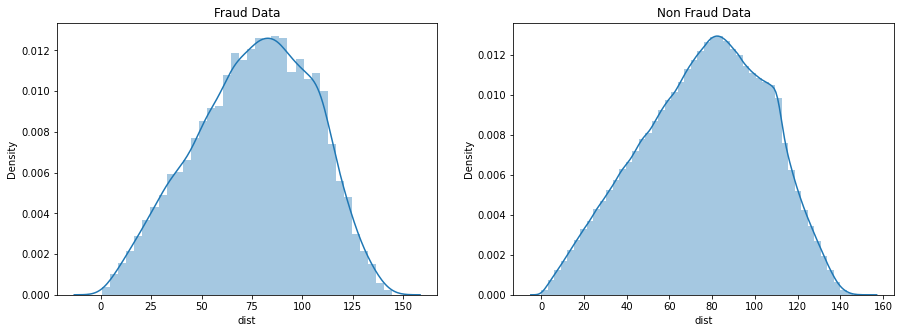

In [227]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['dist'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['dist'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Dist is same fror fraud_data and non fraud_data both 

### 20. Fraud Transactions in time_since_prev_transaction

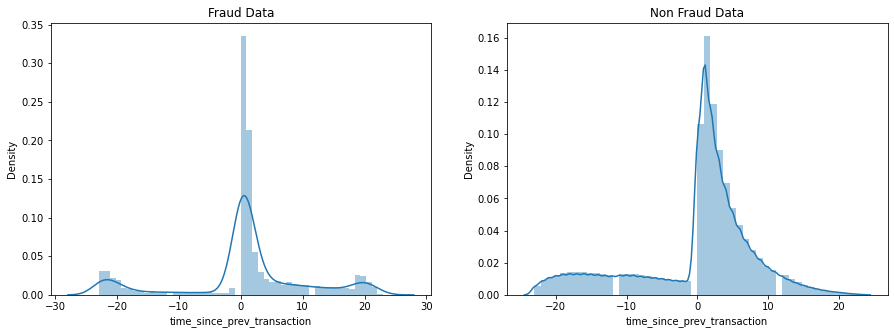

In [228]:

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['time_since_prev_transaction'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['time_since_prev_transaction'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- time_since_prev_transaction is also approximately behaving same in fraud_data and non fraud_data both .

### 21. Fraud Transactions in distance_between_merchants

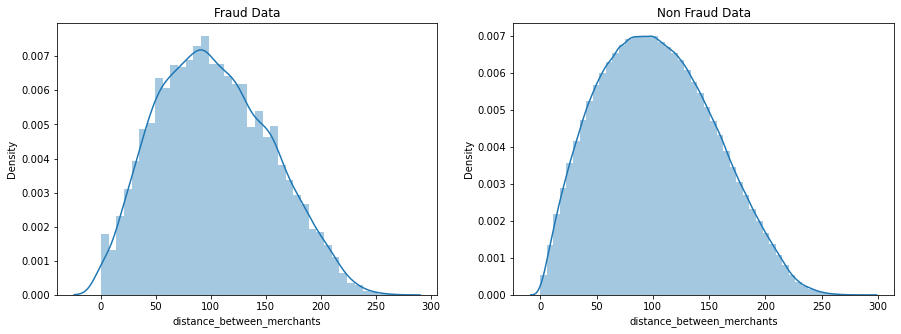

In [229]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['distance_between_merchants'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['distance_between_merchants'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- `distance_between_merchants` is also approximately behaving same in fraud_data and non fraud_data both .

### 22. Fraud Transactions in 30 Day Transactions by Customers

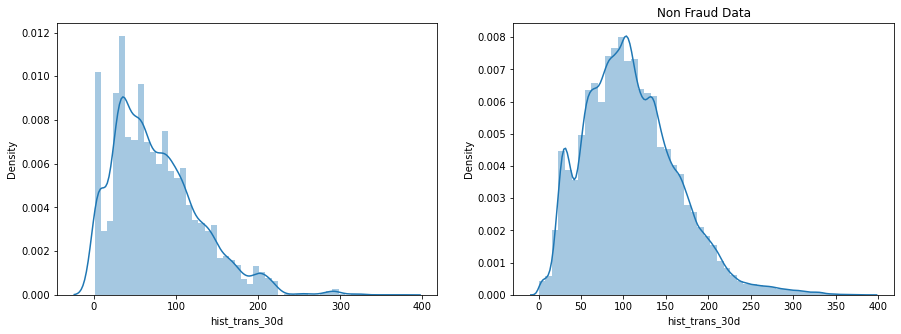

In [230]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_30d'])

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_30d'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- The moving average amount in Frauds Transcations are normally distributed as compared to non_fraud data .

### 23. Fraud Transactions in 30 Day Orders Amt Avg by Customers

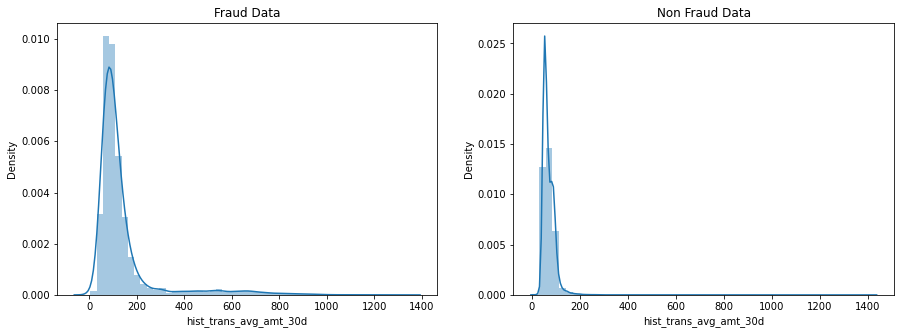

In [231]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_30d'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    Distribution of hist_trans_avg_amt_24h for fraud Transcations data spread is same  as compare to non fraud Transcations data.


### 24. Fraud Transactions in 24 hours Orders Amt Avg by Customers

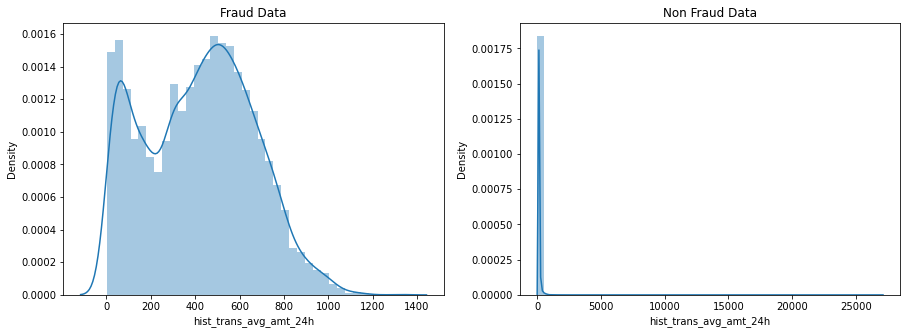

In [232]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_24h'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference: Distribution of hist_trans_avg_amt_24h for fraud Transcations data is widely spread and major frauds happen at lower amounts as compare to non fraud Transcations data.


### 25. Fraud Transactions based on category and amt 

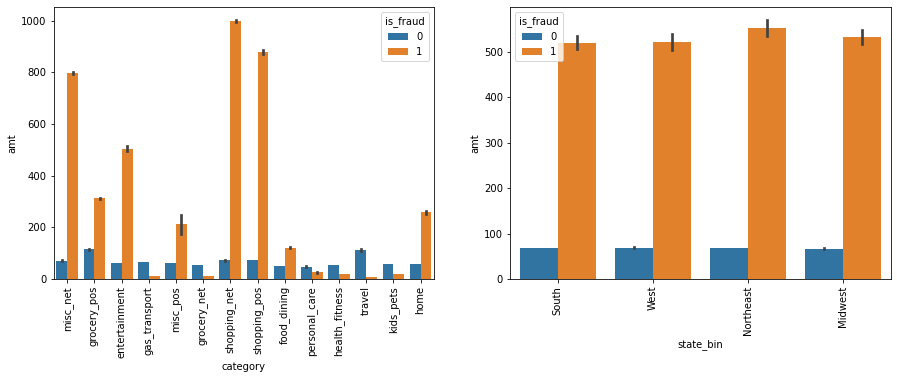

In [233]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
- The maximum amount spend for fruad transactions were on shopping_net, shopping_pos, misc_net category.
- The maximum amount spend for fruad transactions were at Northeast region.

### 26. Fraud Transactions based on state vs amt and trans_day vs amt

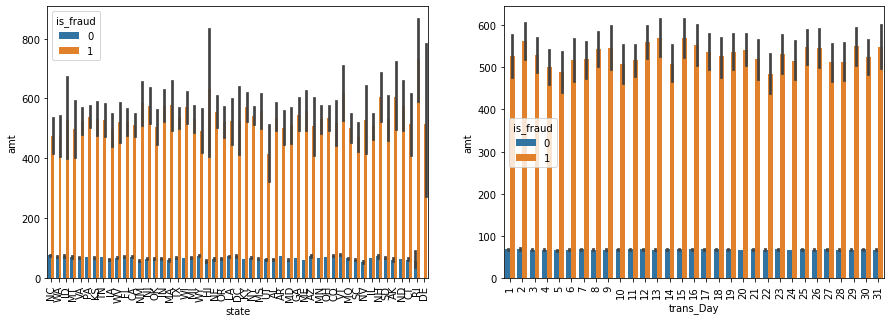

In [234]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were at RI, HI, DE and VT State.
    - The maximum amount spend for fruad transactions were 2nd , 13th , 15th , 31st day of a month 

### 27. Fraud Transactions based on age_bin vs amt , trans_year vs amt

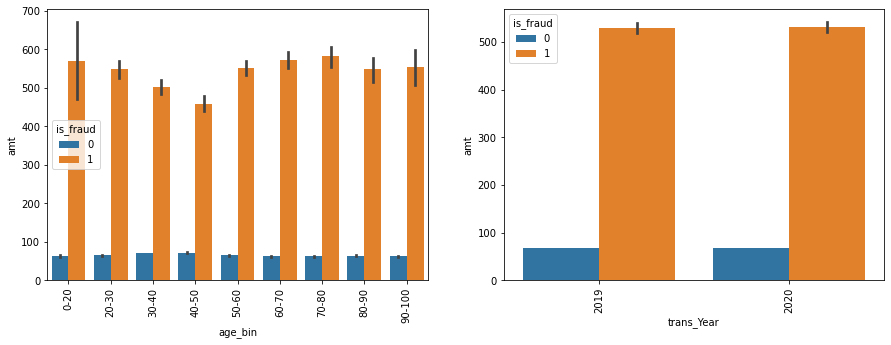

In [235]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='age_bin', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Year',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin.
    - The maximum amount spend for fruad transactions were same for both the years.

### 28. Fraud Transactions based on job , merchant with amt

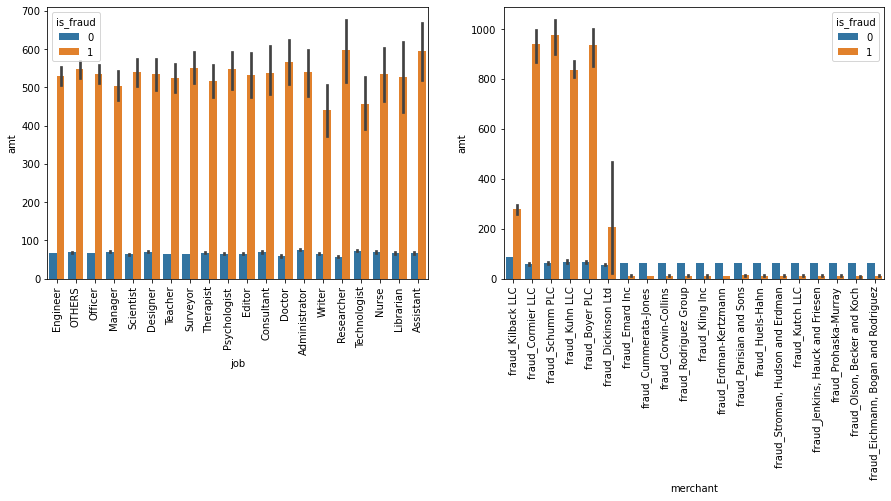

In [236]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=fraud_data,order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=fraud_data,order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were on job of credit card holders of Researcher, Assistant.
    - The maximum amount spend for fruad transactions were at 'fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC',
    'fraud_Kuhn LLC', 'fraud_Boyer PLC' and 'fraud_Dickinson Ltd' Merchant.

### 29. Fraud Transactions based on trans_hour , gender with amt

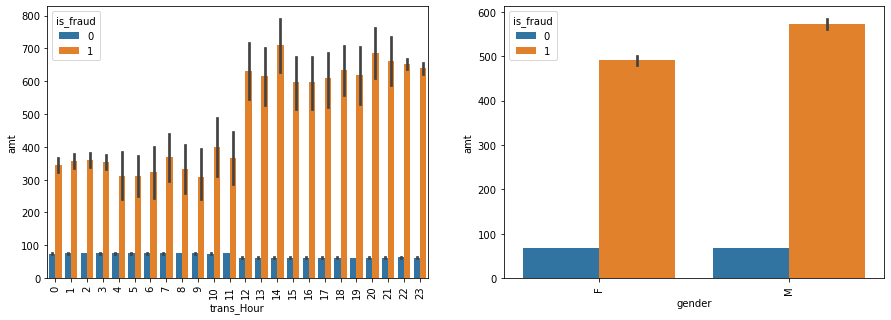

In [237]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
    - The maximum amount spend for fruad transactions were done on Male's Credit card Holders.

### 30. Fraud Transactions based on trans_month, trans_weekday with amt

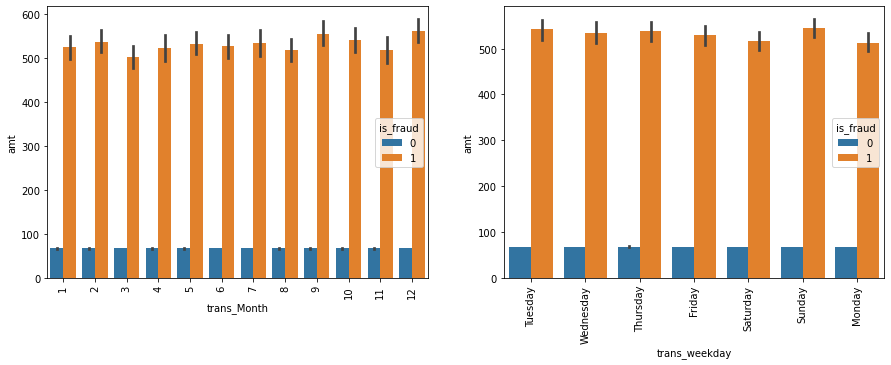

In [238]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Nearly same amount spend for fruad transactions were done through out the Month 
    - Nearly same amount spend for fruad transactions were done through out the Weekday.

### 31. Amount by percentage of transactions

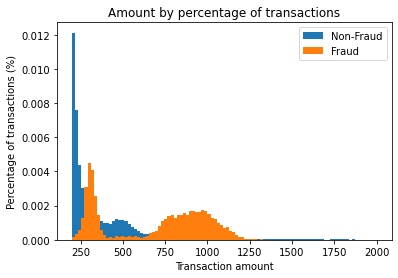

In [239]:
# Plot of high value transactions

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.amt, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.amt, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions (%)")
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 

- In between the graph, fraud transaction happened more frequently.

- It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

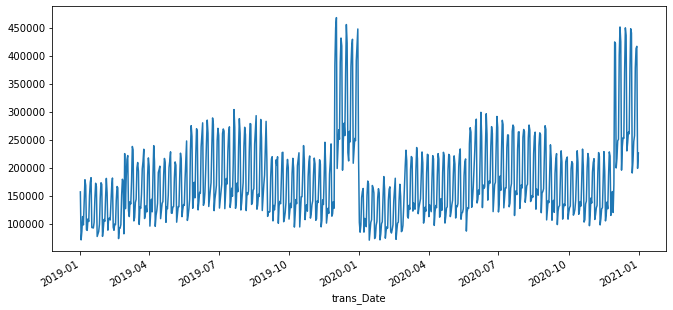

In [240]:
fraud_data.groupby('trans_Date')['amt'].sum().plot(figsize=[11,5])
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 

    - The maximum amount of fraud transactions majorly done at jan of 2020 ans 2021 , means at new year eve more frauded transactions done . 

### 32. Year Month vs Number of Transactions

In [241]:
df_timeline01 = fraud_data.groupby(fraud_data['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['trans_year_month','num_of_transactions','customers']
df_timeline01.head()

trans_year_month  num_of_transactions  customers
0          2019-01                52525        913
1          2019-02                49866        918
2          2019-03                70939        916
3          2019-04                68078        913
4          2019-05                72532        910

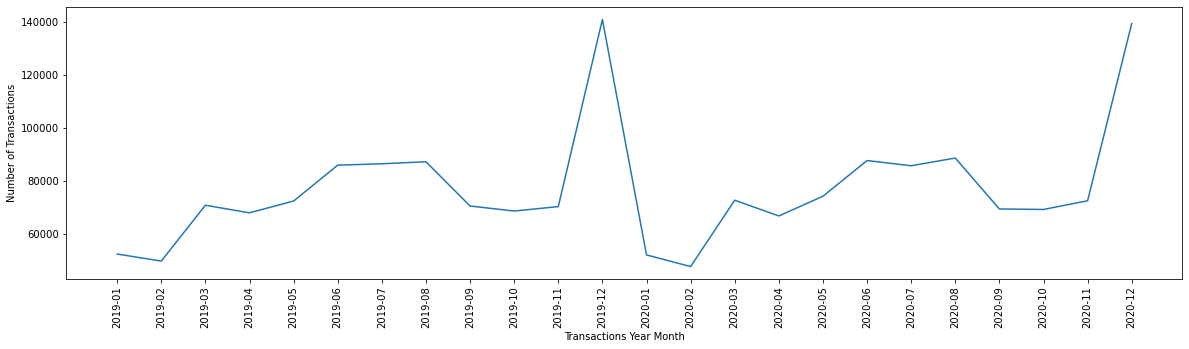

In [242]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Transactions')
plt.show()


<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of transactions done month wise and its shown in fig that it has increased at nov-dec month of 2020 and 2021, in rest of the months there are normal transactions 

### 33. Year Month vs Number of Customers Done the Transactions

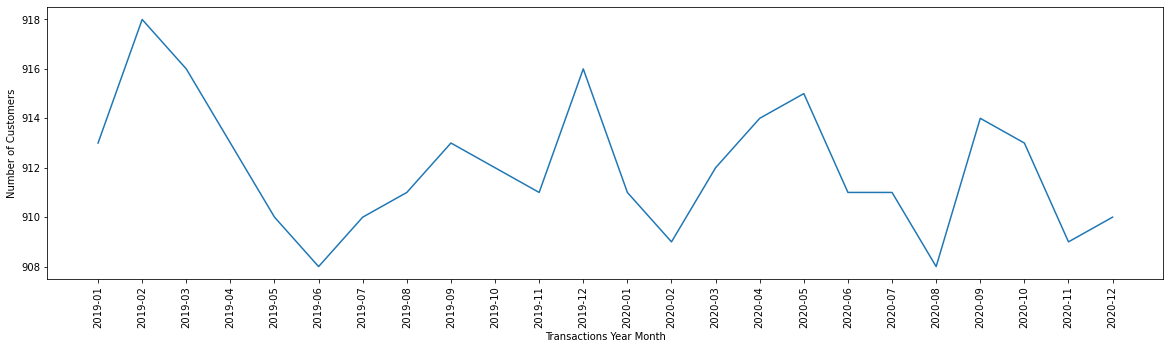

In [243]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Customers')
plt.show()


<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in august and december 2019 .
    - in 2020 may and sept month has higher number of customers who did non_fraud transactions. 


### Fraud Transactions

In [244]:
df_fraud_transactions = fraud_data[fraud_data['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

### 34. num_of_fraud_transactions

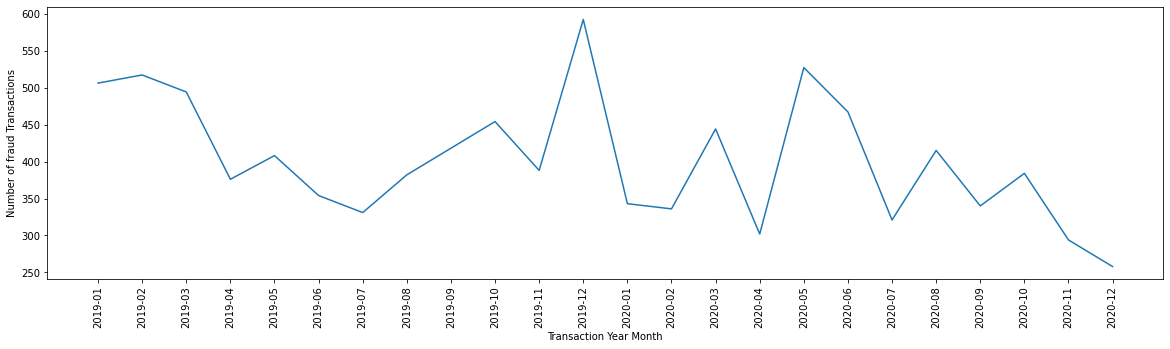

In [245]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of fraud transactions done month wise and its shown in fig that it has increased at jan- feb , nov-dec month of 2019 ,in rest of the months there are normal transactions 
    - in 2020 march , may , august , october months has a peak of fraud transactions as shown in figure

### 35. fraud_customers based on Transaction on month wise 

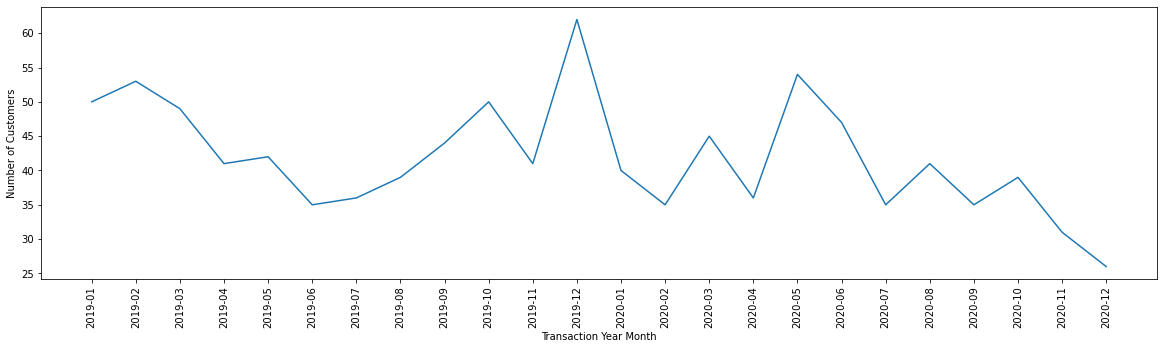

In [246]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of Customers')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of fraud customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in october and december months of 2019 .
    - in 2020 march and may, august , october months has higher number of fraud customers who did fraud transactions. 


### 36. Fraudulent transactions on amount 

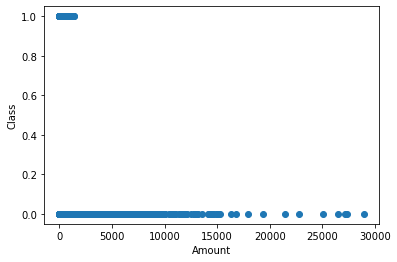

In [247]:
plt.scatter(fraud_data['amt'], fraud_data['is_fraud'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The above graph shows that fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions. 
    or The above graph shows that most of the fraudulent transactions are of very low amount

### 37. KDE plot to visualize the distribution of Amount for both the classes

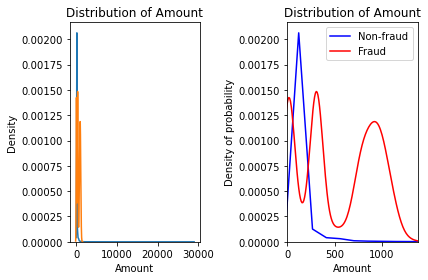

In [248]:
# 

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt'], label = 'Non Fraud')
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt'], label = 'Fraud')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

plt.subplot(1,2,2)
target_0 = fraud_data.loc[fraud_data['is_fraud'] == 0]
target_1 = fraud_data.loc[fraud_data['is_fraud'] == 1]
ax1=sns.distplot(target_0[['amt']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['amt']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
ax2.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.title('Distribution of Amount')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.

### 38. Time Distribution plot for transactions 

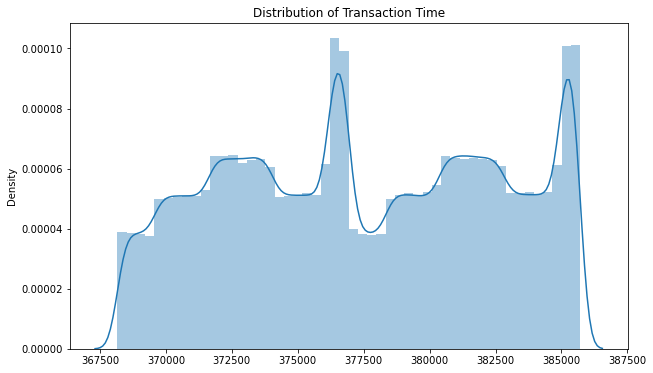

In [249]:
plt.title('Distribution of Transaction Time')
sns.distplot(fraud_data['unix_time'].values/(60*60))
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The coverage of Distribution of unix Time in hours is shown using the plots 

In [250]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

## 4.4 Cost benefit analysis

### 1. Average number of transactions per month

In [251]:
df.shape

(1852394, 4)

In [252]:
df= pd.pivot_table(data=fraud_data, values='trans_num', index=pd.Grouper(key='trans_Date', 
                                                    freq='1M'), columns='cc_num', aggfunc='count')
df.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                 56.0                 49.0                 28.0   
2019-02-28                 59.0                 60.0                 21.0   
2019-03-31                 86.0                 90.0                 30.0   
2019-04-30                102.0                 96.0                 21.0   
2019-05-31                 81.0                 91.0                 32.0   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                 24.0                 18.0                 39.0   
2019-02-28                 19.0                 19.0                 40.0   
2019-03-31                 30.0                 32.0                 59.0   
2019-04-30                 44.0                 25.0                 54.0   
2019-05-31                 26.0                 19.0                 57.0   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                 18.0                 60.0                  NaN   
2019-02-28                 18.0                 57.0                  NaN   
2019-03-31                 26.0                 93.0                  NaN   
2019-04-30                 23.0                 87.0                  NaN   
2019-05-31                 29.0                 74.0                  NaN   

cc_num      501828204849         501831082224         501851115094         \
trans_Date                                                                  
2019-01-31                 20.0                 48.0                  NaN   
2019-02-28                 20.0                 43.0                  NaN   
2019-03-31                 33.0                 48.0                 15.0   
2019-04-30                 28.0                 60.0                  NaN   
2019-05-31                 28.0                 72.0                  NaN   

cc_num      501882822387         501894933032         501899453424         \
trans_Date                                                                  
2019-01-31                 21.0                  NaN                 54.0   
2019-02-28                 20.0                  NaN                 55.0   
2019-03-31                 20.0                  NaN                 80.0   
2019-04-30                 27.0                  NaN                 80.0   
2019-05-31                 29.0                  NaN                 92.0   

cc_num      502012776709         502038091380         502049568400         \
trans_Date                                                                  
2019-01-31                 76.0                 54.0                 50.0   
2019-02-28                 82.0                 67.0                 39.0   
2019-03-31                102.0                 91.0                 67.0   
2019-04-30                 82.0                 82.0                 51.0   
2019-05-31                110.0                 92.0                 49.0   

cc_num      503848303379         503851367360         503874407318         \
trans_Date                                                                  
2019-01-31                 64.0                  NaN                110.0   
2019-02-28                 70.0                  NaN                 97.0   
2019-03-31                102.0                  NaN                134.0   
2019-04-30                 90.0                  NaN                131.0   
2019-05-31                 91.0                  NaN                121.0   

cc_num      503886119844         560881134780         561942763351         \
trans_Date                                                                  
2019-01-31                  NaN                 15.0              

In [253]:
df.shape

(24, 999)

In [254]:
mean_per_month =df.sum(axis=1)
mean_per_month

trans_Date
2019-01-31     52525.0
2019-02-28     49866.0
2019-03-31     70939.0
2019-04-30     68078.0
2019-05-31     72532.0
2019-06-30     86064.0
2019-07-31     86596.0
2019-08-31     87359.0
2019-09-30     70652.0
2019-10-31     68758.0
2019-11-30     70421.0
2019-12-31    141060.0
2020-01-31     52202.0
2020-02-29     47791.0
2020-03-31     72850.0
2020-04-30     66892.0
2020-05-31     74343.0
2020-06-30     87805.0
2020-07-31     85848.0
2020-08-31     88759.0
2020-09-30     69533.0
2020-10-31     69348.0
2020-11-30     72635.0
2020-12-31    139538.0
Freq: M, dtype: float64

In [255]:
total=mean_per_month.sum(axis=0)
total

1852394.0

In [256]:
Average_number_of_transactions_per_month= total/24

In [257]:
Average_number_of_transactions_per_month

77183.08333333333

#### Another way for calculating Average_number_of_transactions_per_month

In [258]:
fraud_data.shape

(1852394, 40)

In [259]:
Average_number_of_transactions_per_month= fraud_data.shape[0]/24
Average_number_of_transactions_per_month

77183.08333333333

### 2. Average number of fraudulent transaction per month

In [260]:
fraudulent_transactions= fraud_data[fraud_data["is_fraud"]==1]

In [261]:
df1= pd.pivot_table(data=fraudulent_transactions, values='trans_num', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='count')
df1.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  9.0                  NaN                 10.0   
2019-04-30                  NaN                 12.0                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                 14.0                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501828204849         501831082224         501851115094         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                 15.0   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501882822387         501894933032         501899453424         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  8.0   

cc_num      502012776709         502038091380         502049568400         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      503848303379         503851367360         503874407318         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                 12.0                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      503886119844         560881134780         561942763351         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN              

In [262]:
df1.count(axis=1)

trans_Date
2019-01-31    50
2019-02-28    53
2019-03-31    49
2019-04-30    41
2019-05-31    42
2019-06-30    35
2019-07-31    36
2019-08-31    39
2019-09-30    44
2019-10-31    50
2019-11-30    41
2019-12-31    62
2020-01-31    40
2020-02-29    35
2020-03-31    45
2020-04-30    36
2020-05-31    54
2020-06-30    47
2020-07-31    35
2020-08-31    41
2020-09-30    35
2020-10-31    39
2020-11-30    31
2020-12-31    26
Freq: M, dtype: int64

In [263]:
mean_per_month =df1.sum(axis=1)
mean_per_month

trans_Date
2019-01-31    506.0
2019-02-28    517.0
2019-03-31    494.0
2019-04-30    376.0
2019-05-31    408.0
2019-06-30    354.0
2019-07-31    331.0
2019-08-31    382.0
2019-09-30    418.0
2019-10-31    454.0
2019-11-30    388.0
2019-12-31    592.0
2020-01-31    343.0
2020-02-29    336.0
2020-03-31    444.0
2020-04-30    302.0
2020-05-31    527.0
2020-06-30    467.0
2020-07-31    321.0
2020-08-31    415.0
2020-09-30    340.0
2020-10-31    384.0
2020-11-30    294.0
2020-12-31    258.0
Freq: M, dtype: float64

In [264]:
total=mean_per_month.sum(axis=0)
total

9651.0

In [265]:
Average_number_of_fraud_transactions_per_month= total/24

In [266]:
Average_number_of_fraud_transactions_per_month

402.125

#### Another way for calculating Average_number_of_fraud_transactions_per_month

In [267]:
fraudulent_transactions.shape

(9651, 40)

In [268]:
Average_number_of_fraud_transactions_per_month= fraudulent_transactions.shape[0]/24
Average_number_of_fraud_transactions_per_month

402.125

### 3.  Average amount per fraud transaction

In [269]:
fraudulent_transactions.head(2)

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   

           category     amt gender                     street           city  \
2449    grocery_pos  281.06      M  542 Steve Curve Suite 011  Collettsville   
2472  gas_transport   11.52      F  27954 Hall Mill Suite 575    San Antonio   

     state    zip      lat     long  city_pop         job        dob  \
2449    NC  28611  35.9946 -81.7266       885   Scientist 1988-09-15   
2472    TX  78208  29.4400 -98.4590   1595797  Consultant 1960-10-28   

                             trans_num   unix_time  merch_lat  merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   

      is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
2449         1 2019-01-02   01:06:37     South   34   30-40        2019   
2472         1 2019-01-02   01:47:29      West   62   60-70        2019   

     trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday  \
2449          2019-01            1           1          2     Wednesday   
2472          2019-01            1           1          2     Wednesday   

       dist  prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
2449  68.95       35.773439       -80.895816                        -11.0   
2472  78.41       29.819364       -99.142791                          0.0   

      distance_between_merchants  hist_trans_30d  hist_trans_24h  \
2449                       77.34             1.0             1.0   
2472                        0.00           113.0             4.0   

      hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
2449               71.030000                 71.0300  
2472               63.897522                101.4975

In [270]:
fraudulent_transactions.shape

(9651, 40)

In [271]:
df2= pd.pivot_table(data=fraudulent_transactions, values='amt', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='sum')
df2.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31              1899.73                  NaN              4598.08   
2019-04-30                  NaN              7500.18                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30              9645.79                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501828204849         501831082224         501851115094         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN              6467.81   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501882822387         501894933032         501899453424         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN              3217.94   

cc_num      502012776709         502038091380         502049568400         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      503848303379         503851367360         503874407318         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28              8865.21                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      503886119844         560881134780         561942763351         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN              

In [272]:
sum_per_month =df2.sum(axis=1)
sum_per_month

trans_Date
2019-01-31    261780.38
2019-02-28    274051.08
2019-03-31    237637.59
2019-04-30    202067.29
2019-05-31    210549.11
2019-06-30    178204.60
2019-07-31    188701.59
2019-08-31    203951.13
2019-09-30    217675.37
2019-10-31    257739.72
2019-11-30    200307.47
2019-12-31    335157.54
2020-01-31    182595.36
2020-02-29    183950.11
2020-03-31    234090.10
2020-04-30    152173.98
2020-05-31    287226.38
2020-06-30    253504.74
2020-07-31    158669.49
2020-08-31    208785.43
2020-09-30    202700.99
2020-10-31    195572.97
2020-11-30    153182.19
2020-12-31    141138.68
Freq: M, dtype: float64

In [273]:
total=sum_per_month.sum(axis=0)
total

5121413.289999999

In [274]:
Average_amount_per_fraud_transaction= total/9651

In [275]:
Average_amount_per_fraud_transaction

530.6614122888819

#### Another way for calculating Average_amount_per_fraud_transaction

In [276]:
fraudulent_transactions.shape

(9651, 40)

In [277]:
amount_total=fraudulent_transactions['amt'].sum()
amount_total

5121413.290000001

In [278]:
Average_amount_per_fraud_transaction= amount_total/fraudulent_transactions.shape[0]
Average_amount_per_fraud_transaction

530.661412288882

In [279]:
fraudulent_transactions.pivot_table(index='trans_year_month',values='amt',aggfunc='mean').describe()

amt
count   24.000000
mean   530.415010
std     26.948415
min    481.047753
25%    514.364957
50%    528.654707
75%    545.528482
max    596.179382

<div class="alert alert-block alert-success">
    
###                           Cost Benefit Analysis(Part 1)
          Questions                                           Answer
    1. Average number of transactions per month            77183.0833333333
    2. Average number of fraudulent transaction per month  402.125
    3. Average amount per fraud transaction                530.6614122888819
        

In [280]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_Date', 'trans_Time', 'state_bin', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [281]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

In [282]:
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip      lat  \
0                      561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2            594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                               ...             ...   ...    ...      ...   
1852389           558 Michael Estates           Luray    MO  63453  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

             long  city_pop             job        dob  \
0        -81.1781      3495    Psychologist 1988-03-09   
1       -118.2105       149         Teacher 1978-06-21   
2       -112.2620      4154         Officer 1962-01-19   
3       -112.1138      1939          OTHERS 1967-01-12   
4        -79.4629        99       Therapist 1986-03-28   
...           ...       ...             ...        ...   
1852389  -91.8912       519    Town planner 1966-02-13   
1852390  -95.4401     28739  Futures trader 1999-12-27   
1852391 -118.9017      3684        Musician 1981-11-29   
1852392 -116.4493       129          OTHERS 1965-12-15   
1852393  -97.4798    116001           Buyer 1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
1852392  143

### Step 5: Preparing the data for modelling

In [283]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_Date', 'trans_Time', 'state_bin', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [284]:
fraud_data.shape

(1852394, 40)

### check correlations 

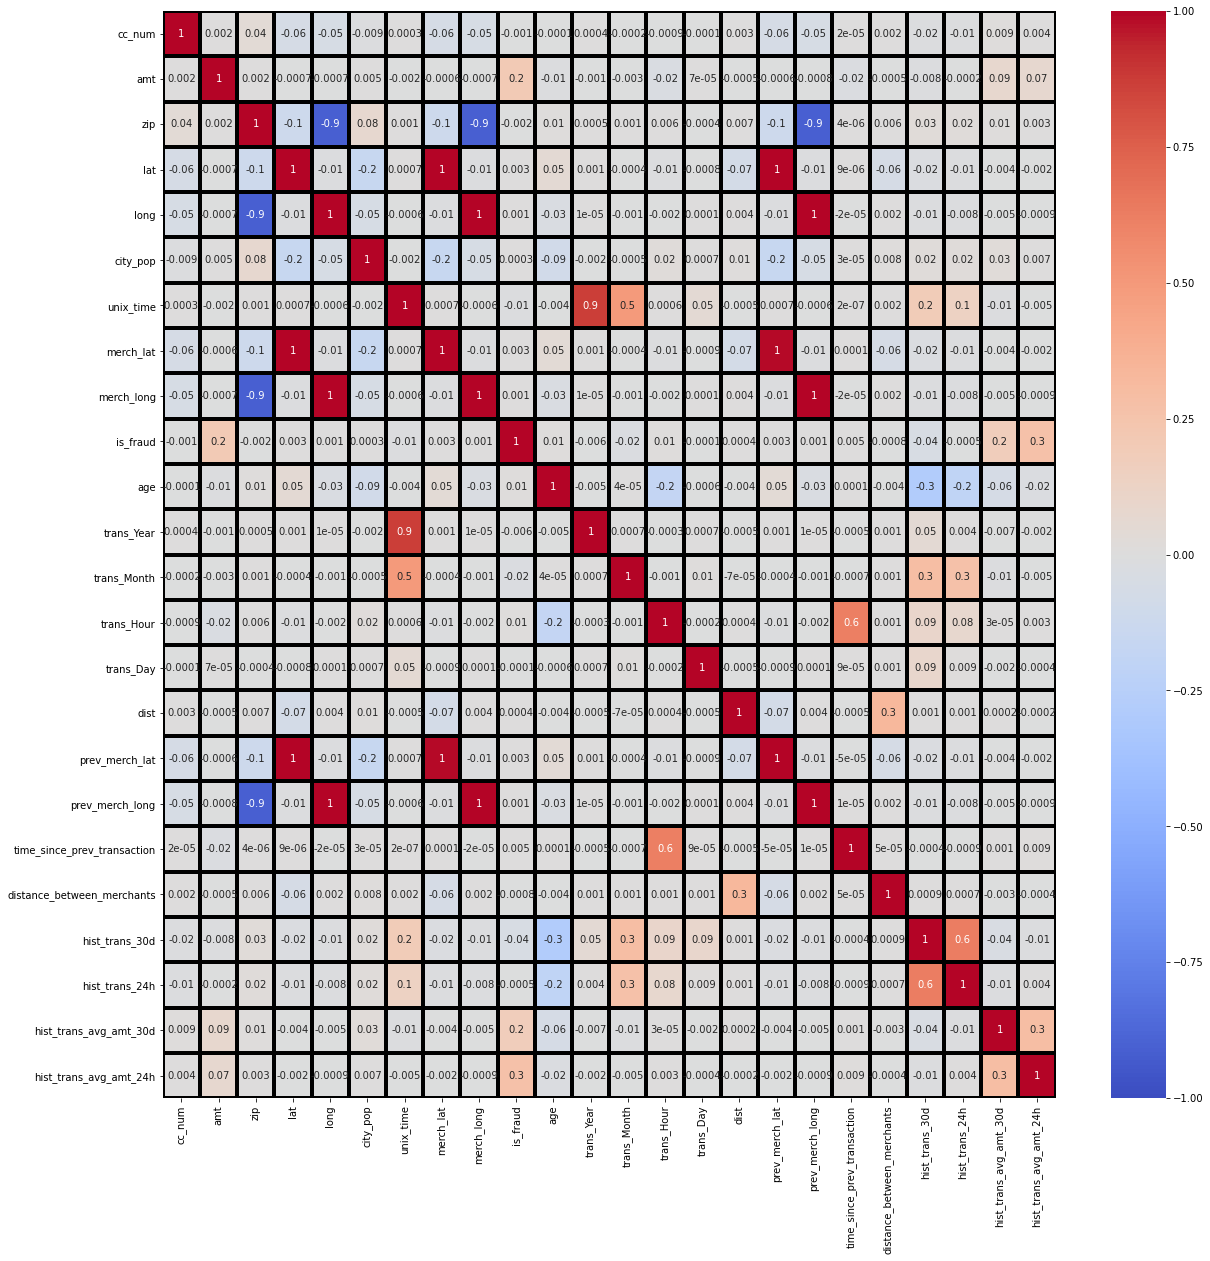

In [285]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_data.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black',cmap= 'coolwarm')
plt.show()

- the variables whose correlation more than 0.7 is taken as high correlated value and will drop them 

### Drop columns whhho has high correlation values 

In [286]:
fraud_data= fraud_data.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
fraud_data= fraud_data.drop(['age_bin','trans_Date','unix_time', 'trans_Day','trans_year_month'],axis=1)
fraud_data= fraud_data.drop(['trans_Time','trans_date_trans_time','dob', 'state_bin'],axis=1)

fraud_data.shape

(1852394, 26)

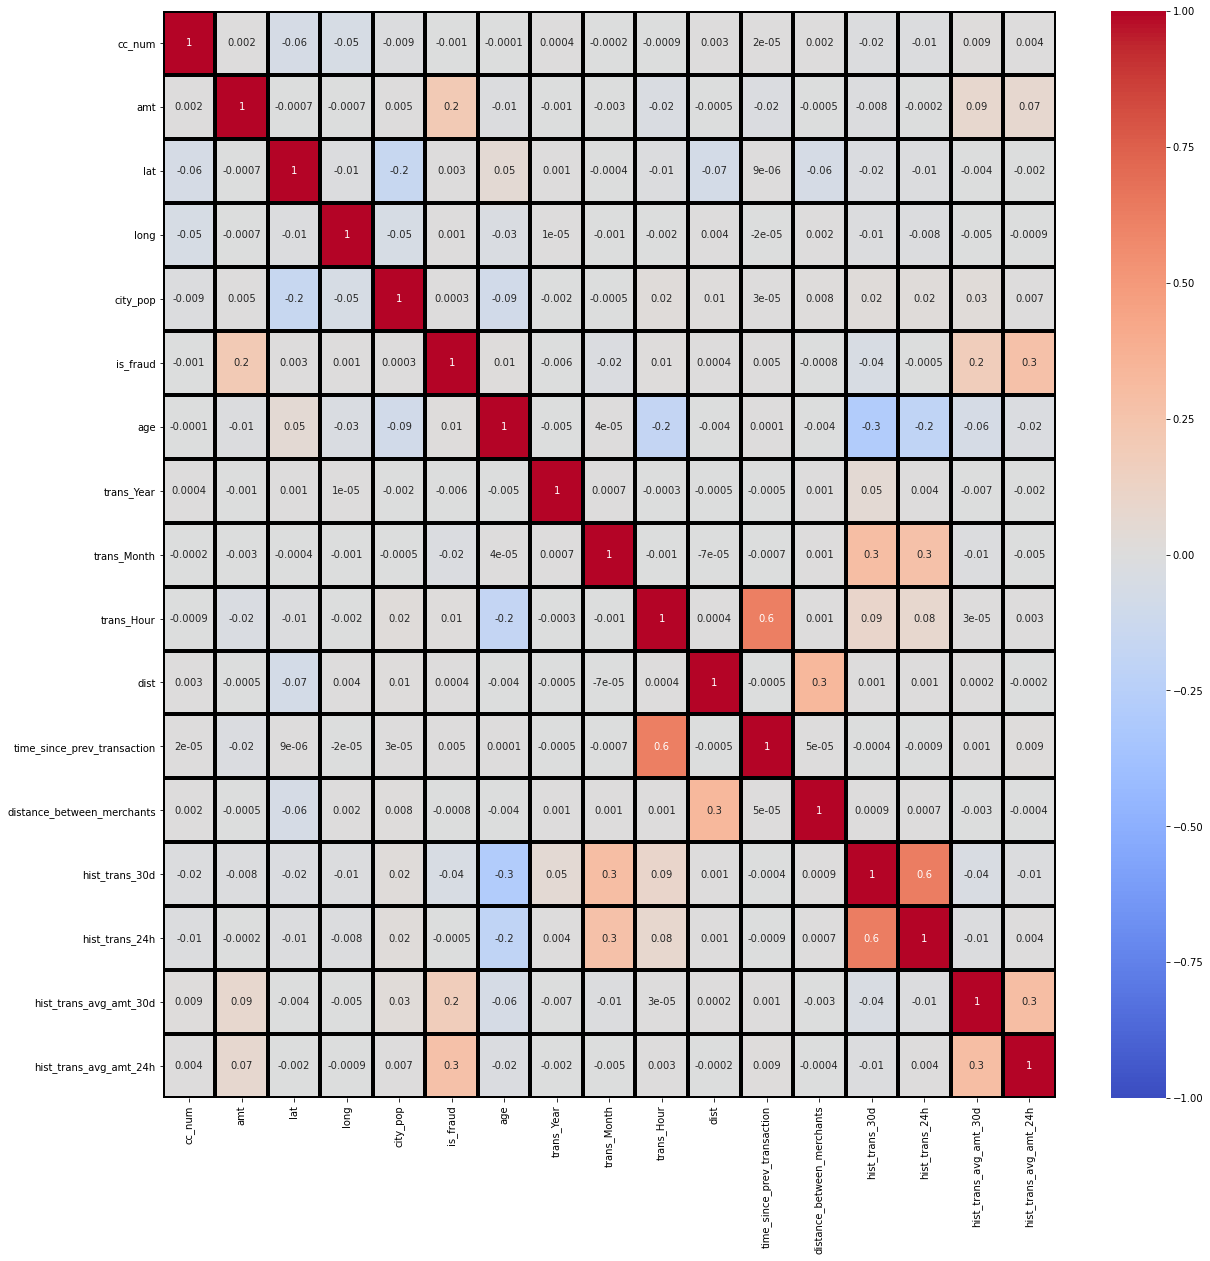

In [287]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_data.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black',cmap= 'coolwarm')
plt.show()

In [288]:
fraud_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud',
       'age', 'trans_Year', 'trans_Month', 'trans_Hour', 'trans_weekday',
       'dist', 'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [289]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   street                       object 
 6   city                         object 
 7   state                        object 
 8   lat                          float64
 9   long                         float64
 10  city_pop                     int64  
 11  job                          object 
 12  trans_num                    object 
 13  is_fraud                     int64  
 14  age                          int64  
 15  trans_Year                   int64  
 16  trans_Month                  int64  
 17  trans_Hour                   int64  
 18  trans_weekday                object 
 19  

### Dummy creation

In [290]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(fraud_data['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(fraud_data['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(fraud_data['trans_weekday'], drop_first=True, prefix='weekday')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(fraud_data['trans_Month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(fraud_data['trans_Year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
fraud_data = pd.concat([fraud_data, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
fraud_data= fraud_data.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
fraud_data.shape

(1852394, 53)

In [291]:
fraud_data

cc_num                            merchant     amt  \
0        2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1            630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2          38859492057661                fraud_Lind-Buckridge  220.11   
3        3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4         375534208663984                 fraud_Keeling-Crist   41.96   
...                   ...                                 ...     ...   
1852389    30560609640617               fraud_Reilly and Sons   43.77   
1852390  3556613125071656                fraud_Hoppe-Parisian  111.84   
1852391  6011724471098086                     fraud_Rau-Robel   86.88   
1852392     4079773899158               fraud_Breitenberg LLC    7.99   
1852393  4170689372027579                   fraud_Dare-Marvin   38.13   

                               street            city state      lat  \
0                      561 Perry Cove  Moravian Falls    NC  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  48.8878   
2            594 White Dale Suite 530      Malad City    ID  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  38.4207   
...                               ...             ...   ...      ...   
1852389           558 Michael Estates           Luray    MO  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  35.6665   

             long  city_pop             job                         trans_num  \
0        -81.1781      3495    Psychologist  0b242abb623afc578575680df30655b9   
1       -118.2105       149         Teacher  1f76529f8574734946361c461b024d99   
2       -112.2620      4154         Officer  a1a22d70485983eac12b5b88dad1cf95   
3       -112.1138      1939          OTHERS  6b849c168bdad6f867558c3793159a81   
4        -79.4629        99       Therapist  a41d7549acf90789359a9aa5346dcb46   
...           ...       ...             ...                               ...   
1852389  -91.8912       519    Town planner  9b1f753c79894c9f4b71f04581835ada   
1852390  -95.4401     28739  Futures trader  2090647dac2c89a1d86c514c427f5b91   
1852391 -118.9017      3684        Musician  6c5b7c8add471975aa0fec023b2e8408   
1852392 -116.4493       129          OTHERS  14392d723bb7737606b2700ac791b7aa   
1852393  -97.4798    116001           Buyer  1765bb45b3aa3224b4cdcb6e7a96cee3   

         is_fraud  age  trans_Hour    dist  time_since_prev_transaction  \
0               0   34           0   78.60                          0.0   
1               0   44           0   30.21                          0.0   
2               0   60           0  108.21                          0.0   
3               0   55           0   95.67                          0.0   
4               0   36           0   77.56                          0.0   
...           ...  ...         ...     ...                          ...   
1852389         0   56          23   77.03                          4.0   
1852390         0   23          23  100.07                          2.0   
1852391         0   41          23   80.76                          0.0   
1852392         0   57          23   52.93                          3.0   
1852393         0   29          23   72.44                          1.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                              0.00           109.0             6.0   
1                              0.00            53.0             1.0   
2                              0.00             8.0             5.0   
3                              0.00           181.0             5.0   
4                              0.00           21

<div class="alert alert-block alert-info">   

#### Inference:-
    - Curse of Dimensionality: - As we can see that we have lots of variables with more unique values. We can see that city had 906 distinct values which would make the higher number of features. For a feature with 3 levels we might be ok, but for a feature like "city" are introducing 900+ column into a original data set. By doing this we make the dataset triple the size of the dataset, and this spells trouble for machine learning due to "the curse of dimensionality".
   #### - So use Label encoding
        Label encoding is simply converting each value in a column to a number. We can see that categorical variables in our dataset has numbers. Therefore it might already been converted to label encoding. 
        For e.g. we have '0', '1', '2' representing different classes of some car related concepts like 'FWD', 'RWD', '4WD' for drive types. It is a nice way to represent information that is not in numeric format - since most ML algorthims prefer number over string. 

#### Label Enconding

In [292]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
fraud_data['state']= label_encoder.fit_transform(fraud_data['state']) 
fraud_data['job']= label_encoder.fit_transform(fraud_data['job']) 
fraud_data['merchant']= label_encoder.fit_transform(fraud_data['merchant'])
fraud_data['city']= label_encoder.fit_transform(fraud_data['city'])
fraud_data['street']= label_encoder.fit_transform(fraud_data['street'])

In [293]:
fraud_data

cc_num  merchant     amt  street  city  state      lat  \
0        2703186189652095       514    4.97     576   532     27  36.0788   
1            630423337322       241  107.23     439   619     47  48.8878   
2          38859492057661       390  220.11     610   474     13  42.1808   
3        3534093764340240       360   45.00     945    84     26  46.2306   
4         375534208663984       297   41.96     422   217     45  38.4207   
...                   ...       ...     ...     ...   ...    ...      ...   
1852389    30560609640617       507   43.77     573   471     24  40.4931   
1852390  3556613125071656       264  111.84     583   427     43  29.0393   
1852391  6011724471098086       496   86.88     138   110     47  46.1966   
1852392     4079773899158        75    7.99     711   508     13  44.6255   
1852393  4170689372027579       125   38.13     838   239     36  35.6665   

             long  city_pop  job                         trans_num  is_fraud  \
0        -81.1781      3495   70  0b242abb623afc578575680df30655b9         0   
1       -118.2105       149   82  1f76529f8574734946361c461b024d99         0   
2       -112.2620      4154   61  a1a22d70485983eac12b5b88dad1cf95         0   
3       -112.1138      1939   59  6b849c168bdad6f867558c3793159a81         0   
4        -79.4629        99   86  a41d7549acf90789359a9aa5346dcb46         0   
...           ...       ...  ...                               ...       ...   
1852389  -91.8912       519   87  9b1f753c79894c9f4b71f04581835ada         0   
1852390  -95.4401     28739   37  2090647dac2c89a1d86c514c427f5b91         0   
1852391 -118.9017      3684   56  6c5b7c8add471975aa0fec023b2e8408         0   
1852392 -116.4493       129   59  14392d723bb7737606b2700ac791b7aa         0   
1852393  -97.4798    116001   11  1765bb45b3aa3224b4cdcb6e7a96cee3         0   

         age  trans_Hour    dist  time_since_prev_transaction  \
0         34           0   78.60                          0.0   
1         44           0   30.21                          0.0   
2         60           0  108.21                          0.0   
3         55           0   95.67                          0.0   
4         36           0   77.56                          0.0   
...      ...         ...     ...                          ...   
1852389   56          23   77.03                          4.0   
1852390   23          23  100.07                          2.0   
1852391   41          23   80.76                          0.0   
1852392   57          23   52.93                          3.0   
1852393   29          23   72.44                          1.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                              0.00           109.0             6.0   
1                              0.00            53.0             1.0   
2                              0.00             8.0             5.0   
3                              0.00           181.0             5.0   
4                              0.00           218.0             6.0   
...                             ...             ...             ...   
1852389                       52.76           169.0             4.0   
1852390                      153.84           273.0             8.0   
1852391                      105.53           277.0             8.0   
1852392                      100.23           194.0             3.0   
1852393                       98.91           286.0            10.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
0                     70.974587               95.641667                 0   
1                     50.883962               12.110000                 0   
2                    377.925000              445.778000                 0   
3                     59.307403               42.454000                 0   
4                     67.148991               78.120000                 0   
...                         ...      

In [294]:
fraud_data.columns

Index(['cc_num', 'merchant', 'amt', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'is_fraud', 'age', 'trans_Hour', 'dist',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h', 'catg_food_dining', 'catg_gas_transport',
       'catg_grocery_net', 'catg_grocery_pos', 'catg_health_fitness',
       'catg_home', 'catg_kids_pets', 'catg_misc_net', 'catg_misc_pos',
       'catg_personal_care', 'catg_shopping_net', 'catg_shopping_pos',
       'catg_travel', 'gender_M', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'year_2020'],
      dtype='object')

In [295]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   amt                          float64
 3   street                       int64  
 4   city                         int64  
 5   state                        int64  
 6   lat                          float64
 7   long                         float64
 8   city_pop                     int64  
 9   job                          int64  
 10  trans_num                    object 
 11  is_fraud                     int64  
 12  age                          int64  
 13  trans_Hour                   int64  
 14  dist                         float64
 15  time_since_prev_transaction  float64
 16  distance_between_merchants   float64
 17  hist_trans_30d               float64
 18  hist_trans_24h               float64
 19  

### 5.1) Splitting the Data  into X & y

In [296]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = fraud_data.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = fraud_data['is_fraud']

In [297]:
X

merchant     amt  street  city  state      lat      long  city_pop  \
0             514    4.97     576   532     27  36.0788  -81.1781      3495   
1             241  107.23     439   619     47  48.8878 -118.2105       149   
2             390  220.11     610   474     13  42.1808 -112.2620      4154   
3             360   45.00     945    84     26  46.2306 -112.1138      1939   
4             297   41.96     422   217     45  38.4207  -79.4629        99   
...           ...     ...     ...   ...    ...      ...       ...       ...   
1852389       507   43.77     573   471     24  40.4931  -91.8912       519   
1852390       264  111.84     583   427     43  29.0393  -95.4401     28739   
1852391       496   86.88     138   110     47  46.1966 -118.9017      3684   
1852392        75    7.99     711   508     13  44.6255 -116.4493       129   
1852393       125   38.13     838   239     36  35.6665  -97.4798    116001   

         job  age  trans_Hour    dist  time_since_prev_transaction  \
0         70   34           0   78.60                          0.0   
1         82   44           0   30.21                          0.0   
2         61   60           0  108.21                          0.0   
3         59   55           0   95.67                          0.0   
4         86   36           0   77.56                          0.0   
...      ...  ...         ...     ...                          ...   
1852389   87   56          23   77.03                          4.0   
1852390   37   23          23  100.07                          2.0   
1852391   56   41          23   80.76                          0.0   
1852392   59   57          23   52.93                          3.0   
1852393   11   29          23   72.44                          1.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                              0.00           109.0             6.0   
1                              0.00            53.0             1.0   
2                              0.00             8.0             5.0   
3                              0.00           181.0             5.0   
4                              0.00           218.0             6.0   
...                             ...             ...             ...   
1852389                       52.76           169.0             4.0   
1852390                      153.84           273.0             8.0   
1852391                      105.53           277.0             8.0   
1852392                      100.23           194.0             3.0   
1852393                       98.91           286.0            10.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
0                     70.974587               95.641667                 0   
1                     50.883962               12.110000                 0   
2                    377.925000              445.778000                 0   
3                     59.307403               42.454000                 0   
4                     67.148991               78.120000                 0   
...                         ...                     ...               ...   
1852389               68.179645               66.842500                 0   
1852390               47.197802               50.592500                 0   
1852391               89.307509               94.298750                 0   
1852392               57.936237               71.220000                 0   
1852393               46.185594               24.518000                 0   

         catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
0                         0                 0                 0   
1                         0                 0                 1   
2                         0                 0                 0   
3                         1                 0                 0   
4                         0                 0                 0   
...                     ...            

In [298]:
X.shape, y.shape

((1852394, 50), (1852394,))

### 5.2) Test-Train Split

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 50)
y_train:  (1296675,)
X_test:  (555719, 50)
y_test:  (555719,)


In [300]:
X_train

merchant     amt  street  city  state      lat     long  city_pop  \
1489446       415  108.23     952   811     18  30.5668 -90.4820      8512   
887864        155   60.29     782   580     14  39.3036 -89.2853      3458   
115189        384    9.81     866   421     34  43.2363 -78.3138       275   
108605         30   27.15     613   730     23  44.9913 -92.9487    753116   
67953         222  234.47     164   352     35  41.2419 -81.7453      7646   
...           ...     ...     ...   ...    ...      ...      ...       ...   
1003268       235  434.59     675   371      1  34.7789 -86.5438    190178   
1088777       381   96.75     608   733     43  29.3641 -98.4924   1595797   
1529779        28   18.68     181   815     48  45.4963 -89.7273      9594   
1217915       546   11.44      35   542     24  40.1362 -95.2138      1631   
1433227       229   69.01     307   353     46  44.3346 -73.0980      4542   

         job  age  trans_Hour    dist  time_since_prev_transaction  \
1489446   12   71           1   38.49                        -12.0   
887864    79   37          15   60.15                          4.0   
115189    82   58           9   56.59                          9.0   
108605    61   51          15   64.12                          7.0   
67953     51   34           5   65.38                          4.0   
...      ...  ...         ...     ...                          ...   
1003268    6   49           5   24.52                        -15.0   
1088777   59   27           0   83.40                        -22.0   
1529779   59   25          13   58.08                         12.0   
1217915   59   69          16  115.15                         12.0   
1433227   16   24           9   83.38                          9.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
1489446                      121.45            73.0             1.0   
887864                        43.18            57.0             2.0   
115189                        35.49            25.0             4.0   
108605                        52.96            88.0             8.0   
67953                         80.18           128.0             3.0   
...                             ...             ...             ...   
1003268                       70.60            94.0             5.0   
1088777                      120.77           112.0             3.0   
1529779                       69.05            90.0             2.0   
1217915                      129.10            96.0             2.0   
1433227                       94.26           198.0             6.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
1489446               61.003288               96.220000                 0   
887864                76.484561               34.390000                 0   
115189                76.306000               58.405000                 0   
108605                77.165227               77.532500                 0   
67953                 76.399766               67.340000                 0   
...                         ...                     ...               ...   
1003268               47.722340               56.294000                 0   
1088777               40.865268               12.766667                 0   
1529779               49.586667               31.635000                 0   
1217915               54.730000              103.440000                 0   
1433227               68.572677               93.863333                 0   

         catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
1489446                   0                 0                 1   
887864                    0                 0                 0   
115189                    0                 0                 0   
108605                    0                 0                 0   
67953                     0                 0                 0   
...                     ...               ...      

In [301]:
X_test

merchant     amt  street  city  state      lat      long  city_pop  \
84212           8    6.19     432   120     35  40.8027  -81.3739    192805   
679039        571   72.98     517   328     43  30.2816  -99.2410      2395   
1552913       210  101.37     188   877     29  41.4193  -99.3844        73   
1146122       548   62.08     818    76      4  39.8127 -120.6405      1725   
1813821       408  116.45     959   649      1  34.3470  -87.7154      5778   
...           ...     ...     ...   ...    ...      ...       ...       ...   
177055        151    8.11      78   651      3  33.8155 -112.1202   1312922   
1122272       669    6.88     170   905     43  31.1569  -94.3871      2836   
1273837       316   68.89     504   123     15  38.9763  -87.3667      4081   
1034715       683    6.42     949   817     16  39.1329  -95.7023    163415   
1000922       198    6.37     342     3     22  45.3637  -84.4695       937   

         job  age  trans_Hour    dist  time_since_prev_transaction  \
84212     79   59           3   43.67                        -15.0   
679039    64   29          17   52.00                          1.0   
1552913   23   87          21  108.91                          6.0   
1146122   30   55          10   91.91                          9.0   
1813821   29   70          21   42.21                          6.0   
...      ...  ...         ...     ...                          ...   
177055    70   23          13  119.43                        -10.0   
1122272   23   37          16   60.93                         -7.0   
1273837   29   84           9   17.80                          0.0   
1034715   82   18          16   76.13                          1.0   
1000922   83   64           1   63.89                        -21.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
84212                         29.54            42.0             6.0   
679039                       122.64            91.0             2.0   
1552913                      135.25           106.0             5.0   
1146122                       85.48            58.0             1.0   
1813821                       15.67            86.0             5.0   
...                             ...             ...             ...   
177055                       165.78           108.0             8.0   
1122272                      160.97            91.0             4.0   
1273837                       90.44            73.0             3.0   
1034715                      153.64           105.0             6.0   
1000922                       32.04            54.0             3.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
84212                 82.359524              110.050000                 0   
679039                91.371099               79.450000                 0   
1552913               60.554151               33.952000                 0   
1146122               56.308966              155.470000                 0   
1813821               66.977442               19.818000                 0   
...                         ...                     ...               ...   
177055                56.463519               16.728750                 0   
1122272              131.578132             1543.045000                 0   
1273837               51.166575               45.196667                 1   
1034715               41.402667               50.813333                 0   
1000922               52.637407               95.480000                 0   

         catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
84212                     0                 0                 0   
679039                    0                 0                 0   
1552913                   0                 0                 0   
1146122                   1                 0                 0   
1813821                   0                 0                 0   
...                     ...            

#### Checking for Class imbalance in Train & Test

In [302]:
y_train.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [303]:
y_test.value_counts(normalize=True)

0    0.994791
1    0.005209
Name: is_fraud, dtype: float64

### 5.3) Checking for Class imbalance in Train & Test and treating it

**SMOTE - Synthetic Minority Oversampling Technique**
Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

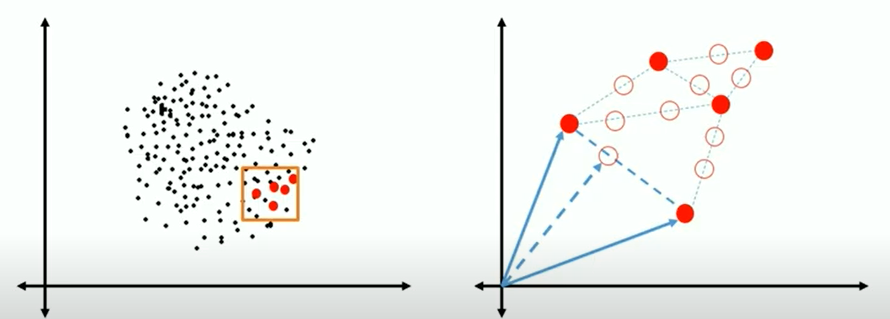

In [304]:
import collections
from collections import Counter
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 1289919)]
2579838


### ADASYN

In [305]:
# ADASYN
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))
print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 1290809)]
2580728


## Step 6: Modeling

<div class="alert alert-block alert-info">   

#### Inference:- 
    Here,instead of Accuracy we are very much interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.
   ####  `Recall` actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). 
    Recall shall be the model metric we use to select our best model `when there is a high cost associated with False Negative.`
    In fraud detection, if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be 
    very bad for the bank.

In [306]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, plot_roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

## Model 1: Decision Tree

### Default Hyperparameters for SMOTE data

In [307]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for SMOTE data
dt_smt_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [308]:
# Lets fit the decision tree with default hyperparameters
dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [309]:
y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [310]:
print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.6%
F1 score:  66.5%
Recall:  84.7%
Precision:  54.8%
ROC for the test dataset: 92.2%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.55      0.85      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.77      0.92      0.83    555719
weighted avg       1.00      1.00      1.00    555719



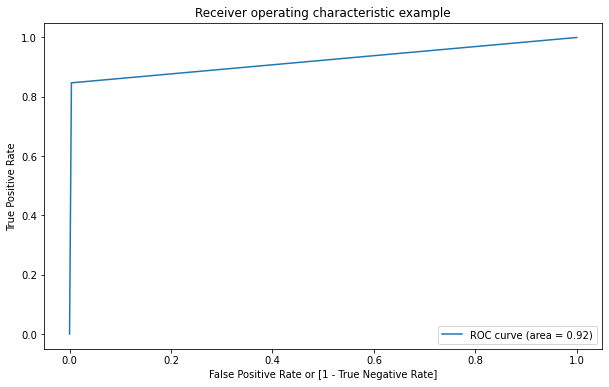


 Confussion Matrix:
 [[550802   2022]
 [   443   2452]]


In [311]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

<div class="alert alert-block alert-info">
    
As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- 
    Since we got a value of 0.91, our model seems to be doing execellent on the test dataset.

In [312]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true positive 
TP = confusion_dt_smt[1,1] # true negatives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%
Specificity:  99.6%
False postive rate: 0.4%
Positive predictive value: 54.8%
Negative predictive value: 99.9%


### Default Hyperparameters for ADASYN data

In [315]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for ADASYN Data
dt_ada_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [316]:
# Lets fit the Random Forest with default hyperparameters
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(random_state=42)

In [317]:
y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [318]:
print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



#### Making predictions on the test set

Accuracy:  99.6%
F1 score:  67.4%
Recall:  84.1%
Precision:  56.3%
ROC for the test dataset: 91.9%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



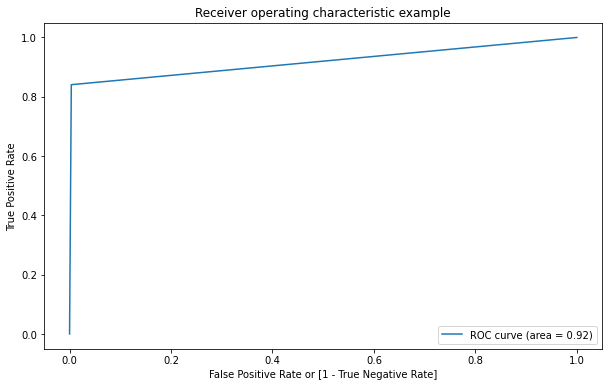


 Confussion Matrix:
 [[550932   1892]
 [   461   2434]]


In [319]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- 
    Since we got a value of 0.91, our model seems to be doing excellent on the test dataset.

In [320]:
confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true positive 
TP = confusion_dt_ada[1,1] # true negatives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.1%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 56.3%
Negative predictive value: 99.9%


### Conclusion:- From Decision Tree (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9

## Hyper-parameter tuning
### the `Decision Tree` for SMOTE data (as recall in SMOTE is 84.7 which is higher than ADASYN))
- where precision and F1, Roc values are also higher in SMOTE , so for hypertunning i have choosen SMOTE data fro further analysis

In [321]:
dt = DecisionTreeClassifier(random_state=42)

In [322]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
     }

In [323]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [ ]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [336]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      31.864365      0.254613         0.720990        0.090860   
1      31.803999      0.220862         0.802875        0.072354   
2      30.960992      0.066220         1.322186        0.077536   
3      30.996452      0.050606         1.169048        0.031258   
4      30.898734      0.015620         1.215777        0.027176   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                      5                       5   
1               5                      5                      10   
2               5                      5                      20   
3               5                     10                       5   
4               5                     10                      10   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.947259   
1  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.947259   
2  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.947259   
3  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.947259   
4  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.947259   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.948952           0.949349           0.951709         0.949317   
1           0.948952           0.949349           0.951709         0.949317   
2           0.948952           0.949349           0.951709         0.949317   
3           0.948952           0.949349           0.951709         0.949317   
4           0.948952           0.949349           0.951709         0.949317   

   std_test_score  rank_test_score  
0        0.001588               19  
1        0.001588               19  
2        0.001588               19  
3        0.001588               19  
4        0.001588               19

In [337]:
grid_search.best_score_

0.9949415433849597

<div class="alert alert-block alert-info">
    
     Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

     Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

     We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [338]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Decision Tree from Grid search best estimator as:-  max_depth=20, min_samples_leaf=5, min_samples_split=5, random_state=42.
  
    From these parameters helps us to determines (max_depth) helps us to limit the max number of levels in each decision tree to 20, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5   

- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Decision Tree.

In [339]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [340]:
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289919
           1       0.99      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.3%
F1 score:  56.5%
Recall:  88.8%
Precision:  41.4%
ROC for the test dataset: 95.5%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.41      0.89      0.56      2895

    accuracy                           0.99    555719
   macro avg       0.71      0.94      0.78    555719
weighted avg       1.00      0.99      0.99    555719



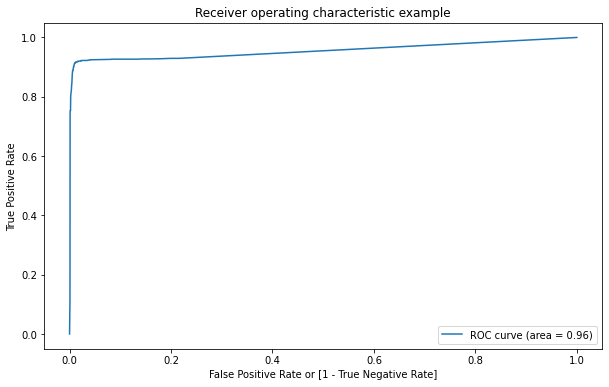


 Confussion Matrix:
 [[549181   3643]
 [   323   2572]]


In [341]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:- 
        Since we got a value of 0.96, our model seems to be doing execellent on the test dataset.

In [342]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true positive 
TP = confusion_dt_hp_smt[1,1] # true negatives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  88.8%
Specificity:  99.3%
False postive rate: 0.7%
Positive predictive value: 41.4%
Negative predictive value: 99.9%


In [343]:
dt_best.feature_importances_

array([1.12636573e-03, 2.11219167e-01, 1.65165053e-03, 1.84128851e-03,
       1.26779059e-03, 1.21797232e-03, 1.91327287e-03, 5.57677791e-03,
       1.19037945e-03, 4.12579631e-03, 1.01478745e-02, 6.63002170e-04,
       5.81409339e-03, 8.12325686e-04, 3.75678675e-03, 1.81086360e-02,
       2.35403249e-03, 6.47043841e-01, 3.40359194e-03, 1.10166409e-02,
       3.50301655e-03, 7.70879449e-03, 1.81641371e-03, 4.27150867e-03,
       2.19156985e-03, 7.34506422e-03, 9.92497041e-03, 1.72356039e-03,
       6.09754449e-03, 1.00112293e-02, 6.47410560e-03, 1.15928897e-03,
       2.44774535e-04, 1.11407573e-04, 4.42699265e-04, 8.60381381e-05,
       1.79141387e-04, 1.50700157e-04, 3.26882782e-04, 5.94288529e-05,
       1.31531012e-04, 7.80412848e-05, 1.96781561e-04, 7.60577081e-05,
       1.78913167e-04, 5.41632317e-04, 9.72837696e-05, 3.79382371e-05,
       1.04211098e-04, 4.78183967e-04])

In [344]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [345]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.647044
1                      amt  0.211219
15          hist_trans_24h  0.018109
19      catg_gas_transport  0.011017
10              trans_Hour  0.010148
29       catg_shopping_pos  0.010011
26           catg_misc_pos  0.009925
21        catg_grocery_pos  0.007709
25           catg_misc_net  0.007345
30             catg_travel  0.006474

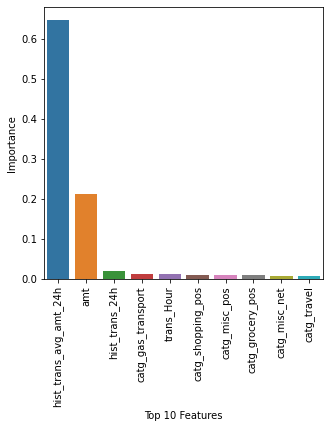

In [346]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
    Based on our Decision Tree (Hyperparameter Tuning) model, some features are identified which contribute most to a customer getting churned.<br>
    Top 10 features
    
        hist_trans_avg_amt_24h------0.647044
        amt-------------------------0.211219
        hist_trans_24h--------------0.018109 
        catg_gas_transport----------0.011017
        trans_Hour------------------0.010148
        catg_shopping_pos-----------0.010011
        catg_misc_pos---------------0.009925
        catg_grocery_pos------------0.007709
        catg_misc_net---------------0.007345
        catg_travel-----------------0.006474
  

###  Decision Tree (Hyperparameter Tuning using SMOTE data ) :- 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------


## Model 2: Random Forest

### Default Hyperparameters for SMOTE data

In [355]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for SMOTE Data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
rf_smt_default.oob_score_

In [ ]:
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

#### Making predictions on the test set

In [354]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

NameError: name 'y_test_pred_rf_smt' is not defined

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true positive 
TP = confusion_rf_smt[1,1] # true negatives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for ADASYN Data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
rf_ada_default.oob_score_

In [ ]:
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_ada = confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true positive 
TP = confusion_rf_ada[1,1] # true negatives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Conclusion:- From Random Forest (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9

## Hyper-parameter tuning 

### for the Random Forest for SMOTE data 

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [5,10],
    'min_samples_split': [5,10],
     }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [ ]:
%%time
Randomized_search.fit(X_resampled_smt, y_resampled_smt)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [351]:
score_rf = pd.DataFrame(Randomized_search.cv_results_)
score_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     604.212820      0.712105         3.340590        0.652281   
1     658.844112      2.242085        19.182674        0.526071   
2     360.185411     24.987758        13.191766        0.791942   
3     885.282774     44.710628        19.804315       16.969470   
4     212.060210     19.298514         8.776748        2.814059   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                  5                       5                      5   
1                 10                       5                      5   
2                  5                      10                      5   
3                 10                      10                      5   
4                  5                       5                     10   

  param_max_depth                                             params  \
0              10  {'n_estimators': 5, 'min_samples_split': 5, 'm...   
1              10  {'n_estimators': 10, 'min_samples_split': 5, '...   
2              10  {'n_estimators': 5, 'min_samples_split': 10, '...   
3              10  {'n_estimators': 10, 'min_samples_split': 10, ...   
4              10  {'n_estimators': 5, 'min_samples_split': 5, 'm...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.956097           0.958373           0.953206           0.949802   
1           0.956493           0.958183           0.954716           0.953938   
2           0.956097           0.958373           0.953206           0.949802   
3           0.956493           0.958183           0.954716           0.953938   
4           0.956934           0.949783           0.953609           0.956261   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.954369        0.003210               13            0.957341   
1         0.955833        0.001643               11            0.957414   
2         0.954369        0.003210               13            0.957341   
3         0.955833        0.001643               11            0.957414   
4         0.954147        0.002809               15            0.957918   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958701            0.953086            0.949128   
1            0.958441            0.954862            0.952936   
2            0.958701            0.953086            0.949128   
3            0.958441            0.954862            0.952936   
4            0.950361            0.953566            0.955657   

   mean_train_score  std_train_score  
0          0.954564         0.003761  
1          0.955913         0.002157  
2          0.954564         0.003761  
3          0.955913         0.002157  
4          0.954375         0.002782

In [352]:
Randomized_search.best_score_

0.9932724461486186

<div class="alert alert-block alert-info">
    
    Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

    Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

    We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [353]:
rf_best = Randomized_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10, n_jobs=-1, random_state=42)

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Random Forest from Grid search 
    best estimator as - max_depth=20, min_samples_leaf=5, min_samples_split=5,n_jobs=-1, random_state=42
    - By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Random
    Forest.

In [354]:
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [355]:
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289919
           1       1.00      0.99      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.6%
F1 score:  67.4%
Recall:  84.0%
Precision:  56.2%
ROC for the test dataset: 98.9%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



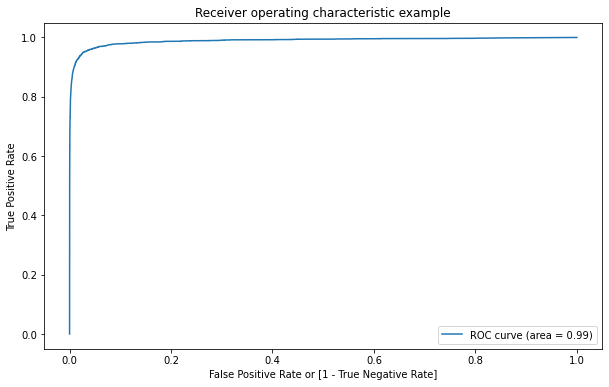


 Confussion Matrix:
 [[550929   1895]
 [   462   2433]]


In [356]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:- 
        Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [357]:
confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true positive 
TP = confusion_rf_hp_smt[1,1] # true negatives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.0%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 56.2%
Negative predictive value: 99.9%


In [358]:
rf_best.feature_importances_

array([2.28766059e-03, 2.60825642e-01, 3.86600743e-03, 4.41336770e-03,
       3.00575059e-03, 3.82797664e-03, 4.24551869e-03, 6.93386078e-03,
       3.20941026e-03, 5.00495114e-03, 4.87094578e-02, 1.81036154e-03,
       1.50844349e-02, 2.09011856e-03, 3.32079093e-02, 4.59137333e-02,
       7.02592981e-02, 3.53497925e-01, 3.42088733e-03, 3.36576701e-03,
       2.03966329e-03, 6.55558591e-03, 2.31991784e-03, 1.50464910e-02,
       5.81718134e-03, 2.36865124e-03, 7.05242223e-03, 3.80068927e-03,
       3.98592492e-03, 5.07082558e-03, 2.89712161e-03, 2.26816705e-03,
       1.72774082e-02, 4.69809425e-03, 1.25444923e-02, 2.31782374e-03,
       6.62281220e-03, 2.42286681e-03, 2.63414878e-04, 2.39299769e-04,
       4.78226448e-04, 3.02628866e-04, 7.15315037e-04, 1.78749786e-03,
       5.51448534e-04, 3.33085147e-04, 3.15890277e-04, 5.96598735e-04,
       6.43740736e-03, 7.89300994e-03])

In [359]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [360]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17       hist_trans_avg_amt_24h  0.353498
1                           amt  0.260826
16       hist_trans_avg_amt_30d  0.070259
10                   trans_Hour  0.048709
15               hist_trans_24h  0.045914
14               hist_trans_30d  0.033208
32               weekday_Monday  0.017277
12  time_since_prev_transaction  0.015084
23                    catg_home  0.015046
34               weekday_Sunday  0.012544

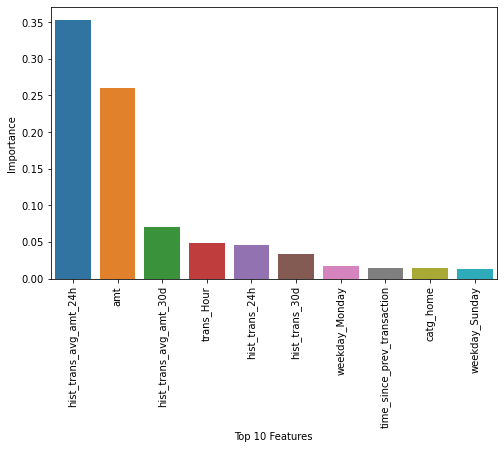

In [361]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Conclusion

<div class="alert alert-block alert-info">
    
Based on our Random Forest (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.353498
    amt-----------------------------0.260826
    hist_trans_avg_amt_30d----------0.070259
    trans_Hour----------------------0.048709
    hist_trans_24h------------------0.045914
    hist_trans_30d------------------0.033208
    weekday_Monday------------------0.017277
    time_since_prev_transaction-----0.015084
    catg_home-----------------------0.015046
    weekday_Sunday------------------0.012544
   

###  Random Forest (Hyperparameters Tuning) :- 


<div class="alert alert-block alert-success">
    

###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
          

## Model 3.   Xgboost 

### Default Hyperparameters for SMOTE data

In [362]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [363]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data 
model_xgb.fit(X_resampled_smt, y_resampled_smt)

[01:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [364]:
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [365]:
print(classification_report(y_resampled_smt, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.9%
F1 score:  87.4%
Recall:  89.6%
Precision:  85.2%
ROC for the test dataset: 99.8%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.93      0.95      0.94    555719
weighted avg       1.00      1.00      1.00    555719



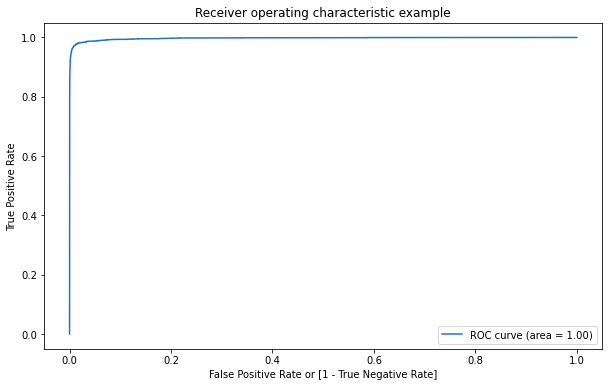


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]


In [366]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:-
    Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [367]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive 
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.6%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 85.2%
Negative predictive value: 99.9%


### Default Hyperparameters for ADASYN data

In [368]:
# Fitting the model on Train ADASYN data 
model_xgb.fit(X_resampled_ada, y_resampled_ada)

[02:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [369]:
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [370]:
print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



#### Making predictions on the test set

Accuracy:  99.9%
F1 score:  86.7%
Recall:  89.1%
Precision:  84.4%
ROC for the test dataset: 99.7%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.84      0.89      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.92      0.94      0.93    555719
weighted avg       1.00      1.00      1.00    555719



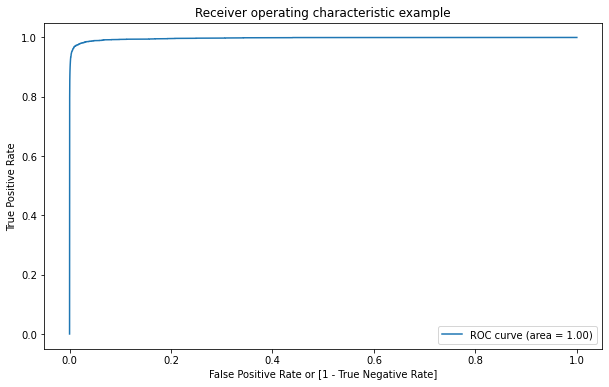


 Confussion Matrix:
 [[552347    477]
 [   317   2578]]


In [371]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [372]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()

In [373]:
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)

tn 552347
fp 477
fn 317
tp 2578


<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [374]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive 
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.1%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 84.4%
Negative predictive value: 99.9%


The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

## Hyper-parameter tuning 

### Of the  `xgboost` for SMOTE data(as SMOTE deafult XBGoost ig giving better results than ADASYN XGBoost)

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [375]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[2, 5, 10],
             'n_estimators':[50,100]}          


# specify model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [376]:
# fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)   

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 672.7min finished


[13:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [377]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       95.004134      9.487889         1.833206        0.044796   
1       94.583812      0.155325         1.994652        0.111452   
2       94.603645      0.500697         1.931860        0.180137   
3      175.294220      7.307891         2.150898        0.162025   
4      182.989614      0.430856         1.885291        0.014730   
5      182.963016      0.600514         2.010271        0.161519   
6      196.916231      1.449960         2.255054        0.240130   
7      214.073862      0.472748         2.072781        0.032102   
8      215.345108      2.555252         2.244635        0.145075   
9      386.747944      1.592621         2.452956        0.045994   
10     421.937544      1.163390         2.551907        0.130305   
11     423.063385      2.099311         2.532622        0.090668   
12     420.793500     10.685535         2.518771        0.048882   
13     473.685083      0.902046         2.624011        0.041651   
14     478.811008      2.778065         2.596443        0.005983   
15     843.010983      4.700253         3.535565        0.139816   
16     920.614932      2.263856         3.590608        0.203850   
17     932.154025      3.777102         3.816955        0.166100   
18      92.277883      0.879730         1.899372        0.141879   
19      98.645586      0.996281         1.833841        0.033690   
20      98.166316      0.357488         1.837244        0.037716   
21     178.417026      1.214836         2.120943        0.101841   
22     191.079694      0.100217         2.119502        0.093060   
23     192.235395      0.421231         2.103429        0.219197   
24     211.234497      6.812236         2.201710        0.100646   
25     214.041966      0.899536         2.250291        0.176447   
26     213.967207      0.538869         2.156614        0.144486   
27     389.448558      1.898664         2.433065        0.038156   
28     421.103481      1.341694         2.416962        0.028809   
29     423.355561      0.491706         2.499828        0.096315   
30     401.250689      4.552320         2.583579        0.162197   
31     435.590726      1.357981         2.619517        0.225322   
32     441.387951      7.003610         2.463373        0.026555   
33     765.644273     13.164035         3.234150        0.066285   
34     837.785815     11.645049         3.307064        0.103111   
35     834.946198      9.256570         3.380653        0.116371   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                  0.2               2                 50             0.3   
1                  0.2               2                 50             0.6   
2                  0.2               2                 50             0.9   
3                  0.2               2                100             0.3   
4                  0.2               2                100             0.6   
5                  0.2               2                100             0.9   
6                  0.2               5                 50             0.3   
7                  0.2               5                 50             0.6   
8                  0.2               5                 50             0.9   
9                  0.2               5                100             0.3   
10                 0.2               5                100             0.6   
11                 0.2               5                100             0.9   
12                 0.2              10                 50             0.3   
13                 0.2              10                 50             0.6   
14                 0.2              10                 50             0.9   
15                 0.2              10                100             0.3   
16                 0.2              10                100             0.6   
17                 0.2              10                100             0.9   
18                 0.6  

In [385]:
cv_results[cv_results['rank_test_score']==1]


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17     932.154025      3.777102         3.816955          0.1661   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
17                 0.2              10                100             0.9   

                                               params  split0_test_score  \
17  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998535   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
17           0.999991           0.999991         0.999505        0.000686   

    rank_test_score  split0_train_score  split1_train_score  \
17                1                 1.0            0.999974   

    split2_train_score  mean_train_score  std_train_score  
17            0.999976          0.999983         0.000012

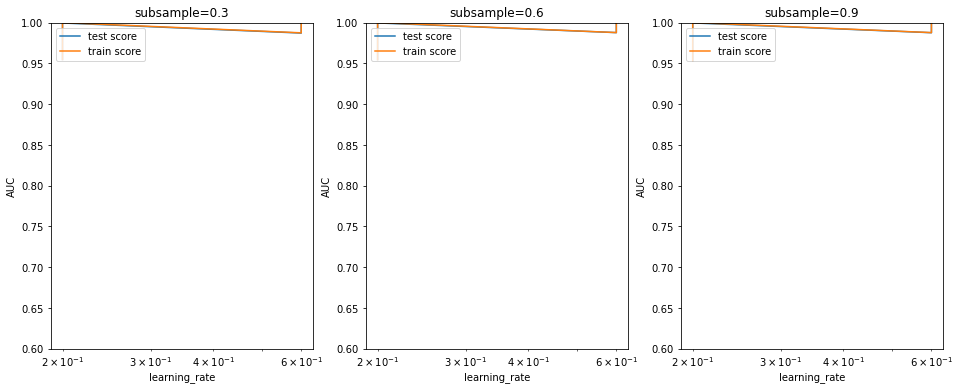

In [386]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [387]:
model_cv.best_score_

0.9995053953000149

In [388]:
# xgboost_best = grid_search.best_estimator_
# xgboost_best

In [389]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_xgb_new = XGBClassifier(params = params)
model_xgb_new.fit(X_resampled_smt, y_resampled_smt)

[14:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [391]:
y_train_pred_xgb_hp = model_xgb_new.predict(X_resampled_smt)
y_test_pred_xgb_hp = model_xgb_new.predict(X_test)

In [392]:
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.9%
F1 score:  87.4%
Recall:  89.6%
Precision:  85.2%
ROC for the test dataset: 99.8%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.93      0.95      0.94    555719
weighted avg       1.00      1.00      1.00    555719



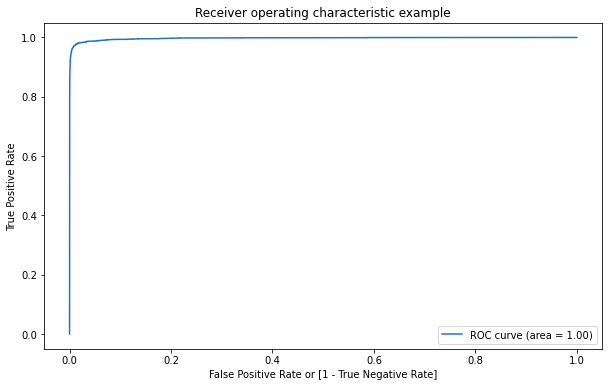


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]


In [394]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = model_xgb_new.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [395]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive 
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.6%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 85.2%
Negative predictive value: 99.9%


Finally, let's also look at the feature importances.

In [399]:
model_xgb_new.feature_importances_

array([0.00103722, 0.04841204, 0.00084232, 0.00198108, 0.00160764,
       0.00142225, 0.00197384, 0.00196374, 0.00134041, 0.00164755,
       0.01024197, 0.00096415, 0.00675447, 0.00047003, 0.00299379,
       0.02114916, 0.00121787, 0.19865513, 0.024674  , 0.03269474,
       0.02258752, 0.03562544, 0.03277486, 0.04282039, 0.02787061,
       0.03186064, 0.02987565, 0.02375105, 0.02721718, 0.04172197,
       0.02700479, 0.00524006, 0.04090082, 0.04695648, 0.0293919 ,
       0.05075207, 0.03201314, 0.01154007, 0.00223543, 0.00278716,
       0.00438864, 0.00700594, 0.00836739, 0.0082677 , 0.00600553,
       0.00242752, 0.00401747, 0.00462418, 0.01873259, 0.00919242],
      dtype=float32)

In [400]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": model_xgb_new.feature_importances_
})

In [412]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.198655
35        weekday_Thursday  0.050752
1                      amt  0.048412
33        weekday_Saturday  0.046956
23               catg_home  0.042820
29       catg_shopping_pos  0.041722
32          weekday_Monday  0.040901
21        catg_grocery_pos  0.035625
22     catg_health_fitness  0.032775
19      catg_gas_transport  0.032695

### Hyper-parameter tuning of xgboost for ADASYN data

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
           SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
          

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

# Conclusion of the Modeling 

<div class="alert alert-block alert-info">

### Compilation of models For Test data (Target 1)

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9
    
###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   2. Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9


###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------       
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   3. Clasification Report for XGBoost on Test data on default Hyperparameter

                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
                   (pp  value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive V 
     -------------------------|-------------|------------|------------|----------|--------------|--------------|--------  
        SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|---------------
        ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
           precision(%)      |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |-ve (%)
         +ve predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive               -------------------------|-------------|------------|------------|----------|--------------|--------------|------------ 
      SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
          -------------------|-------------|------------|------------|----------|--------------|--------------|-------
          

<div class="alert alert-block alert-success">
    
### From the above Compilation of models, it is clear that XGBoost (default hyperparameter tuning using SMOTE data and Tuned using SMOTE data both )is the best model from 3 models i.e
    
     Model 1: Decision Tree  (Default Hyperparameters)
             Decision Tree  (Hyperparameter Tuning)
     Model 2: Random Forest (Default Hyperparameters)
             Random Forest (Hyperparameters Tuning)
     Model 3: XGBoost (Default Hyperparameters)
             XGBoost (Hyperparameters Tuning)


    
### Model Consideration:-
    
- Based on the accuracy, ROC and recall of different models, we will XGBoost on default hyperparameter tuning using ADASYN data as our final model.
- The test accuracy is 99.8%, recall is 90% and ROC is 99.7% .
- The recall for is_fraud is 90%, which is highest among all other models. <b>Since our buisness objective is more important to fraud transactions than the no_fraud transactions accurately. High recall means model will correctly identify almost all customers who are likely to churn.</b>
- Hence `XGBoost on default hyperparameter on ADASYN data ` model is chosen based on its performance on `Recall metric`. 

# Step 7: Final Conclusion on basis of Best Model (XGBoost)

In [415]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.198655
35        weekday_Thursday  0.050752
1                      amt  0.048412
33        weekday_Saturday  0.046956
23               catg_home  0.042820
29       catg_shopping_pos  0.041722
32          weekday_Monday  0.040901
21        catg_grocery_pos  0.035625
22     catg_health_fitness  0.032775
19      catg_gas_transport  0.032695

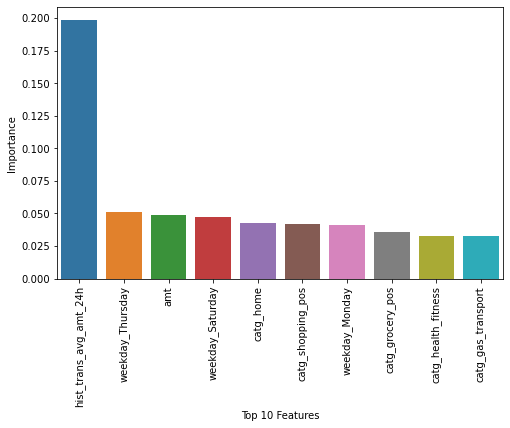

In [416]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Inference

#### FINALIZED MODEL: STATS of XGBoost Hyper-parameter tunnig using SMOTE data 

| Metrics     | test    |
| ----------- | ------  |
|RECALL       |  89.6   |
|PRECISION    |  85.2   |
|ACCURACY     |  80.81  |
|F1- SCORE    |  81.7   |
|SPECIFICITY  |  79.26  |

<div class="alert alert-block alert-info">
    
Based on our XGBoost (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.198655
    weekday_Thursday----------------0.050752
    amt-----------------------------0.048412
    weekday_Saturday----------------0.046956
    catg_home-----------------------0.042820
    catg_shopping_pos---------------0.041722
    weekday_Monday------------------0.040901
    catg_grocery_pos----------------0.035625
    catg_health_fitness-------------0.032775
    catg_gas_transport--------------0.032695

## XGBoost hyper-parameter tunning using SMOTE data on train data set 

In [238]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20, 
          'n_estimators':50,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_train, y_train)

[21:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [239]:
pred_train = xgboost_best.predict(X_train)

In [240]:


print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


 Confussion Matrix:
 [[1289908      11]
 [     90    6666]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      0.99      0.99      6756

    accuracy                           1.00   1296675
   macro avg       1.00      0.99      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



## Cost Benefit Anlayis based on model (PART 2)

### `XGBoost on default hyperparameter on SMOTE data  on test data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[552373    451]
     [   300   2595]]
 

In [403]:
print ('\n Confussion Matrix :\n',confusion_matrix(y_test, y_test_pred_xgb_hp))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]
True Negative: 552373
False Positive: 451
False Negative: 300
True Positive: 2595


### `XGBoost on default hyperparameter on SMOTE data  on train data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[1289908      11]
     [     90    6666]]
 

In [231]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives 
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

True_Negatives for train data: 1289908
True_Positives for train data: 6666
False_Positives for train data: 11
False_Negatives for train data: 90


In [232]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2595+451+6666+11)/24

405.125

In [233]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

405.125*1.5

607.6875

In [243]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(90+300)/24

16.25

In [244]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

16.25*530.661412288881

8623.247949694316

In [248]:
# Cost incurred per month after the model is built and deployed (4+6) 

607.69+8623.247949694316

9230.937949694317

In [249]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213392.2204-9230.94

204161.2804

In [250]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.661412288881

213392.22041666627

<div class="alert alert-block alert-success">
    
###                           Cost Benefit Analysis(Part 2)
                          Questions                                                                          Answer
    1. Cost incurred per month before the model was deployed (2*3 of part1)----------------------------------213392.2204
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------405.125
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------1.5
    4. Total cost of providing customer support per month for fraudulent transactions 
        detected by the model(TF*$1.5) ----------------------------------------------------------------------607.6875  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------16.25
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*3rd of part 1)----------8623.25
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------9230.94
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------204161.28


## Step 8: Conclusion , Business Insights and Recommendation of strategies to manage fraud transaction based on our observations.


<div class="alert alert-block alert-info">
    

### Conclusion :   
    
           Before Cost incurred/month by the bank== $ 213392.2204
             
           Now Cost incurred/month by bank after my modelling ==$ 9230.94 only
             
### Actual Saving done by bank after my modelling == $ 204161.28 and hence 95.67% of darastic decrease in amount paid by the bank to the customer for their loss by fraud transactions after modelling rather than earlier (before modelling). 

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Business Insights and Recommendation of strategies:

1. With an increase in "hist trans avg amt 24h" values, a transaction's likelihood of being a fraudulent transaction rises. We determined "hist trans avg amt 24h"—the average amount credit card holders spent on transactions over the previous 24 hours—based on their spending habits. Therefore, it is appropriate for the bank to send an SMSALERT! to the consumer confirming the transaction if the amount spent in the last 24 hours is comparable to the amount spent in the past.
    
2. As the value of a transaction on Thursday, Saturday, and Monday during the workweek rises, the likelihood of a fraudulent transaction also rises. According to the pattern model, the busiest days for fraud are Thursday, Saturday, and Monday. Therefore, banks must exercise extreme caution and alertness during these days to prevent fraudulent transactions in these categories. 

3. With an increase in "amt" values, the likelihood that a client may engage in fraudulent transactions rises. In the event that a bank ever finds that a transaction's nature or size exceeds typical spending patterns, it should act promptly by providing the necessary alerts to clients.
   
4. The likelihood that a client may engage in fraudulent transactions rises as the values for the categories "home," "shopping," "grocery," "health and fitness," and "gas transportation" rise. As these are the platforms where any customer would spend a high transactional amount, fraudsters also follow the same trend, the model anticipated that major fraud transactions would occur in the categories. It is always advised that the bank monitor the history of spend amount through FLASH SMS ALERT while providing the relevant credit card holders with a thorough transaction history.

5. The majority of fraud transactions occur between the hours of 22 and 3 Hr , thus banks must be sure to send an SMSALERT during these unusual hours.
